In [14]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle, math, time, platform
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# import mrcnn.utils     as utils
# import mrcnn.visualize as visualize

pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
import mrcnn.calculate_map as cmap
import mrcnn.calculate_map_dev as cmap2

eval_method = '2'
syst = platform.system()

## BCE3 is the method where appropriate nexgative examples are added to each positive example during the training 
## Process 
if syst == 'Windows':
    MAP_PATH = "E:/git_projs/MRCNN3/train_newshapes/eval_method"+eval_method+"_results_BCE2"
elif syst == 'Linux':
    MAP_PATH = "/home/kbardool/mrcnn3/train_newshapes/BCE_eval_method"+eval_method+"_results"
    DIR_WEIGHTS = '/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20181224T0000' 
    
else :
    raise Error('unrecognized system ')

print(' OS ' , syst, ' : ', MAP_PATH)

# files = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5', 'fcn_0450.h5', 
#          'fcn_0521.h5', 'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5', 
#          'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5', 'fcn_1848.h5', 
#          'fcn_2017.h5', 'fcn_2084.h5']   #idx 13,14,15,16,17

# files       = ['fcn_0500.h5']

fcn_files  = ['fcn_0001.h5', 'fcn_0003.h5', 'fcn_0005.h5', 'fcn_0009.h5', 
          'fcn_0012.h5', 'fcn_0020.h5', 'fcn_0023.h5', 'fcn_0027.h5', 
          'fcn_0033.h5', 'fcn_0047.h5', 'fcn_0070.h5', 'fcn_0080.h5', 
          'fcn_0101.h5', 'fcn_0106.h5', 'fcn_0112.h5', 'fcn_0124.h5', 
          'fcn_0138.h5', 'fcn_0144.h5', 'fcn_0161.h5', 'fcn_0171.h5', 'fcn_0181.h5']


COLORS = [
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
    '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
    '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
    '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']    



class_names = ['ALL CLASSES', 'person', 'car', 'sun','building', 'tree', 'cloud']
class_ids = [1,2,3,4,5,6] 

print(MAP_PATH)
FILE_IDX = 1
epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
print(files[FILE_IDX], '    ', epochs)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
 OS  Linux  :  /home/kbardool/mrcnn3/train_newshapes/BCE_eval_method2_results
/home/kbardool/mrcnn3/train_newshapes/BCE_eval_method2_results
fcn_0003.h5      0003


## Load and display AP_results_2019_mm_dd (calculated over individual images)

In [10]:
new_AP_results_file = 'eval'+eval_method+'_AP_results_2019_02_19'
print('Path:' ,MAP_PATH, '    Filename: ', new_AP_results_file)
try:
    del APRes 
except:
    pass

with open(os.path.join(MAP_PATH, new_AP_results_file+'.pkl'), 'rb') as outfile:
    APRes = pickle.load(outfile)

for i in sorted(APRes):
    print(i, APRes[i]['Epochs'])

Path: /home/kbardool/mrcnn3/train_newshapes/BCE_eval_method2_results     Filename:  eval2_AP_results_2019_02_19
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0001.h5 0001
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0003.h5 0003
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0005.h5 0005
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5 0009
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0012.h5 0012
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0020.h5 0020
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0023.h5 0023
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0027.h5 0027
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0033.h5 0033
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0047.h5 0047
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn201902

#### Display AP_Results

In [11]:
for key in sorted(APRes) :
    print('\n\nAfter {} training epochs.\nWeight file: {}'.format( APRes[key]['Epochs'],APRes[key]['Filename']))
    print("\n{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
    print('-'*116)
    for LIMIT in [10,50,100,250,500]:
        print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, APRes[key]['Epochs'],
                np.mean(APRes[key]['MRCNN_AP_Orig'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_0'][:LIMIT]),
                np.mean(APRes[key]['FCN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_1'][:LIMIT]),
                np.mean(APRes[key]['FCN_AP_1'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_2'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_2'][:LIMIT]) ))



After 0001 training epochs.
Weight file: /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0001.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
10        0001          0.70275       0.66452       0.64285       0.62535       0.58633       0.62535       0.57965
50        0001          0.65334       0.65023       0.65188       0.63767       0.63673       0.63373       0.63736
100       0001          0.65577       0.63450       0.64363       0.64085       0.62938       0.63858       0.62422
250       0001          0.65056       0.64155       0.64429       0.64143       0.63150       0.64111       0.62934
500       0001          0.64761       0.64290       0.64505       0.64515       0.64779       0.64336       0.64858


After 0003 training epochs.
Weight file: /home/kbardool/models_

## Build Mean Average Precision Data Structure 
Using loaded gt_boxes and pr_boxes.
    ALL_DATA is a dictionary keyed by class_id to dictionaries, one for each possible score. Each SCORE dictionary is itrself a dictionary with keys for iOUs 
    between 0.5 and 0.95. Each dictionary entry has the following keys:
    {'iou', 'model_thrs', 'recalls', 'precisions', 'avg_prec'}
    iou :         indicates the iOU threshold of the dictionary entry
    model_thrs:   score thresholds
    recalls   :   recall at threshold
    precision :   precision at threshold


- Create `gt_boxes_class`, `pr_boxes_class` (separated by class)  - 

### Build and Save `map_info_epochxxxx` file from  `gt_boxes`, `pr_boxes`, and `cls_info` data structures 

In [3]:
for idx in [9, 16]:
    
    epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
    cls_info_file = 'eval'+eval_method+'_cls_info_epoch' +epochs+'_500.pkl'
    pr_boxes_file = 'eval'+eval_method+'_pr_bboxes_epoch'+epochs+'_500.pkl'
    gt_boxes_file = 'eval'+eval_method+'_gt_bboxes_epoch'+epochs+'_500.pkl'

    with open(os.path.join(MAP_PATH, cls_info_file), 'rb') as infile:
        cls_info = pickle.load(infile)            
    with open(os.path.join(MAP_PATH, pr_boxes_file), 'rb') as infile:
        pr_boxes = pickle.load(infile)
    with open(os.path.join(MAP_PATH, gt_boxes_file), 'rb') as infile:
        gt_boxes = pickle.load(infile)
    
    print('loaded :', cls_info_file, '   ', pr_boxes_file, '    ', gt_boxes_file)    
    
    ## build gt_boxes_class, pr_boxes_class which only containing info for each class
    class_ids = [1,2,3,4,5,6]    
    scores    = [ 'mrcnn_score_orig', 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
    iou_thresholds = np.arange(0.20, 0.95, 0.05)
    
    all_data = gt_boxes_class = pr_boxes_class = {}
    gt_boxes_class, pr_boxes_class  = cmap.filter_by_class(gt_boxes, pr_boxes, class_ids= class_ids)

    all_data    = cmap.build_mAP_data_structure_by_class(gt_boxes_class, pr_boxes_class, class_ids, scores, iou_thresholds)
    all_data[0] = cmap.build_mAP_data_structure_combined(gt_boxes, pr_boxes, scores, iou_thresholds)

    print(all_data.keys())

    ### Save mAP data to file `map_info_epochxxxx.pkl` for future reuse

    map_info_file = 'eval'+eval_method+'_map_info_epoch'+epochs+'.pkl'
    with open(os.path.join(MAP_PATH, map_info_file), 'wb') as outfile:
        pickle.dump(all_data, outfile)            
    print(' Datafile :', map_info_file , ' saved')

loaded : eval2_cls_info_epoch0940_500.pkl     eval2_pr_bboxes_epoch0940_500.pkl      eval2_gt_bboxes_epoch0940_500.pkl
 # pr keys : 500 # gt_keys:  500
 Processing class :  1
 Processing class :  2
 Processing class :  3
 Processing class :  4
 Processing class :  5
 Processing class :  6
Build mAP information for classes:  [1, 2, 3, 4, 5, 6]  and scores  ['mrcnn_score_orig', 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
class_id:   1  
class_id:   2  
class_id:   3  
class_id:   4  
class_id:   5  
class_id:   6  
Build mAP (all classes combined)  
 For scores:  ['mrcnn_score_orig', 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
 score_key: mrcnn_score_orig        iou_thr: 0.20  (idx  0)  
 score_key: mrcnn_score_orig        iou_thr: 0.25  (idx  1)  
 score_key: mrcnn_score_orig        iou_thr: 0.30  (idx  2)  
 score_key: mrcnn_score_orig        i

dict_keys([0, 1, 2, 3, 4, 5, 6])
 Datafile : eval2_map_info_epoch0940.pkl  saved
loaded : eval2_cls_info_epoch2084_500.pkl     eval2_pr_bboxes_epoch2084_500.pkl      eval2_gt_bboxes_epoch2084_500.pkl
 # pr keys : 500 # gt_keys:  500
 Processing class :  1
 Processing class :  2
 Processing class :  3
 Processing class :  4
 Processing class :  5
 Processing class :  6
Build mAP information for classes:  [1, 2, 3, 4, 5, 6]  and scores  ['mrcnn_score_orig', 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
class_id:   1  
class_id:   2  
class_id:   3  
class_id:   4  
class_id:   5  
class_id:   6  
Build mAP (all classes combined)  
 For scores:  ['mrcnn_score_orig', 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
 score_key: mrcnn_score_orig        iou_thr: 0.20  (idx  0)  
 score_key: mrcnn_score_orig        iou_thr: 0.25  (idx  1)  
 score_key: mrcnn_

 score_key: fcn_score_2             iou_thr: 0.90  (idx 14)  
dict_keys([0, 1, 2, 3, 4, 5, 6])
 Datafile : eval2_map_info_epoch2084.pkl  saved


## Load previously build `map_info_epochxxxx`  file

In [15]:
FILE_IDX= 6
epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')

map_info_file = 'eval'+eval_method+'_map_info_epoch'+epochs+'.pkl'
cls_info_file = 'eval'+eval_method+'_cls_info_epoch'+epochs+'_500.pkl'
# map_info_file = 'test_map_info_epoch' +epochs+'_FIXED.pkl'
# cls_info_file = 'test_cls_info_epoch' +epochs+'_500.pkl'
# pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_500.pkl'
# gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_500.pkl'

with open(os.path.join(MAP_PATH, map_info_file), 'rb') as infile:
    all_data = pickle.load(infile)            

with open(os.path.join(MAP_PATH, cls_info_file), 'rb') as infile:
        cls_info = pickle.load(infile)                
print('loaded :', map_info_file, '    ', cls_info_file)    

loaded : eval2_map_info_epoch0023.pkl      eval2_cls_info_epoch0023_500.pkl


## Data Structure displays

In [ ]:
# class_ids = [10, 11, 12, 13, 14, 15, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 69, 70, 71, 72, 73]
# class_ids = [1,2,3,4,5,6]
# ## build gt_boxes_class, pr_boxes_class which only containing info for each class 

# key = 'newshapes_00321' 
# cls = 3
# print(gt_boxes_class[cls][key]['class_ids'])
# print(gt_boxes_class[cls][key]['boxes'])
# print(' ==== P')
# print(pr_boxes_class[cls][key]['class_ids'])
# print(pr_boxes_class[cls][key]['boxes'])

### display `gt_boxes` and `pr_boxes`

In [11]:
pr_keys = list(pr_boxes.keys())
gt_keys = list(gt_boxes.keys())
# cls_keys= cls_info
# print(gt_boxes.keys())
print(len(gt_boxes.keys()), len(pr_boxes.keys()), len(cls_info))
print(len(gt_keys), gt_keys[:10])
print(len(pr_keys), pr_keys[:10])
print('keys for GT')
print(gt_boxes[gt_keys[0]].keys())
print('keys for PR')
print(pr_boxes[pr_keys[0]].keys())
print('keys for CLS_INFO')
# print(cls_info.keys())
# pp.pprint(cls_info)
print()
print(' pr key: ',pr_keys[0])
print(pr_boxes[pr_keys[0]]['boxes'])
print(pr_boxes[pr_keys[0]]['scores'])
print(pr_boxes[pr_keys[0]]['class_ids'])
print(pr_boxes[pr_keys[0]]['det_ind'])
print()
print(' gt key: ',gt_keys[0])
print(gt_boxes[gt_keys[0]]['boxes'])
print(gt_boxes[gt_keys[0]]['class_ids'])


500 500 7
500 ['newshapes_00204', 'newshapes_00328', 'newshapes_00364', 'newshapes_00291', 'newshapes_00238', 'newshapes_00293', 'newshapes_00445', 'newshapes_00010', 'newshapes_00151', 'newshapes_00046']
500 ['newshapes_00204', 'newshapes_00328', 'newshapes_00364', 'newshapes_00291', 'newshapes_00238', 'newshapes_00293', 'newshapes_00445', 'newshapes_00010', 'newshapes_00151', 'newshapes_00046']
keys for GT
dict_keys(['boxes', 'class_ids'])
keys for PR
dict_keys(['mrcnn_score_2', 'boxes', 'mrcnn_score_norm', 'det_ind', 'mrcnn_score_0', 'mrcnn_score_orig', 'fcn_score_1', 'class_ids', 'fcn_score_2', 'scores', 'fcn_score_0', 'mrcnn_score_1'])
keys for CLS_INFO

 pr key:  newshapes_00204
[[86.0, 17.0, 109.0, 88.0], [19.0, 40.0, 42.0, 111.0], [99.0, 69.0, 110.0, 99.0], [18.0, 29.0, 29.0, 59.0], [94.0, 92.0, 111.0, 128.0], [17.0, 0.0, 34.0, 36.0], [40.0, 88.0, 83.0, 119.0], [45.0, 9.0, 88.0, 40.0], [18.0, 73.0, 41.0, 128.0], [87.0, 0.0, 110.0, 55.0], [48.0, 28.0, 71.0, 33.0], [57.0, 95.0, 8

In [169]:
# for key in sorted(pr_keys[:1000]):  ##  'newshapes_00115'
#     print(key, '  ' ,  pr_boxes[key]['mrcnn_score_1'] == pr_boxes[key]['mrcnn_score_2'] , ' - ',pr_boxes[key]['mrcnn_score_1'],pr_boxes[key]['mrcnn_score_2'])
#     print(key, '  ' , pr_boxes[key]['mrcnn_score_1'] == pr_boxes[key]['mrcnn_score_2'] )

In [33]:
# # class_data = all_data[1]
# # score_key = 'scores'
# # for idx, iou_key in enumerate(sorted(class_data[score_key])):
# #     print(idx, iou_key)
# bb = [0.7777, 0.7569, 0.6442, 0.4946, 0.3545, 0.1565, 0.0654, 0.0264, 0.005]
# avg_precs = [" {:10.4f}".format(ap) for ap in bb]
# # avg_precs = [str(ap) for ap in bb]
# b1 = ""
# print(b1.join(avg_precs))

In [17]:
print(gt_boxes['newshapes_00469'])
print(gt_boxes_class[1]['newshapes_00469'])
print()
pp.pprint(pr_boxes['newshapes_00469'])
pp.pprint(pr_boxes_class[1]['newshapes_00469'])

{'boxes': [[11, 14, 28, 31], [18, 43, 24, 78], [23, 28, 38, 99], [36, 76, 51, 90], [46, 40, 91, 73], [66, 70, 94, 96], [66, 101, 91, 106], [68, 59, 93, 64], [80, 3, 101, 52], [83, 83, 119, 117], [92, 25, 116, 84]], 'class_ids': [3, 6, 6, 5, 4, 5, 1, 1, 2, 5, 2]}
{'boxes': [[66, 101, 91, 106], [68, 59, 93, 64]], 'class_ids': [1, 1]}

{ 'boxes': [ [90.0, 29.0, 105.0, 100.0],
             [37.0, 55.0, 82.0, 88.0],
             [80.0, 3.0, 101.0, 52.0],
             [92.0, 25.0, 116.0, 84.0],
             [12.0, 44.0, 36.0, 103.0],
             [46.0, 40.0, 91.0, 73.0],
             [18.0, 43.0, 24.0, 78.0],
             [83.0, 83.0, 119.0, 117.0],
             [104.0, 50.0, 110.0, 85.0],
             [9.0, 11.0, 45.0, 45.0],
             [23.0, 28.0, 38.0, 99.0],
             [77.0, 38.0, 92.0, 52.0],
             [66.0, 101.0, 91.0, 106.0],
             [11.0, 14.0, 28.0, 31.0],
             [100.0, 97.0, 117.0, 114.0],
             [27.0, 76.0, 48.0, 125.0],
             [66.0, 70.0, 94

#### display `cls_info` 

In [4]:
print(cls_info[1]['scores'][:20])
print(cls_info[1]['mrcnn_score_orig'][:20])
print(cls_info[1]['mrcnn_score_norm'][:20])
print()
print(cls_info[1]['mrcnn_score_0'][:20])
print(cls_info[1]['mrcnn_score_1'][:20])
print(cls_info[1]['mrcnn_score_2'][:20])
 

[0.9361, 0.9361, 0.9359, 0.9359, 0.9362, 0.9362, 0.936, 0.936, 0.9358, 0.9358, 0.9362, 0.9362, 0.9362, 0.9362, 0.9361, 0.9361, 0.936, 0.936, 0.9362, 0.9362]
[0.9361, 0.9361, 0.9359, 0.9359, 0.9362, 0.9362, 0.936, 0.936, 0.9358, 0.9358, 0.9362, 0.9362, 0.9362, 0.9362, 0.9361, 0.9361, 0.936, 0.936, 0.9362, 0.9362]
[1.0, 1.0, 0.9998, 0.9998, 1.0, 1.0, 0.9998, 0.9998, 0.9996, 0.9996, 1.0, 1.0, 1.0, 1.0, 0.9999, 0.9999, 0.9998, 0.9998, 1.0, 1.0]

[0.9297, 0.9297, 0.9323, 0.9323, 0.8707, 0.8707, 0.8737, 0.8737, 0.932, 0.932, 0.9324, 0.9324, 0.8729, 0.8729, 0.8714, 0.8714, 0.9323, 0.9323, 0.9325, 0.9325]
[0.6749, 0.6749, 0.6616, 0.6616, 0.6159, 0.6159, 0.62, 0.62, 0.6765, 0.6765, 0.6768, 0.6768, 0.6247, 0.6247, 0.6314, 0.6314, 0.6616, 0.6616, 0.6617, 0.6617]
[0.6749, 0.6749, 0.6616, 0.6616, 0.6159, 0.6159, 0.62, 0.62, 0.6765, 0.6765, 0.6768, 0.6768, 0.6247, 0.6247, 0.6314, 0.6314, 0.6616, 0.6616, 0.6617, 0.6617]


In [ ]:
# gt_boxes_class, pr_boxes_class = filter_by_class(gt_boxes, pr_boxes, class_id= 2)
# print(len(pr_boxes_class.keys()), len(gt_boxes_class.keys()))

In [ ]:
# for img_id in pred_boxes.keys():
#     arg_sort = np.argsort(pred_boxes[img_id]['scores'])
#     pred_boxes[img_id]['scores'] = np.array(pred_boxes[img_id]['scores'])[arg_sort].tolist()
#     pred_boxes[img_id]['boxes']  = np.array(pred_boxes[img_id]['boxes'])[arg_sort].tolist()

# print(type(class_pr_info), type(pr_boxes))    
# pr_keys = list(gt_boxes.keys())
# print(len(pr_keys))
# pp.pprint(class_pr_info[6].keys())

# class_stats  = {}
# class_stats.setdefault('avg', [cls['avg'] for cls in class_pr_info])
# class_stats.setdefault('pct', [cls['percentiles'] for cls in class_pr_info])   
# pp.pprint(class_stats)

# print(len(pr_keys), pr_keys[0])
# print(pr_boxes[pr_keys[0]])

# print(pred_boxes[pr_keys[0]])
# print(len(gt_boxes.keys()))

#### display of gt_boxes_class, pr_boxes_class

In [15]:
# gt_boxes_class, pr_boxes_class = filter_by_class(gt_boxes, pr_boxes, class_id= 5)
# gt_boxes_class, pr_boxes_class = filter_by_class_2(gt_boxes, pr_boxes, class_id= 2)

print(type(gt_boxes_class), type(pr_boxes_class))
pr_keys = list(pr_boxes_class.keys())
gt_keys = list(gt_boxes_class.keys())

print(len(gt_boxes.keys()), len(pr_boxes.keys()))

print(len(gt_keys), gt_keys[:10])
print(len(pr_keys), pr_keys[:10])

# pp.pprint(pr_boxes['newshapes_00002'])
for key in gt_keys[:10]:
    print('-----------------------')
    print('Key: ', key)
    print('-----------------------')
    pp.pprint(pr_boxes_class[key])
    print()
    pp.pprint(gt_boxes_class[key])

<class 'dict'> <class 'dict'>
500 500
6 [1, 2, 3, 4, 5, 6]
6 [1, 2, 3, 4, 5, 6]
-----------------------
Key:  1
-----------------------
{ 'newshapes_00002': { 'boxes': [ [7.0, 53.0, 45.0, 60.0],
                                  [40.0, 60.0, 58.0, 67.0],
                                  [83.0, 68.0, 121.0, 75.0],
                                  [70.0, 61.0, 88.0, 68.0]],
                       'class_ids': [1, 1, 1, 1],
                       'det_ind': [-1.0, -1.0, 1.0, 1.0],
                       'fcn_score_0': [-30.0943, 19.6362, -7.2644, 28.2502],
                       'fcn_score_1': [0.1105, 0.4046, 0.539, 0.4911],
                       'fcn_score_2': [0.1562, 0.5722, 0.7624, 0.6947],
                       'mrcnn_score_0': [0.9325, 0.9297, 0.9325, 0.9297],
                       'mrcnn_score_1': [0.6617, 0.6749, 0.6617, 0.6749],
                       'mrcnn_score_2': [0.6617, 0.6749, 0.6617, 0.6749],
                       'mrcnn_score_norm': [1.0, 1.0, 1.0, 1.0],
        

  'newshapes_00030': { 'boxes': [[7.0, 47.0, 45.0, 54.0], [83.0, 74.0, 121.0, 81.0]],
                       'class_ids': [1, 1],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-79.3627, -72.3408],
                       'fcn_score_1': [0.299, 0.2067],
                       'fcn_score_2': [0.5122, 0.3541],
                       'mrcnn_score_0': [0.9325, 0.9325],
                       'mrcnn_score_1': [0.6617, 0.6617],
                       'mrcnn_score_2': [0.6617, 0.6617],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.936, 0.936],
                       'scores': [0.936, 0.936]},
  'newshapes_00033': { 'boxes': [ [16.0, 87.0, 50.0, 94.0],
                                  [39.0, 92.0, 65.0, 97.0],
                                  [78.0, 34.0, 112.0, 41.0],
                                  [63.0, 31.0, 89.0, 36.0],
                                  [8.0, 74.0, 46.0, 81.0],
              

                       'scores': [0.9362, 0.9362]},
  'newshapes_00130': { 'boxes': [ [5.0, 97.0, 45.0, 106.0],
                                  [34.0, 26.0, 62.0, 31.0],
                                  [83.0, 22.0, 123.0, 31.0],
                                  [66.0, 97.0, 94.0, 102.0]],
                       'class_ids': [1, 1, 1, 1],
                       'det_ind': [-1.0, -1.0, 1.0, 1.0],
                       'fcn_score_0': [-208.6871, 2.7512, -148.2432, 9.1058],
                       'fcn_score_1': [-0.3249, 0.4498, -0.3831, 0.4256],
                       'fcn_score_2': [-0.5124, 0.7094, -0.6041, 0.6712],
                       'mrcnn_score_0': [0.9628, 0.8739, 0.9628, 0.8739],
                       'mrcnn_score_1': [0.6916, 0.6202, 0.6916, 0.6202],
                       'mrcnn_score_2': [0.6916, 0.6202, 0.6916, 0.6202],
                       'mrcnn_score_norm': [1.0, 1.0, 1.0, 1.0],
                       'mrcnn_score_orig': [0.936, 0.936, 0.936, 0.936],
           

                       'mrcnn_score_0': [0.8738, 0.8738],
                       'mrcnn_score_1': [0.6124, 0.6124],
                       'mrcnn_score_2': [0.6124, 0.6124],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.9359, 0.9359],
                       'scores': [0.9359, 0.9359]},
  'newshapes_00196': { 'boxes': [[18.0, 93.0, 52.0, 100.0], [76.0, 28.0, 110.0, 35.0]],
                       'class_ids': [1, 1],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-99.2024, -79.8092],
                       'fcn_score_1': [-0.2746, -0.2217],
                       'fcn_score_2': [-1.2133, -0.9797],
                       'mrcnn_score_0': [0.9324, 0.9324],
                       'mrcnn_score_1': [0.6492, 0.6492],
                       'mrcnn_score_2': [0.6492, 0.6492],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.936, 0.936],
               

                       'class_ids': [1, 1, 1, 1],
                       'det_ind': [-1.0, 1.0, -1.0, 1.0],
                       'fcn_score_0': [-15.0485, -0.8748, -27.7429, -20.4022],
                       'fcn_score_1': [0.0499, 0.2291, 0.3583, 0.4861],
                       'fcn_score_2': [0.0676, 0.3103, 0.4852, 0.6583],
                       'mrcnn_score_0': [0.8734, 0.8734, 0.9323, 0.9323],
                       'mrcnn_score_1': [0.6333, 0.6333, 0.6767, 0.6767],
                       'mrcnn_score_2': [0.6333, 0.6333, 0.6767, 0.6767],
                       'mrcnn_score_norm': [1.0, 1.0, 0.9999, 0.9999],
                       'mrcnn_score_orig': [0.9361, 0.9361, 0.936, 0.936],
                       'scores': [0.9361, 0.9361, 0.936, 0.936]},
  'newshapes_00268': { 'boxes': [[8.0, 67.0, 46.0, 74.0], [82.0, 54.0, 120.0, 61.0]],
                       'class_ids': [1, 1],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-120.1331, -27.4754

                                          0.6245,
                                          0.6245],
                       'mrcnn_score_2': [ 0.6202,
                                          0.6202,
                                          0.6167,
                                          0.6167,
                                          0.6332,
                                          0.6332,
                                          0.6245,
                                          0.6245],
                       'mrcnn_score_norm': [ 1.0,
                                             1.0,
                                             0.9999,
                                             0.9999,
                                             0.9998,
                                             0.9998,
                                             0.9997,
                                             0.9997],
                       'mrcnn_score_orig': [ 0.9362,
                          

                       'scores': [0.9362, 0.9362, 0.9359, 0.9359, 0.9359, 0.9359]},
  'newshapes_00417': { 'boxes': [[8.0, 74.0, 46.0, 81.0], [82.0, 47.0, 120.0, 54.0]],
                       'class_ids': [1, 1],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-169.595, -138.1779],
                       'fcn_score_1': [-0.5106, -0.46],
                       'fcn_score_2': [-2.539, -2.2873],
                       'mrcnn_score_0': [0.9325, 0.9325],
                       'mrcnn_score_1': [0.6617, 0.6617],
                       'mrcnn_score_2': [0.6617, 0.6617],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.936, 0.936],
                       'scores': [0.936, 0.936]},
  'newshapes_00418': { 'boxes': [[54.0, 64.0, 64.0, 69.0], [64.0, 59.0, 74.0, 64.0]],
                       'class_ids': [1, 1],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [8.8708, 2.0

                       'mrcnn_score_0': [0.8734, 0.8734],
                       'mrcnn_score_1': [0.6333, 0.6333],
                       'mrcnn_score_2': [0.6333, 0.6333],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.9362, 0.9362],
                       'scores': [0.9362, 0.9362]},
  'newshapes_00471': { 'boxes': [ [9.0, 19.0, 47.0, 26.0],
                                  [25.0, 80.0, 57.0, 87.0],
                                  [81.0, 102.0, 119.0, 109.0],
                                  [71.0, 41.0, 103.0, 48.0],
                                  [22.0, 32.0, 54.0, 39.0],
                                  [74.0, 89.0, 106.0, 96.0]],
                       'class_ids': [1, 1, 1, 1, 1, 1],
                       'det_ind': [-1.0, -1.0, 1.0, 1.0, -1.0, 1.0],
                       'fcn_score_0': [ -201.0286,
                                        -136.2381,
                                        -125.2108,
               

  'newshapes_00369': {'boxes': [[68, 37, 96, 42]], 'class_ids': [1]},
  'newshapes_00370': {'boxes': [[59, 60, 83, 65]], 'class_ids': [1]},
  'newshapes_00371': {'boxes': [[70, 96, 101, 103], [71, 31, 103, 38]], 'class_ids': [1, 1]},
  'newshapes_00372': { 'boxes': [[53, 95, 74, 100], [66, 68, 94, 73], [68, 64, 96, 69]],
                       'class_ids': [1, 1, 1]},
  'newshapes_00373': {'boxes': [[64, 51, 90, 56]], 'class_ids': [1]},
  'newshapes_00374': {'boxes': [[53, 80, 74, 85]], 'class_ids': [1]},
  'newshapes_00375': {'boxes': [[59, 79, 83, 84]], 'class_ids': [1]},
  'newshapes_00376': {'boxes': [[63, 75, 89, 80], [78, 68, 114, 75]], 'class_ids': [1, 1]},
  'newshapes_00378': {'boxes': [[77, 54, 111, 61]], 'class_ids': [1]},
  'newshapes_00381': {'boxes': [[65, 79, 91, 84]], 'class_ids': [1]},
  'newshapes_00382': {'boxes': [[61, 84, 85, 89]], 'class_ids': [1]},
  'newshapes_00383': {'boxes': [[83, 98, 123, 107]], 'class_ids': [1]},
  'newshapes_00384': { 'boxes': [[67, 40, 77

                       'mrcnn_score_norm': [1.0, 1.0, 0.9998, 0.9998],
                       'mrcnn_score_orig': [0.9477, 0.9477, 0.9475, 0.9475],
                       'scores': [0.9477, 0.9477, 0.9475, 0.9475]},
  'newshapes_00048': { 'boxes': [ [27.0, 48.0, 48.0, 90.0],
                                  [80.0, 38.0, 101.0, 80.0],
                                  [22.0, 9.0, 45.0, 62.0],
                                  [83.0, 66.0, 106.0, 119.0],
                                  [48.0, 47.0, 64.0, 84.0],
                                  [64.0, 44.0, 80.0, 81.0]],
                       'class_ids': [2, 2, 2, 2, 2, 2],
                       'det_ind': [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0],
                       'fcn_score_0': [ -249.7009,
                                        -161.959,
                                        -400.445,
                                        -311.3551,
                                        -106.6691,
                                        -12

                       'mrcnn_score_norm': [1.0, 1.0, 1.0, 1.0, 0.9999, 0.9999],
                       'mrcnn_score_orig': [0.9476, 0.9476, 0.9476, 0.9476, 0.9475, 0.9475],
                       'scores': [0.9476, 0.9476, 0.9476, 0.9476, 0.9475, 0.9475]},
  'newshapes_00119': { 'boxes': [[25.0, 0.0, 47.0, 46.0], [81.0, 82.0, 103.0, 128.0]],
                       'class_ids': [2, 2],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-380.5046, -211.249],
                       'fcn_score_1': [0.6112, 0.5882],
                       'fcn_score_2': [0.6749, 0.6495],
                       'mrcnn_score_0': [0.999, 0.999],
                       'mrcnn_score_1': [0.6894, 0.6894],
                       'mrcnn_score_2': [0.6894, 0.6894],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.9475, 0.9475],
                       'scores': [0.9475, 0.9475]},
  'newshapes_00120': { 'boxes': [ [77.0, 56.0, 96.0

                                  [84.0, 75.0, 107.0, 128.0],
                                  [45.0, 50.0, 61.0, 89.0],
                                  [67.0, 39.0, 83.0, 78.0],
                                  [60.0, 15.0, 74.0, 48.0],
                                  [54.0, 80.0, 68.0, 113.0]],
                       'class_ids': [2, 2, 2, 2, 2, 2],
                       'det_ind': [-1.0, 1.0, -1.0, 1.0, 1.0, -1.0],
                       'fcn_score_0': [ -510.4024,
                                        -460.5354,
                                        -89.6424,
                                        -123.685,
                                        -88.2398,
                                        -120.9522],
                       'fcn_score_1': [0.415, 0.4656, 0.4849, 0.4398, 0.1867, -0.0871],
                       'fcn_score_2': [0.4421, 0.496, 0.5166, 0.4685, 0.1989, -0.0928],
                       'mrcnn_score_0': [0.9992, 0.9992, 0.9944, 0.9944, 0.9904, 0.9904],
 

                       'fcn_score_2': [0.5548, 0.4691, 0.674, 0.3997],
                       'mrcnn_score_0': [0.9992, 0.9992, 0.9992, 0.9992],
                       'mrcnn_score_1': [0.7207, 0.7134, 0.7207, 0.7134],
                       'mrcnn_score_2': [0.7207, 0.7134, 0.7207, 0.7134],
                       'mrcnn_score_norm': [1.0, 1.0, 1.0, 1.0],
                       'mrcnn_score_orig': [0.9475, 0.9475, 0.9475, 0.9475],
                       'scores': [0.9475, 0.9475, 0.9475, 0.9475]},
  'newshapes_00252': { 'boxes': [[33.0, 83.0, 52.0, 128.0], [76.0, 0.0, 95.0, 45.0]],
                       'class_ids': [2, 2],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-287.3063, -195.8126],
                       'fcn_score_1': [0.1899, 0.3175],
                       'fcn_score_2': [0.2936, 0.4908],
                       'mrcnn_score_0': [0.9978, 0.9978],
                       'mrcnn_score_1': [0.6907, 0.6907],
                       'mrcnn_

                       'fcn_score_0': [-676.7222, -66.3065, -371.9058, -106.3369],
                       'fcn_score_1': [0.3729, 0.2999, 0.5666, 0.2025],
                       'fcn_score_2': [0.4047, 0.3255, 0.615, 0.2198],
                       'mrcnn_score_0': [0.9994, 0.991, 0.9994, 0.991],
                       'mrcnn_score_1': [0.7058, 0.678, 0.7058, 0.678],
                       'mrcnn_score_2': [0.7058, 0.678, 0.7058, 0.678],
                       'mrcnn_score_norm': [1.0, 1.0, 1.0, 1.0],
                       'mrcnn_score_orig': [0.9476, 0.9476, 0.9476, 0.9476],
                       'scores': [0.9476, 0.9476, 0.9476, 0.9476]},
  'newshapes_00336': { 'boxes': [ [52.0, 46.0, 66.0, 81.0],
                                  [62.0, 47.0, 76.0, 82.0],
                                  [40.0, 78.0, 58.0, 119.0],
                                  [70.0, 9.0, 88.0, 50.0]],
                       'class_ids': [2, 2, 2, 2],
                       'det_ind': [-1.0, 1.0, -1.0, 1.0],

                       'fcn_score_1': [0.6511, 0.7009],
                       'fcn_score_2': [0.6482, 0.6978],
                       'mrcnn_score_0': [0.9911, 0.9911],
                       'mrcnn_score_1': [0.6845, 0.6845],
                       'mrcnn_score_2': [0.6845, 0.6845],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.9477, 0.9477],
                       'scores': [0.9477, 0.9477]},
  'newshapes_00407': { 'boxes': [[27.0, 53.0, 48.0, 102.0], [80.0, 26.0, 101.0, 75.0]],
                       'class_ids': [2, 2],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-414.965, -404.7485],
                       'fcn_score_1': [0.3686, 0.4047],
                       'fcn_score_2': [0.5039, 0.5533],
                       'mrcnn_score_0': [0.9987, 0.9987],
                       'mrcnn_score_1': [0.7115, 0.7115],
                       'mrcnn_score_2': [0.7115, 0.7115],
                    

                       'mrcnn_score_1': [0.6907, 0.6907, 0.6645, 0.6645],
                       'mrcnn_score_2': [0.6907, 0.6907, 0.6645, 0.6645],
                       'mrcnn_score_norm': [1.0, 1.0, 0.9999, 0.9999],
                       'mrcnn_score_orig': [0.9477, 0.9477, 0.9476, 0.9476],
                       'scores': [0.9477, 0.9477, 0.9476, 0.9476]},
  'newshapes_00480': { 'boxes': [[38.0, 81.0, 56.0, 124.0], [72.0, 4.0, 90.0, 47.0]],
                       'class_ids': [2, 2],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-296.8337, -260.3506],
                       'fcn_score_1': [0.6274, 0.6747],
                       'fcn_score_2': [0.6291, 0.6764],
                       'mrcnn_score_0': [0.9971, 0.9971],
                       'mrcnn_score_1': [0.7044, 0.7044],
                       'mrcnn_score_2': [0.7044, 0.7044],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.9477, 0.94

  'newshapes_00467': { 'boxes': [[69, 18, 85, 57], [78, 72, 97, 119], [88, 51, 111, 106]],
                       'class_ids': [2, 2, 2]},
  'newshapes_00468': { 'boxes': [[64, 4, 78, 39], [64, 63, 78, 92], [64, 88, 80, 125]],
                       'class_ids': [2, 2, 2]},
  'newshapes_00469': {'boxes': [[80, 3, 101, 52], [92, 25, 116, 84]], 'class_ids': [2, 2]},
  'newshapes_00470': {'boxes': [[75, 75, 94, 120], [88, 36, 112, 93]], 'class_ids': [2, 2]},
  'newshapes_00471': {'boxes': [[72, 26, 90, 69]], 'class_ids': [2]},
  'newshapes_00472': {'boxes': [[86, 0, 109, 51], [88, 48, 111, 103]], 'class_ids': [2, 2]},
  'newshapes_00473': {'boxes': [[76, 75, 95, 122]], 'class_ids': [2]},
  'newshapes_00474': {'boxes': [[75, 67, 94, 112]], 'class_ids': [2]},
  'newshapes_00475': {'boxes': [[57, 48, 70, 79], [75, 28, 94, 73]], 'class_ids': [2, 2]},
  'newshapes_00476': {'boxes': [[59, 78, 73, 111]], 'class_ids': [2]},
  'newshapes_00477': {'boxes': [[67, 81, 83, 120]], 'class_ids': [2]},
  

                       'class_ids': [3, 3],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-50.8921, -54.087],
                       'fcn_score_1': [0.7363, 0.6362],
                       'fcn_score_2': [0.7422, 0.6413],
                       'mrcnn_score_0': [0.9923, 0.9923],
                       'mrcnn_score_1': [0.6873, 0.6873],
                       'mrcnn_score_2': [0.6873, 0.6873],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.99, 0.99],
                       'scores': [0.99, 0.99]},
  'newshapes_00083': { 'boxes': [[103.0, 111.0, 115.0, 128.0], [13.0, 0.0, 25.0, 17.0]],
                       'class_ids': [3, 3],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-12.5951, -9.7385],
                       'fcn_score_1': [0.5419, 0.5584],
                       'fcn_score_2': [0.6662, 0.6866],
                       'mrcnn_score_0': [0.9805, 0.98

                       'fcn_score_0': [-36.197, -12.1381],
                       'fcn_score_1': [0.1235, 0.3361],
                       'fcn_score_2': [0.1956, 0.5323],
                       'mrcnn_score_0': [0.9676, 0.9676],
                       'mrcnn_score_1': [0.6714, 0.6714],
                       'mrcnn_score_2': [0.6714, 0.6714],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.9902, 0.9902],
                       'scores': [0.9902, 0.9902]},
  'newshapes_00186': { 'boxes': [[114.0, 67.0, 123.0, 76.0], [5.0, 52.0, 14.0, 61.0]],
                       'class_ids': [3, 3],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [9.565, 20.4168],
                       'fcn_score_1': [0.5561, 0.4241],
                       'fcn_score_2': [0.8235, 0.6281],
                       'mrcnn_score_0': [0.927, 0.927],
                       'mrcnn_score_1': [0.6773, 0.6773],
                       'mrc

                       'class_ids': [3, 3],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-72.7478, -97.6725],
                       'fcn_score_1': [0.6415, 0.4167],
                       'fcn_score_2': [0.6944, 0.451],
                       'mrcnn_score_0': [0.9923, 0.9923],
                       'mrcnn_score_1': [0.6873, 0.6873],
                       'mrcnn_score_2': [0.6873, 0.6873],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.99, 0.99],
                       'scores': [0.99, 0.99]},
  'newshapes_00301': { 'boxes': [[95.0, 98.0, 114.0, 117.0], [14.0, 11.0, 33.0, 30.0]],
                       'class_ids': [3, 3],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-129.6587, -114.9796],
                       'fcn_score_1': [0.6634, 0.6952],
                       'fcn_score_2': [0.5713, 0.5987],
                       'mrcnn_score_0': [0.9955, 0.

  'newshapes_00409': { 'boxes': [[103.0, 112.0, 117.0, 127.0], [11.0, 1.0, 25.0, 16.0]],
                       'class_ids': [3, 3],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-10.7609, -13.2972],
                       'fcn_score_1': [0.4808, 0.5457],
                       'fcn_score_2': [0.5813, 0.6597],
                       'mrcnn_score_0': [0.9844, 0.9844],
                       'mrcnn_score_1': [0.6616, 0.6616],
                       'mrcnn_score_2': [0.6616, 0.6616],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.9898, 0.9898],
                       'scores': [0.9898, 0.9898]},
  'newshapes_00410': { 'boxes': [[105.0, 36.0, 117.0, 53.0], [11.0, 75.0, 23.0, 92.0]],
                       'class_ids': [3, 3],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-21.4856, 2.0562],
                       'fcn_score_1': [0.5644, 0.6365],
             

  'newshapes_00105': {'boxes': [[11, 96, 26, 111]], 'class_ids': [3]},
  'newshapes_00108': {'boxes': [[12, 50, 29, 67]], 'class_ids': [3]},
  'newshapes_00109': {'boxes': [[6, 43, 17, 54]], 'class_ids': [3]},
  'newshapes_00113': {'boxes': [[12, 5, 29, 22]], 'class_ids': [3]},
  'newshapes_00114': {'boxes': [[3, 28, 12, 37]], 'class_ids': [3]},
  'newshapes_00117': {'boxes': [[11, 16, 28, 33]], 'class_ids': [3]},
  'newshapes_00118': {'boxes': [[3, 43, 12, 52]], 'class_ids': [3]},
  'newshapes_00120': {'boxes': [[6, 51, 17, 62]], 'class_ids': [3]},
  'newshapes_00123': {'boxes': [[6, 17, 17, 28]], 'class_ids': [3]},
  'newshapes_00124': {'boxes': [[11, 9, 28, 26]], 'class_ids': [3]},
  'newshapes_00125': {'boxes': [[13, 110, 18, 124]], 'class_ids': [3]},
  'newshapes_00126': {'boxes': [[10, 94, 25, 109]], 'class_ids': [3]},
  'newshapes_00127': {'boxes': [[7, 39, 20, 52]], 'class_ids': [3]},
  'newshapes_00128': {'boxes': [[11, 33, 26, 48]], 'class_ids': [3]},
  'newshapes_00129': {'b

                       'mrcnn_score_orig': [0.9582, 0.9582],
                       'scores': [0.9582, 0.9582]},
  'newshapes_00053': { 'boxes': [ [34.0, 33.0, 57.0, 54.0],
                                  [71.0, 74.0, 94.0, 95.0],
                                  [47.0, 19.0, 92.0, 52.0],
                                  [54.0, 62.0, 111.0, 101.0],
                                  [36.0, 76.0, 81.0, 109.0],
                                  [17.0, 27.0, 74.0, 66.0]],
                       'class_ids': [4, 4, 4, 4, 4, 4],
                       'det_ind': [1.0, -1.0, 1.0, 1.0, -1.0, -1.0],
                       'fcn_score_0': [ -14.3543,
                                        -23.2512,
                                        -111.7903,
                                        -719.1786,
                                        -244.6656,
                                        -841.6329],
                       'fcn_score_1': [0.6486, 0.7166, 0.4861, 0.5149, 0.4397, 0.5401],
     

                                  [43.0, 13.0, 82.0, 42.0],
                                  [36.0, 38.0, 81.0, 71.0],
                                  [47.0, 57.0, 92.0, 90.0]],
                       'class_ids': [4, 4, 4, 4],
                       'det_ind': [-1.0, 1.0, -1.0, 1.0],
                       'fcn_score_0': [-254.7119, -96.7253, -250.0584, -236.7732],
                       'fcn_score_1': [0.6449, 0.6688, 0.5821, 0.6108],
                       'fcn_score_2': [0.6724, 0.6973, 0.6069, 0.6368],
                       'mrcnn_score_0': [0.9998, 0.9998, 0.9995, 0.9995],
                       'mrcnn_score_1': [0.7103, 0.7103, 0.6942, 0.6942],
                       'mrcnn_score_2': [0.7103, 0.7103, 0.6942, 0.6942],
                       'mrcnn_score_norm': [1.0, 1.0, 0.9996, 0.9996],
                       'mrcnn_score_orig': [0.9584, 0.9584, 0.958, 0.958],
                       'scores': [0.9584, 0.9584, 0.958, 0.958]},
  'newshapes_00150': { 'boxes': [ [54.0, 31.0, 87.

                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.958, 0.958],
                       'scores': [0.958, 0.958]},
  'newshapes_00236': { 'boxes': [[23.0, 20.0, 76.0, 57.0], [52.0, 71.0, 105.0, 108.0]],
                       'class_ids': [4, 4],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-718.1051, -783.7463],
                       'fcn_score_1': [0.1862, 0.1599],
                       'fcn_score_2': [0.276, 0.237],
                       'mrcnn_score_0': [1.0, 1.0],
                       'mrcnn_score_1': [0.712, 0.712],
                       'mrcnn_score_2': [0.712, 0.712],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.9583, 0.9583],
                       'scores': [0.9583, 0.9583]},
  'newshapes_00237': { 'boxes': [[45.0, 62.0, 84.0, 91.0], [44.0, 37.0, 83.0, 66.0]],
                       'class_ids': [4, 4],
                       

  'newshapes_00332': { 'boxes': [ [54.0, 43.0, 111.0, 82.0],
                                  [17.0, 46.0, 74.0, 85.0],
                                  [49.0, 63.0, 98.0, 98.0],
                                  [30.0, 30.0, 79.0, 65.0]],
                       'class_ids': [4, 4, 4, 4],
                       'det_ind': [1.0, -1.0, 1.0, -1.0],
                       'fcn_score_0': [-377.9857, -361.4669, -424.1425, -352.7754],
                       'fcn_score_1': [0.4741, 0.5507, 0.4412, 0.5162],
                       'fcn_score_2': [0.509, 0.5912, 0.4736, 0.5541],
                       'mrcnn_score_0': [1.0, 1.0, 0.9999, 0.9999],
                       'mrcnn_score_1': [0.7257, 0.7257, 0.7106, 0.7106],
                       'mrcnn_score_2': [0.7257, 0.7257, 0.7106, 0.7106],
                       'mrcnn_score_norm': [1.0, 1.0, 0.9999, 0.9999],
                       'mrcnn_score_orig': [0.9581, 0.9581, 0.958, 0.958],
                       'scores': [0.9581, 0.9581, 0.958, 0.95

                       'mrcnn_score_0': [1.0, 1.0, 0.9995, 0.9995],
                       'mrcnn_score_1': [0.7015, 0.7015, 0.6902, 0.6902],
                       'mrcnn_score_2': [0.7015, 0.7015, 0.6902, 0.6902],
                       'mrcnn_score_norm': [1.0, 1.0, 0.9998, 0.9998],
                       'mrcnn_score_orig': [0.9583, 0.9583, 0.9581, 0.9581],
                       'scores': [0.9583, 0.9583, 0.9581, 0.9581]},
  'newshapes_00380': { 'boxes': [[46.0, 71.0, 85.0, 100.0], [43.0, 28.0, 82.0, 57.0]],
                       'class_ids': [4, 4],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-244.2836, -226.8652],
                       'fcn_score_1': [0.6405, 0.653],
                       'fcn_score_2': [0.6507, 0.6634],
                       'mrcnn_score_0': [0.9998, 0.9998],
                       'mrcnn_score_1': [0.7103, 0.7103],
                       'mrcnn_score_2': [0.7103, 0.7103],
                       'mrcnn_score_norm': 

                       'class_ids': [4, 4],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-197.4122, -266.996],
                       'fcn_score_1': [0.656, 0.6215],
                       'fcn_score_2': [0.649, 0.6149],
                       'mrcnn_score_0': [0.9999, 0.9999],
                       'mrcnn_score_1': [0.6968, 0.6968],
                       'mrcnn_score_2': [0.6968, 0.6968],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.9583, 0.9583],
                       'scores': [0.9583, 0.9583]},
  'newshapes_00463': { 'boxes': [[23.0, 29.0, 76.0, 66.0], [52.0, 62.0, 105.0, 99.0]],
                       'class_ids': [4, 4],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-506.4293, -353.2977],
                       'fcn_score_1': [0.5645, 0.5491],
                       'fcn_score_2': [0.6134, 0.5966],
                       'mrcnn_score_0': [1.0

  'newshapes_00262': {'boxes': [[39, 66, 70, 91], [49, 19, 96, 52]], 'class_ids': [4, 4]},
  'newshapes_00263': { 'boxes': [[36, 95, 61, 118], [41, 17, 74, 44], [46, 25, 91, 58]],
                       'class_ids': [4, 4, 4]},
  'newshapes_00264': {'boxes': [[46, 81, 89, 112]], 'class_ids': [4]},
  'newshapes_00265': {'boxes': [[43, 7, 82, 36], [48, 62, 95, 95]], 'class_ids': [4, 4]},
  'newshapes_00267': {'boxes': [[37, 28, 64, 51], [40, 59, 73, 86]], 'class_ids': [4, 4]},
  'newshapes_00268': {'boxes': [[37, 58, 66, 83]], 'class_ids': [4]},
  'newshapes_00269': {'boxes': [[43, 59, 80, 88]], 'class_ids': [4]},
  'newshapes_00270': { 'boxes': [[38, 56, 69, 81], [39, 87, 70, 112], [52, 21, 107, 58]],
                       'class_ids': [4, 4, 4]},
  'newshapes_00272': {'boxes': [[43, 46, 82, 75]], 'class_ids': [4]},
  'newshapes_00273': {'boxes': [[38, 18, 67, 43]], 'class_ids': [4]},
  'newshapes_00274': {'boxes': [[36, 14, 61, 37]], 'class_ids': [4]},
  'newshapes_00275': {'boxes': [

                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-21.3565, -0.6468],
                       'fcn_score_1': [0.4375, 0.5125],
                       'fcn_score_2': [0.4868, 0.5702],
                       'mrcnn_score_0': [0.9965, 0.9965],
                       'mrcnn_score_1': [0.6955, 0.6955],
                       'mrcnn_score_2': [0.6955, 0.6955],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.975, 0.975],
                       'scores': [0.975, 0.975]},
  'newshapes_00055': { 'boxes': [[24.0, 18.0, 55.0, 46.0], [73.0, 82.0, 104.0, 110.0]],
                       'class_ids': [5, 5],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-257.4789, -261.8674],
                       'fcn_score_1': [0.5325, 0.6444],
                       'fcn_score_2': [0.5451, 0.6596],
                       'mrcnn_score_0': [0.9997, 0.9997],
                       'mrcnn_sco

                       'scores': [0.975, 0.975, 0.9749, 0.9749, 0.9748, 0.9748, 0.9747, 0.9747]},
  'newshapes_00149': { 'boxes': [[9.0, 22.0, 45.0, 56.0], [83.0, 72.0, 119.0, 106.0]],
                       'class_ids': [5, 5],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-483.7557, -347.7951],
                       'fcn_score_1': [0.5651, 0.6661],
                       'fcn_score_2': [0.5178, 0.6103],
                       'mrcnn_score_0': [0.9999, 0.9999],
                       'mrcnn_score_1': [0.6753, 0.6753],
                       'mrcnn_score_2': [0.6753, 0.6753],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.9751, 0.9751],
                       'scores': [0.9751, 0.9751]},
  'newshapes_00151': { 'boxes': [ [55.0, 78.0, 76.0, 98.0],
                                  [52.0, 30.0, 73.0, 50.0],
                                  [65.0, 14.0, 83.0, 32.0],
                            

                       'scores': [0.975, 0.975, 0.9749, 0.9749]},
  'newshapes_00213': { 'boxes': [[49.0, 63.0, 72.0, 85.0], [56.0, 43.0, 79.0, 65.0]],
                       'class_ids': [5, 5],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-61.9342, -48.3054],
                       'fcn_score_1': [0.6811, 0.7205],
                       'fcn_score_2': [0.6882, 0.728],
                       'mrcnn_score_0': [0.9983, 0.9983],
                       'mrcnn_score_1': [0.6974, 0.6974],
                       'mrcnn_score_2': [0.6974, 0.6974],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.9751, 0.9751],
                       'scores': [0.9751, 0.9751]},
  'newshapes_00214': { 'boxes': [ [35.0, 90.0, 63.0, 116.0],
                                  [65.0, 12.0, 93.0, 38.0],
                                  [45.0, 70.0, 70.0, 94.0],
                                  [58.0, 34.0, 83.0, 58.0]],
  

                       'mrcnn_score_1': [0.6867, 0.6867],
                       'mrcnn_score_2': [0.6867, 0.6867],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.975, 0.975],
                       'scores': [0.975, 0.975]},
  'newshapes_00303': { 'boxes': [ [85.0, 34.0, 123.0, 70.0],
                                  [5.0, 58.0, 43.0, 94.0],
                                  [44.0, 71.0, 50.0, 77.0],
                                  [78.0, 51.0, 84.0, 57.0]],
                       'class_ids': [5, 5, 5, 5],
                       'det_ind': [1.0, -1.0, 1.0, -1.0],
                       'fcn_score_0': [-416.2094, -398.7523, 13.1845, -6.5087],
                       'fcn_score_1': [0.7095, 0.3847, 0.4326, -0.1592],
                       'fcn_score_2': [0.674, 0.3655, 0.411, -0.1513],
                       'mrcnn_score_0': [1.0, 1.0, 0.8246, 0.8246],
                       'mrcnn_score_1': [0.6883, 0.6883, 0.6424, 0.6424],
     

                       'class_ids': [5, 5, 5, 5],
                       'det_ind': [-1.0, 1.0, -1.0, 1.0],
                       'fcn_score_0': [-400.1838, -276.8595, -125.0266, -90.2278],
                       'fcn_score_1': [0.5452, 0.6565, 0.6273, 0.6609],
                       'fcn_score_2': [0.5515, 0.6641, 0.6345, 0.6685],
                       'mrcnn_score_0': [1.0, 1.0, 0.9994, 0.9994],
                       'mrcnn_score_1': [0.6883, 0.6883, 0.6881, 0.6881],
                       'mrcnn_score_2': [0.6883, 0.6883, 0.6881, 0.6881],
                       'mrcnn_score_norm': [1.0, 1.0, 0.9999, 0.9999],
                       'mrcnn_score_orig': [0.975, 0.975, 0.9749, 0.9749],
                       'scores': [0.975, 0.975, 0.9749, 0.9749]},
  'newshapes_00393': { 'boxes': [[6.0, 23.0, 44.0, 59.0], [84.0, 69.0, 122.0, 105.0]],
                       'class_ids': [5, 5],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-669.4423, -639.4135

                       'fcn_score_0': [19.8725, 24.5274],
                       'fcn_score_1': [0.6955, 0.727],
                       'fcn_score_2': [0.7272, 0.7602],
                       'mrcnn_score_0': [0.986, 0.986],
                       'mrcnn_score_1': [0.6801, 0.6801],
                       'mrcnn_score_2': [0.6801, 0.6801],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.9746, 0.9746],
                       'scores': [0.9746, 0.9746]},
  'newshapes_00473': { 'boxes': [[16.0, 59.0, 51.0, 93.0], [77.0, 35.0, 112.0, 69.0]],
                       'class_ids': [5, 5],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-647.5377, -462.3109],
                       'fcn_score_1': [0.1956, 0.2211],
                       'fcn_score_2': [0.247, 0.279],
                       'mrcnn_score_0': [0.9999, 0.9999],
                       'mrcnn_score_1': [0.6867, 0.6867],
                       'm

                       'class_ids': [5, 5, 5]},
  'newshapes_00364': {'boxes': [[62, 48, 88, 71], [89, 44, 128, 82]], 'class_ids': [5, 5]},
  'newshapes_00365': {'boxes': [[64, 52, 81, 69], [80, 21, 115, 55]], 'class_ids': [5, 5]},
  'newshapes_00366': {'boxes': [[65, 42, 85, 60]], 'class_ids': [5]},
  'newshapes_00368': { 'boxes': [[37, 64, 52, 78], [61, 23, 87, 47], [85, 2, 123, 38]],
                       'class_ids': [5, 5, 5]},
  'newshapes_00369': {'boxes': [[50, 36, 62, 44]], 'class_ids': [5]},
  'newshapes_00370': { 'boxes': [ [66, 95, 94, 120],
                                  [77, 72, 112, 102],
                                  [88, 39, 128, 77],
                                  [91, 88, 128, 126]],
                       'class_ids': [5, 5, 5, 5]},
  'newshapes_00371': {'boxes': [[45, 16, 63, 34], [46, 52, 61, 67]], 'class_ids': [5, 5]},
  'newshapes_00372': { 'boxes': [[44, 58, 60, 72], [56, 43, 79, 64], [86, 31, 124, 67]],
                       'class_ids': [5, 5, 5]}

  'newshapes_00038': { 'boxes': [[99.0, 12.0, 108.0, 59.0], [20.0, 69.0, 29.0, 116.0]],
                       'class_ids': [6, 6],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-22.3477, -1.4476],
                       'fcn_score_1': [0.7153, 0.7552],
                       'fcn_score_2': [0.6482, 0.6843],
                       'mrcnn_score_0': [0.9628, 0.9628],
                       'mrcnn_score_1': [0.692, 0.692],
                       'mrcnn_score_2': [0.692, 0.692],
                       'mrcnn_score_norm': [1.0, 1.0],
                       'mrcnn_score_orig': [0.9826, 0.9826],
                       'scores': [0.9826, 0.9826]},
  'newshapes_00040': { 'boxes': [ [96.0, 83.0, 107.0, 128.0],
                                  [21.0, 0.0, 32.0, 45.0],
                                  [105.0, 78.0, 112.0, 113.0],
                                  [20.0, 41.0, 33.0, 91.0],
                                  [16.0, 15.0, 23.0, 50.0],
        

                       'fcn_score_1': [0.6745, 0.8585, 0.5175, 0.3433],
                       'fcn_score_2': [0.5927, 0.7543, 0.4547, 0.3016],
                       'mrcnn_score_0': [0.9628, 0.9628, 0.9957, 0.9957],
                       'mrcnn_score_1': [0.7026, 0.7026, 0.6906, 0.6906],
                       'mrcnn_score_2': [0.7026, 0.7026, 0.6906, 0.6906],
                       'mrcnn_score_norm': [1.0, 1.0, 0.9996, 0.9996],
                       'mrcnn_score_orig': [0.9828, 0.9828, 0.9824, 0.9824],
                       'scores': [0.9828, 0.9828, 0.9824, 0.9824]},
  'newshapes_00121': { 'boxes': [[92.0, 17.0, 105.0, 84.0], [23.0, 44.0, 36.0, 111.0]],
                       'class_ids': [6, 6],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-76.7012, -123.8518],
                       'fcn_score_1': [0.7316, 0.6867],
                       'fcn_score_2': [0.6344, 0.5954],
                       'mrcnn_score_0': [0.9882, 0.9882],
        

                                        -572.0978],
                       'fcn_score_1': [0.2637, 0.5272, 0.5002, 0.4341, 0.5779, 0.2762],
                       'fcn_score_2': [0.2464, 0.4925, 0.4674, 0.4056, 0.5399, 0.2581],
                       'mrcnn_score_0': [0.9081, 0.9961, 0.9081, 0.9961, 0.9986, 0.9986],
                       'mrcnn_score_1': [0.674, 0.6977, 0.674, 0.6977, 0.7042, 0.7042],
                       'mrcnn_score_2': [0.674, 0.6977, 0.674, 0.6977, 0.7042, 0.7042],
                       'mrcnn_score_norm': [1.0, 1.0, 1.0, 1.0, 0.9999, 0.9999],
                       'mrcnn_score_orig': [0.9828, 0.9828, 0.9828, 0.9828, 0.9827, 0.9827],
                       'scores': [0.9828, 0.9828, 0.9828, 0.9828, 0.9827, 0.9827]},
  'newshapes_00203': { 'boxes': [[99.0, 0.0, 110.0, 37.0], [18.0, 91.0, 29.0, 128.0]],
                       'class_ids': [6, 6],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-160.2396, -151.6075],
        

                       'class_ids': [6, 6, 6, 6],
                       'det_ind': [-1.0, 1.0, -1.0, 1.0],
                       'fcn_score_0': [-74.9842, -89.1422, -47.8197, -55.6927],
                       'fcn_score_1': [0.7596, 0.7895, 0.7259, 0.7472],
                       'fcn_score_2': [0.609, 0.633, 0.582, 0.5991],
                       'mrcnn_score_0': [0.9792, 0.9792, 0.9791, 0.9791],
                       'mrcnn_score_1': [0.7095, 0.7095, 0.725, 0.725],
                       'mrcnn_score_2': [0.7095, 0.7095, 0.725, 0.725],
                       'mrcnn_score_norm': [1.0, 1.0, 0.9999, 0.9999],
                       'mrcnn_score_orig': [0.983, 0.983, 0.9829, 0.9829],
                       'scores': [0.983, 0.983, 0.9829, 0.9829]},
  'newshapes_00267': { 'boxes': [ [91.0, 45.0, 110.0, 104.0],
                                  [18.0, 24.0, 37.0, 83.0],
                                  [105.0, 82.0, 111.0, 106.0],
                                  [18.0, 73.0, 27.0, 108

                       'class_ids': [6, 6, 6, 6],
                       'det_ind': [-1.0, 1.0, -1.0, 1.0],
                       'fcn_score_0': [-259.8177, -450.089, -207.1342, -381.9858],
                       'fcn_score_1': [0.5768, 0.4231, 0.6164, 0.3379],
                       'fcn_score_2': [0.6174, 0.4528, 0.6598, 0.3616],
                       'mrcnn_score_0': [0.9996, 0.9996, 0.9989, 0.9989],
                       'mrcnn_score_1': [0.6929, 0.6929, 0.7163, 0.7163],
                       'mrcnn_score_2': [0.6929, 0.6929, 0.7163, 0.7163],
                       'mrcnn_score_norm': [1.0, 1.0, 0.9997, 0.9997],
                       'mrcnn_score_orig': [0.9828, 0.9828, 0.9825, 0.9825],
                       'scores': [0.9828, 0.9828, 0.9825, 0.9825]},
  'newshapes_00358': { 'boxes': [[96.0, 13.0, 107.0, 68.0], [21.0, 60.0, 32.0, 115.0]],
                       'class_ids': [6, 6],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [-62.9771,

                       'fcn_score_1': [0.7063, 0.7304, 0.6793, 0.5346, 0.3092, 0.3407],
                       'fcn_score_2': [0.6671, 0.6899, 0.6416, 0.5049, 0.292, 0.3218],
                       'mrcnn_score_0': [0.9933, 0.9933, 0.9976, 0.9976, 0.9879, 0.9879],
                       'mrcnn_score_1': [0.6765, 0.6765, 0.7062, 0.7062, 0.6584, 0.6584],
                       'mrcnn_score_2': [0.6765, 0.6765, 0.7062, 0.7062, 0.6584, 0.6584],
                       'mrcnn_score_norm': [1.0, 1.0, 0.9999, 0.9999, 0.9997, 0.9997],
                       'mrcnn_score_orig': [0.9828, 0.9828, 0.9827, 0.9827, 0.9825, 0.9825],
                       'scores': [0.9828, 0.9828, 0.9827, 0.9827, 0.9825, 0.9825]},
  'newshapes_00432': { 'boxes': [[99.0, 81.0, 108.0, 128.0], [20.0, 0.0, 29.0, 47.0]],
                       'class_ids': [6, 6],
                       'det_ind': [-1.0, 1.0],
                       'fcn_score_0': [5.7194, -9.1075],
                       'fcn_score_1': [0.8103, 0.8224],


  'newshapes_00046': {'boxes': [[16, 70, 27, 105]], 'class_ids': [6]},
  'newshapes_00047': {'boxes': [[16, 0, 27, 30]], 'class_ids': [6]},
  'newshapes_00048': {'boxes': [[17, 46, 36, 101]], 'class_ids': [6]},
  'newshapes_00049': {'boxes': [[18, 47, 37, 100], [22, 75, 41, 128]], 'class_ids': [6, 6]},
  'newshapes_00050': {'boxes': [[20, 40, 33, 95]], 'class_ids': [6]},
  'newshapes_00051': {'boxes': [[22, 28, 33, 87]], 'class_ids': [6]},
  'newshapes_00052': {'boxes': [[20, 16, 31, 67]], 'class_ids': [6]},
  'newshapes_00053': {'boxes': [[16, 88, 29, 127], [16, 43, 29, 82]], 'class_ids': [6, 6]},
  'newshapes_00054': { 'boxes': [[18, 25, 25, 60], [18, 69, 24, 112], [22, 49, 41, 124]],
                       'class_ids': [6, 6, 6]},
  'newshapes_00055': {'boxes': [[16, 42, 28, 84], [22, 9, 39, 80]], 'class_ids': [6, 6]},
  'newshapes_00057': { 'boxes': [[15, 35, 26, 66], [17, 84, 24, 115], [21, 0, 32, 47]],
                       'class_ids': [6, 6, 6]},
  'newshapes_00058': {'boxes':

In [ ]:

# class_ids     = [10, 11, 12, 13, 14, 15, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 69, 70, 71, 72, 73]
# Runs it for one IoU threshold


In [4]:
for cls in [1,2,3,4,5,6]:
    print('========================================')
    for i in pr_boxes_class[cls]:
        print(cls, '  ', i, len(pr_boxes_class[cls][i]['class_ids']) == len(pr_boxes_class[cls][i]['boxes']), len(pr_boxes_class[cls][i]['class_ids']), len(pr_boxes_class[cls][i]['boxes']))
        print(cls, '  ', i, len(gt_boxes_class[cls][i]['class_ids']) == len(gt_boxes_class[cls][i]['boxes']), len(gt_boxes_class[cls][i]['class_ids']), len(gt_boxes_class[cls][i]['boxes']))

1    newshapes_00232 True 4 4
1    newshapes_00232 True 2 2
1    newshapes_00388 True 8 8
1    newshapes_00388 True 4 4
1    newshapes_00483 True 8 8
1    newshapes_00483 True 4 4
1    newshapes_00068 True 4 4
1    newshapes_00068 True 2 2
1    newshapes_00118 True 2 2
1    newshapes_00118 True 1 1
1    newshapes_00079 True 6 6
1    newshapes_00079 True 3 3
1    newshapes_00473 True 2 2
1    newshapes_00473 True 1 1
1    newshapes_00434 True 6 6
1    newshapes_00434 True 3 3
1    newshapes_00219 True 2 2
1    newshapes_00219 True 1 1
1    newshapes_00184 True 6 6
1    newshapes_00184 True 3 3
1    newshapes_00083 True 4 4
1    newshapes_00083 True 2 2
1    newshapes_00149 True 4 4
1    newshapes_00149 True 2 2
1    newshapes_00107 True 6 6
1    newshapes_00107 True 3 3
1    newshapes_00138 True 10 10
1    newshapes_00138 True 5 5
1    newshapes_00431 True 2 2
1    newshapes_00431 True 1 1
1    newshapes_00449 True 6 6
1    newshapes_00449 True 3 3
1    newshapes_00332 True 2 2
1    new

1    newshapes_00341 True 2 2
1    newshapes_00341 True 1 1
1    newshapes_00301 True 2 2
1    newshapes_00301 True 1 1
1    newshapes_00117 True 4 4
1    newshapes_00117 True 2 2
1    newshapes_00492 True 2 2
1    newshapes_00492 True 1 1
1    newshapes_00030 True 2 2
1    newshapes_00030 True 1 1
1    newshapes_00419 True 6 6
1    newshapes_00419 True 3 3
1    newshapes_00271 True 4 4
1    newshapes_00271 True 2 2
1    newshapes_00464 True 2 2
1    newshapes_00464 True 1 1
1    newshapes_00013 True 4 4
1    newshapes_00013 True 2 2
1    newshapes_00394 True 6 6
1    newshapes_00394 True 3 3
1    newshapes_00199 True 6 6
1    newshapes_00199 True 3 3
1    newshapes_00021 True 4 4
1    newshapes_00021 True 2 2
1    newshapes_00495 True 2 2
1    newshapes_00495 True 1 1
1    newshapes_00042 True 2 2
1    newshapes_00042 True 1 1
1    newshapes_00383 True 2 2
1    newshapes_00383 True 1 1
1    newshapes_00381 True 2 2
1    newshapes_00381 True 1 1
1    newshapes_00452 True 4 4
1    newsh

2    newshapes_00163 True 3 3
2    newshapes_00023 True 4 4
2    newshapes_00023 True 2 2
2    newshapes_00312 True 4 4
2    newshapes_00312 True 2 2
2    newshapes_00407 True 2 2
2    newshapes_00407 True 1 1
2    newshapes_00397 True 2 2
2    newshapes_00397 True 1 1
2    newshapes_00037 True 4 4
2    newshapes_00037 True 2 2
2    newshapes_00278 True 4 4
2    newshapes_00278 True 2 2
2    newshapes_00270 True 2 2
2    newshapes_00270 True 1 1
2    newshapes_00368 True 2 2
2    newshapes_00368 True 1 1
2    newshapes_00489 True 6 6
2    newshapes_00489 True 3 3
2    newshapes_00129 True 10 10
2    newshapes_00129 True 5 5
2    newshapes_00334 True 2 2
2    newshapes_00334 True 1 1
2    newshapes_00069 True 4 4
2    newshapes_00069 True 2 2
2    newshapes_00198 True 2 2
2    newshapes_00198 True 1 1
2    newshapes_00211 True 2 2
2    newshapes_00211 True 1 1
2    newshapes_00006 True 4 4
2    newshapes_00006 True 2 2
2    newshapes_00076 True 2 2
2    newshapes_00076 True 1 1
2    new

2    newshapes_00139 True 2 2
2    newshapes_00139 True 1 1
2    newshapes_00156 True 2 2
2    newshapes_00156 True 1 1
2    newshapes_00081 True 2 2
2    newshapes_00081 True 1 1
2    newshapes_00277 True 2 2
2    newshapes_00277 True 1 1
2    newshapes_00294 True 2 2
2    newshapes_00294 True 1 1
2    newshapes_00404 True 4 4
2    newshapes_00404 True 2 2
2    newshapes_00364 True 2 2
2    newshapes_00364 True 1 1
2    newshapes_00428 True 2 2
2    newshapes_00428 True 1 1
2    newshapes_00151 True 2 2
2    newshapes_00151 True 1 1
2    newshapes_00288 True 4 4
2    newshapes_00288 True 2 2
2    newshapes_00102 True 4 4
2    newshapes_00102 True 2 2
2    newshapes_00072 True 4 4
2    newshapes_00072 True 2 2
2    newshapes_00295 True 4 4
2    newshapes_00295 True 2 2
2    newshapes_00065 True 2 2
2    newshapes_00065 True 1 1
2    newshapes_00030 True 4 4
2    newshapes_00030 True 2 2
2    newshapes_00188 True 6 6
2    newshapes_00188 True 3 3
2    newshapes_00169 True 4 4
2    newsh

3    newshapes_00327 True 2 2
3    newshapes_00327 True 1 1
3    newshapes_00291 True 2 2
3    newshapes_00291 True 1 1
3    newshapes_00426 True 2 2
3    newshapes_00426 True 1 1
3    newshapes_00358 True 2 2
3    newshapes_00358 True 1 1
3    newshapes_00315 True 2 2
3    newshapes_00315 True 1 1
3    newshapes_00146 True 2 2
3    newshapes_00146 True 1 1
3    newshapes_00223 True 2 2
3    newshapes_00223 True 1 1
3    newshapes_00340 True 2 2
3    newshapes_00340 True 1 1
3    newshapes_00004 True 2 2
3    newshapes_00004 True 1 1
3    newshapes_00113 True 2 2
3    newshapes_00113 True 1 1
3    newshapes_00000 True 2 2
3    newshapes_00000 True 1 1
3    newshapes_00436 True 2 2
3    newshapes_00436 True 1 1
3    newshapes_00027 True 2 2
3    newshapes_00027 True 1 1
3    newshapes_00318 True 2 2
3    newshapes_00318 True 1 1
3    newshapes_00171 True 2 2
3    newshapes_00171 True 1 1
3    newshapes_00497 True 2 2
3    newshapes_00497 True 1 1
3    newshapes_00337 True 2 2
3    newsh

3    newshapes_00404 True 2 2
3    newshapes_00404 True 1 1
3    newshapes_00172 True 2 2
3    newshapes_00172 True 1 1
3    newshapes_00428 True 2 2
3    newshapes_00428 True 1 1
3    newshapes_00151 True 2 2
3    newshapes_00151 True 1 1
3    newshapes_00288 True 2 2
3    newshapes_00288 True 1 1
3    newshapes_00129 True 2 2
3    newshapes_00129 True 1 1
3    newshapes_00211 True 2 2
3    newshapes_00211 True 1 1
3    newshapes_00001 True 2 2
3    newshapes_00001 True 1 1
3    newshapes_00220 True 2 2
3    newshapes_00220 True 1 1
3    newshapes_00214 True 2 2
3    newshapes_00214 True 1 1
3    newshapes_00302 True 2 2
3    newshapes_00302 True 1 1
3    newshapes_00188 True 2 2
3    newshapes_00188 True 1 1
3    newshapes_00213 True 2 2
3    newshapes_00213 True 1 1
3    newshapes_00363 True 2 2
3    newshapes_00363 True 1 1
3    newshapes_00002 True 2 2
3    newshapes_00002 True 1 1
3    newshapes_00175 True 2 2
3    newshapes_00175 True 1 1
3    newshapes_00294 True 2 2
3    newsh

4    newshapes_00053 True 3 3
4    newshapes_00036 True 2 2
4    newshapes_00036 True 1 1
4    newshapes_00487 True 4 4
4    newshapes_00487 True 2 2
4    newshapes_00410 True 4 4
4    newshapes_00410 True 2 2
4    newshapes_00486 True 2 2
4    newshapes_00486 True 1 1
4    newshapes_00236 True 2 2
4    newshapes_00236 True 1 1
4    newshapes_00206 True 2 2
4    newshapes_00206 True 1 1
4    newshapes_00426 True 2 2
4    newshapes_00426 True 1 1
4    newshapes_00272 True 2 2
4    newshapes_00272 True 1 1
4    newshapes_00109 True 4 4
4    newshapes_00109 True 2 2
4    newshapes_00432 True 4 4
4    newshapes_00432 True 2 2
4    newshapes_00057 True 4 4
4    newshapes_00057 True 2 2
4    newshapes_00332 True 4 4
4    newshapes_00332 True 2 2
4    newshapes_00325 True 2 2
4    newshapes_00325 True 1 1
4    newshapes_00422 True 4 4
4    newshapes_00422 True 2 2
4    newshapes_00463 True 2 2
4    newshapes_00463 True 1 1
4    newshapes_00413 True 2 2
4    newshapes_00413 True 1 1
4    newsh

4    newshapes_00208 True 1 1
4    newshapes_00129 True 2 2
4    newshapes_00129 True 1 1
4    newshapes_00028 True 2 2
4    newshapes_00028 True 1 1
4    newshapes_00243 True 2 2
4    newshapes_00243 True 1 1
4    newshapes_00142 True 2 2
4    newshapes_00142 True 1 1
4    newshapes_00239 True 2 2
4    newshapes_00239 True 1 1
4    newshapes_00019 True 6 6
4    newshapes_00019 True 3 3
4    newshapes_00220 True 2 2
4    newshapes_00220 True 1 1
4    newshapes_00193 True 4 4
4    newshapes_00193 True 2 2
4    newshapes_00493 True 6 6
4    newshapes_00493 True 3 3
4    newshapes_00016 True 2 2
4    newshapes_00016 True 1 1
4    newshapes_00341 True 4 4
4    newshapes_00341 True 2 2
4    newshapes_00301 True 4 4
4    newshapes_00301 True 2 2
4    newshapes_00117 True 2 2
4    newshapes_00117 True 1 1
4    newshapes_00030 True 2 2
4    newshapes_00030 True 1 1
4    newshapes_00419 True 6 6
4    newshapes_00419 True 3 3
4    newshapes_00464 True 2 2
4    newshapes_00464 True 1 1
4    newsh

5    newshapes_00155 True 3 3
5    newshapes_00495 True 2 2
5    newshapes_00495 True 1 1
5    newshapes_00231 True 6 6
5    newshapes_00231 True 3 3
5    newshapes_00326 True 4 4
5    newshapes_00326 True 2 2
5    newshapes_00327 True 2 2
5    newshapes_00327 True 1 1
5    newshapes_00381 True 6 6
5    newshapes_00381 True 3 3
5    newshapes_00216 True 2 2
5    newshapes_00216 True 1 1
5    newshapes_00426 True 2 2
5    newshapes_00426 True 1 1
5    newshapes_00130 True 4 4
5    newshapes_00130 True 2 2
5    newshapes_00223 True 2 2
5    newshapes_00223 True 1 1
5    newshapes_00340 True 4 4
5    newshapes_00340 True 2 2
5    newshapes_00066 True 2 2
5    newshapes_00066 True 1 1
5    newshapes_00113 True 4 4
5    newshapes_00113 True 2 2
5    newshapes_00165 True 2 2
5    newshapes_00165 True 1 1
5    newshapes_00000 True 4 4
5    newshapes_00000 True 2 2
5    newshapes_00027 True 4 4
5    newshapes_00027 True 2 2
5    newshapes_00318 True 4 4
5    newshapes_00318 True 2 2
5    newsh

5    newshapes_00322 True 4 4
5    newshapes_00322 True 2 2
5    newshapes_00409 True 8 8
5    newshapes_00409 True 4 4
5    newshapes_00256 True 2 2
5    newshapes_00256 True 1 1
5    newshapes_00225 True 2 2
5    newshapes_00225 True 1 1
5    newshapes_00240 True 6 6
5    newshapes_00240 True 3 3
5    newshapes_00041 True 2 2
5    newshapes_00041 True 1 1
5    newshapes_00143 True 6 6
5    newshapes_00143 True 3 3
5    newshapes_00157 True 6 6
5    newshapes_00157 True 3 3
5    newshapes_00089 True 4 4
5    newshapes_00089 True 2 2
5    newshapes_00200 True 2 2
5    newshapes_00200 True 1 1
5    newshapes_00366 True 2 2
5    newshapes_00366 True 1 1
5    newshapes_00278 True 2 2
5    newshapes_00278 True 1 1
5    newshapes_00013 True 4 4
5    newshapes_00013 True 2 2
5    newshapes_00435 True 2 2
5    newshapes_00435 True 1 1
5    newshapes_00164 True 2 2
5    newshapes_00164 True 1 1
5    newshapes_00156 True 2 2
5    newshapes_00156 True 1 1
5    newshapes_00330 True 6 6
5    newsh

6    newshapes_00076 True 1 1
6    newshapes_00347 True 8 8
6    newshapes_00347 True 4 4
6    newshapes_00120 True 4 4
6    newshapes_00120 True 2 2
6    newshapes_00448 True 2 2
6    newshapes_00448 True 1 1
6    newshapes_00163 True 8 8
6    newshapes_00163 True 4 4
6    newshapes_00477 True 2 2
6    newshapes_00477 True 1 1
6    newshapes_00110 True 2 2
6    newshapes_00110 True 1 1
6    newshapes_00179 True 2 2
6    newshapes_00179 True 1 1
6    newshapes_00234 True 6 6
6    newshapes_00234 True 3 3
6    newshapes_00050 True 2 2
6    newshapes_00050 True 1 1
6    newshapes_00127 True 2 2
6    newshapes_00127 True 1 1
6    newshapes_00207 True 2 2
6    newshapes_00207 True 1 1
6    newshapes_00369 True 4 4
6    newshapes_00369 True 2 2
6    newshapes_00005 True 4 4
6    newshapes_00005 True 2 2
6    newshapes_00218 True 4 4
6    newshapes_00218 True 2 2
6    newshapes_00282 True 2 2
6    newshapes_00282 True 1 1
6    newshapes_00114 True 4 4
6    newshapes_00114 True 2 2
6    newsh

6    newshapes_00485 True 1 1
6    newshapes_00243 True 4 4
6    newshapes_00243 True 2 2
6    newshapes_00324 True 6 6
6    newshapes_00324 True 3 3
6    newshapes_00074 True 10 10
6    newshapes_00074 True 5 5
6    newshapes_00142 True 6 6
6    newshapes_00142 True 3 3
6    newshapes_00167 True 4 4
6    newshapes_00167 True 2 2
6    newshapes_00019 True 2 2
6    newshapes_00019 True 1 1
6    newshapes_00156 True 6 6
6    newshapes_00156 True 3 3
6    newshapes_00193 True 2 2
6    newshapes_00193 True 1 1
6    newshapes_00493 True 4 4
6    newshapes_00493 True 2 2
6    newshapes_00301 True 6 6
6    newshapes_00301 True 3 3
6    newshapes_00121 True 2 2
6    newshapes_00121 True 1 1
6    newshapes_00150 True 6 6
6    newshapes_00150 True 3 3
6    newshapes_00419 True 2 2
6    newshapes_00419 True 1 1
6    newshapes_00271 True 2 2
6    newshapes_00271 True 1 1
6    newshapes_00464 True 4 4
6    newshapes_00464 True 2 2
6    newshapes_00013 True 2 2
6    newshapes_00013 True 1 1
6    new

#### display `all_data`

In [18]:
print(all_data.keys())
print(all_data[1].keys())
print(all_data[1]['mrcnn_score_2'].keys())
print(all_data[1]['mrcnn_score_2'][0.5].keys())

dict_keys([0, 1, 2, 3, 4, 5, 6])
dict_keys(['mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_orig', 'mrcnn_score_2', 'fcn_score_1', 'mrcnn_score_norm', 'fcn_score_0', 'fcn_score_2'])
dict_keys([0.5, 0.55, 0.85, 0.6, 0.8, 0.7, 0.9, 0.65, 0.75])
dict_keys(['model_thrs', 'iou', 'avg_prec', 'precisions', 'recalls', 'prec_at_rec'])


In [ ]:
score_key = 'mrcnn_score_0'
print(all_data.keys())
print(all_data[0].keys())
print(all_data[0][score_key].keys())
print(all_data[0][score_key][0.5].keys())
print(' iou             : ', all_data[0][score_key][0.5]['iou'])
print(' score_thresholds: ', len(all_data[0][score_key][0.5]['model_thrs']))
print(' precisions      : ', len(all_data[0][score_key][0.5]['precisions']))
print(' recalls         : ', len(all_data[0][score_key][0.5]['recalls']))
print(' prec_at_rec     : ', len(all_data[0][score_key][0.5]['prec_at_rec']))
print(' prec_at_rec     : ', all_data[0][score_key][0.5]['prec_at_rec'])

In [ ]:
# for lst in all_data[1]:
#     print(lst)
#     print(all_data[1][lst])
# #     ['iou'], lst['avg_prec'])
#     print(len(all_data[1][lst]['model_thrs']), len(all_data[1][lst]['precisions']), len(all_data[1][lst]['recalls']))

### plot mAP for one class and one threshold

Single IoU calculation took 0.5814 secs
avg precision: 0.8084
[0.5]
[0.8083785616727233]
 precisions:  (273,)
 recalls   :  (273,)
map: 80.84
avg precs:  [0.8084]
iou_thrs:   [0.5]

Plotting and calculating mAP takes 0.6595 secs


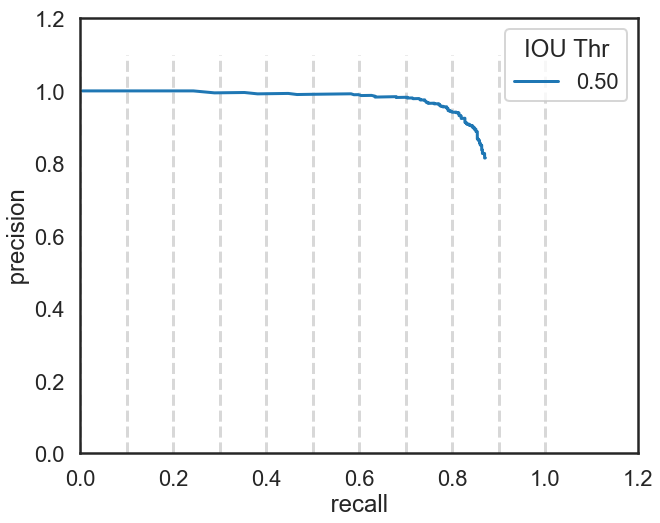

In [8]:
cls = 1

iou_thr = 0.5
start_time = time.time()
data =  cmap.get_avg_precision_at_iou(gt_boxes_class[cls], pr_boxes_class[cls], iou_thr=iou_thr, score_key = 'scores')
end_time = time.time()
print('Single IoU calculation took {:.4f} secs'.format(end_time - start_time))
print('avg precision: {:.4f}'.format(data['avg_prec']))
# pp.pprint(data)

idx = 0
ax = None
avg_precs = []
iou_thrs = []
avg_precs.append(data['avg_prec'])
iou_thrs.append(iou_thr)
precisions = data['precisions']
recalls    = data['recalls']
print(iou_thrs)
print(avg_precs)
print(' precisions: ', precisions.shape)
print(' recalls   : ', recalls.shape)
ax = cmap.plot_pr_curve(precisions, recalls, label='{:.2f}'.format(iou_thr), color=COLORS[idx*2], ax=ax)

avg_precs = [float('{:.4f}'.format(ap)) for ap in avg_precs]
iou_thrs = [float('{:.4f}'.format(thr)) for thr in iou_thrs]
print('map: {:.2f}'.format(100*np.mean(avg_precs)))
print('avg precs: ', avg_precs)
print('iou_thrs:  ', iou_thrs)
plt.legend(loc='upper right', title='IOU Thr', frameon=True)
for xval in np.linspace(0.0, 1.0, 11):
    plt.vlines(xval, 0.0, 1.1, color='gray', alpha=0.3, linestyles='dashed')
end_time = time.time()
print('\nPlotting and calculating mAP takes {:.4f} secs'.format(end_time - start_time))
plt.show()

### Display mAP one threshold (across all classes)

Single IoU calculation took 4.3709 secs
avg precision: 0.4631
[0.5]
[0.4631445460351786]
 precisions:  (36,)
 recalls   :  (36,)
map: 46.31
avg precs:  [0.4631]
iou_thrs:   [0.5]

Plotting and calculating mAP takes 4.3865 secs


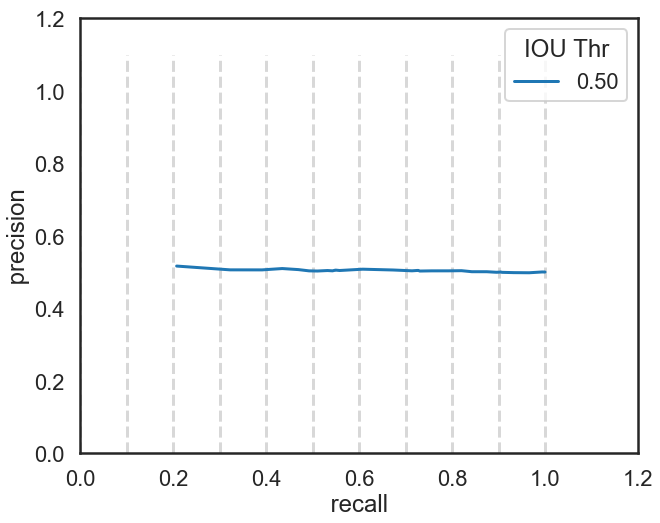

In [36]:
cls = 1

iou_thr = 0.5
start_time = time.time()
data =  cmap.get_avg_precision_at_iou(gt_boxes, pr_boxes, iou_thr=iou_thr, score_key = 'scores')
end_time = time.time()
print('Single IoU calculation took {:.4f} secs'.format(end_time - start_time))
print('avg precision: {:.4f}'.format(data['avg_prec']))
# pp.pprint(data)

idx = 0
ax = None
avg_precs = []
iou_thrs = []
avg_precs.append(data['avg_prec'])
iou_thrs.append(iou_thr)
precisions = data['precisions']
recalls    = data['recalls']
print(iou_thrs)
print(avg_precs)
print(' precisions: ', precisions.shape)
print(' recalls   : ', recalls.shape)
ax = cmap.plot_pr_curve(precisions, recalls, label='{:.2f}'.format(iou_thr), color=COLORS[idx*2], ax=ax)

avg_precs = [float('{:.4f}'.format(ap)) for ap in avg_precs]
iou_thrs = [float('{:.4f}'.format(thr)) for thr in iou_thrs]
print('map: {:.2f}'.format(100*np.mean(avg_precs)))
print('avg precs: ', avg_precs)
print('iou_thrs:  ', iou_thrs)
plt.legend(loc='upper right', title='IOU Thr', frameon=True)
for xval in np.linspace(0.0, 1.0, 11):
    plt.vlines(xval, 0.0, 1.1, color='gray', alpha=0.3, linestyles='dashed')
end_time = time.time()
print('\nPlotting and calculating mAP takes {:.4f} secs'.format(end_time - start_time))
plt.show()

## Display distribution of various scores 

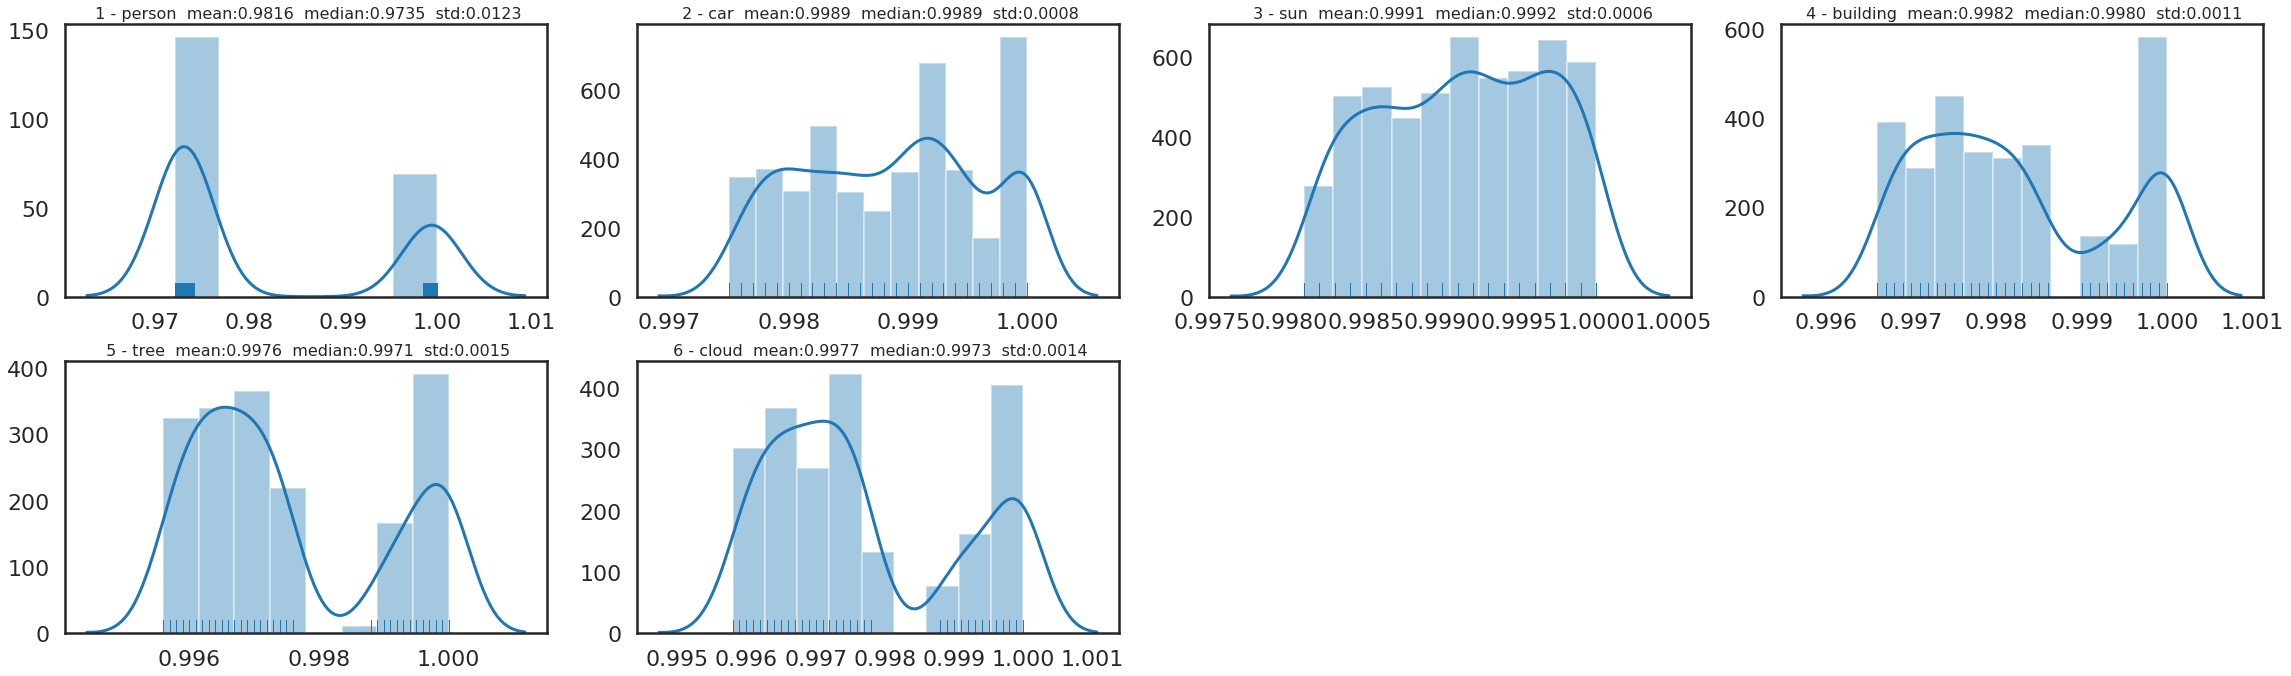

In [16]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_orig')

### Otther distributions

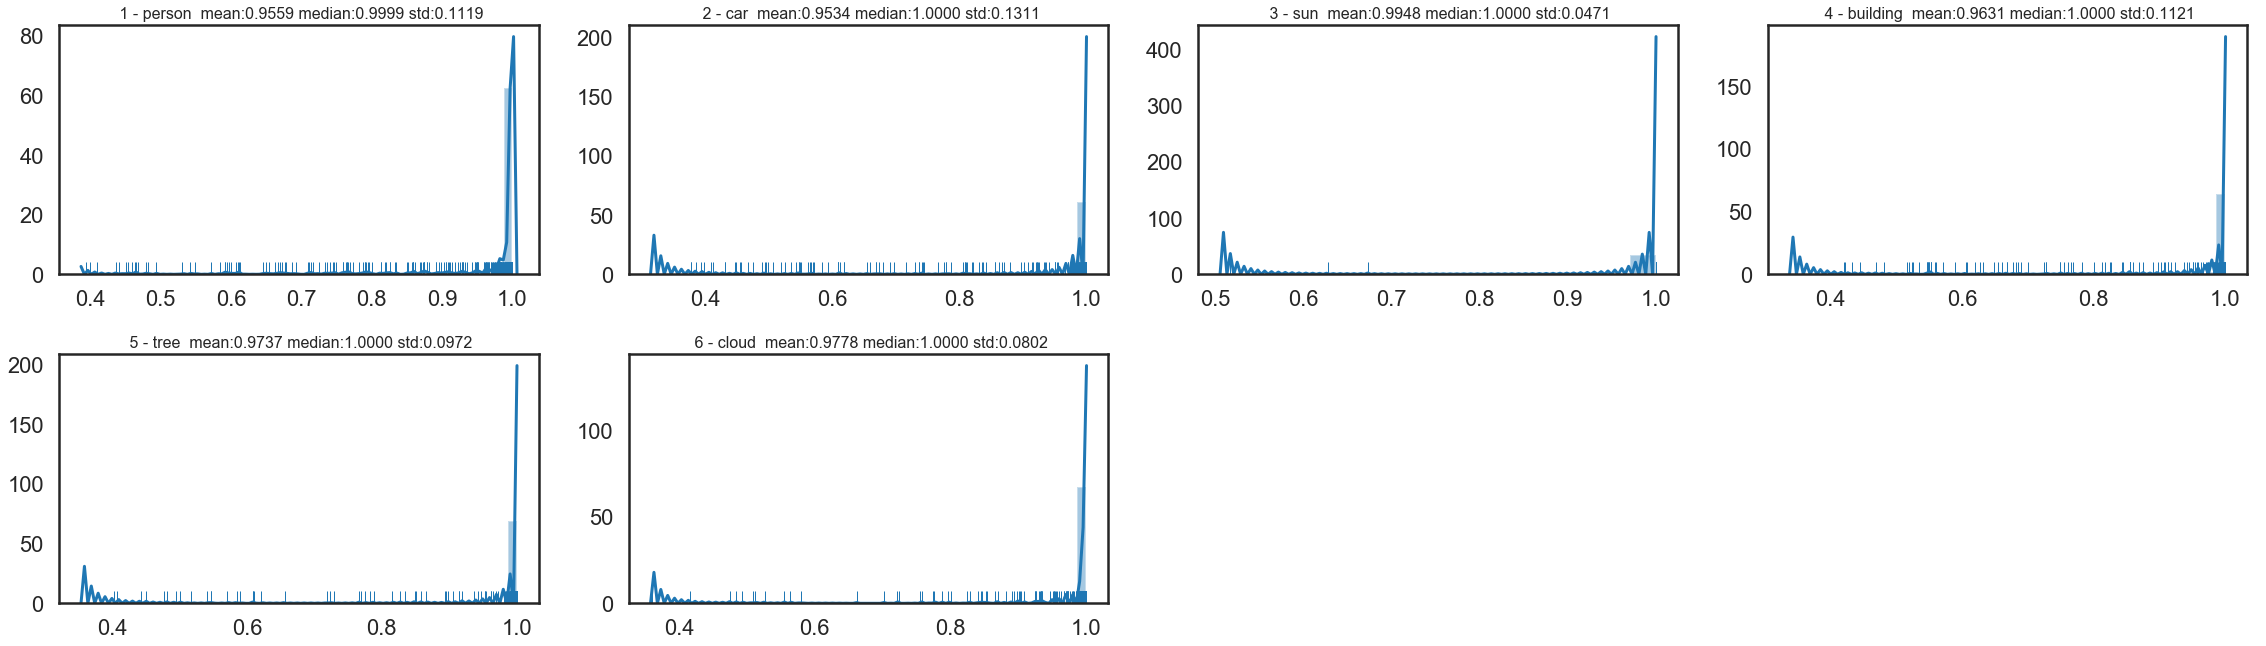

In [65]:
plot_score_distribution(cls_info, 'mrcnn_score_norm')

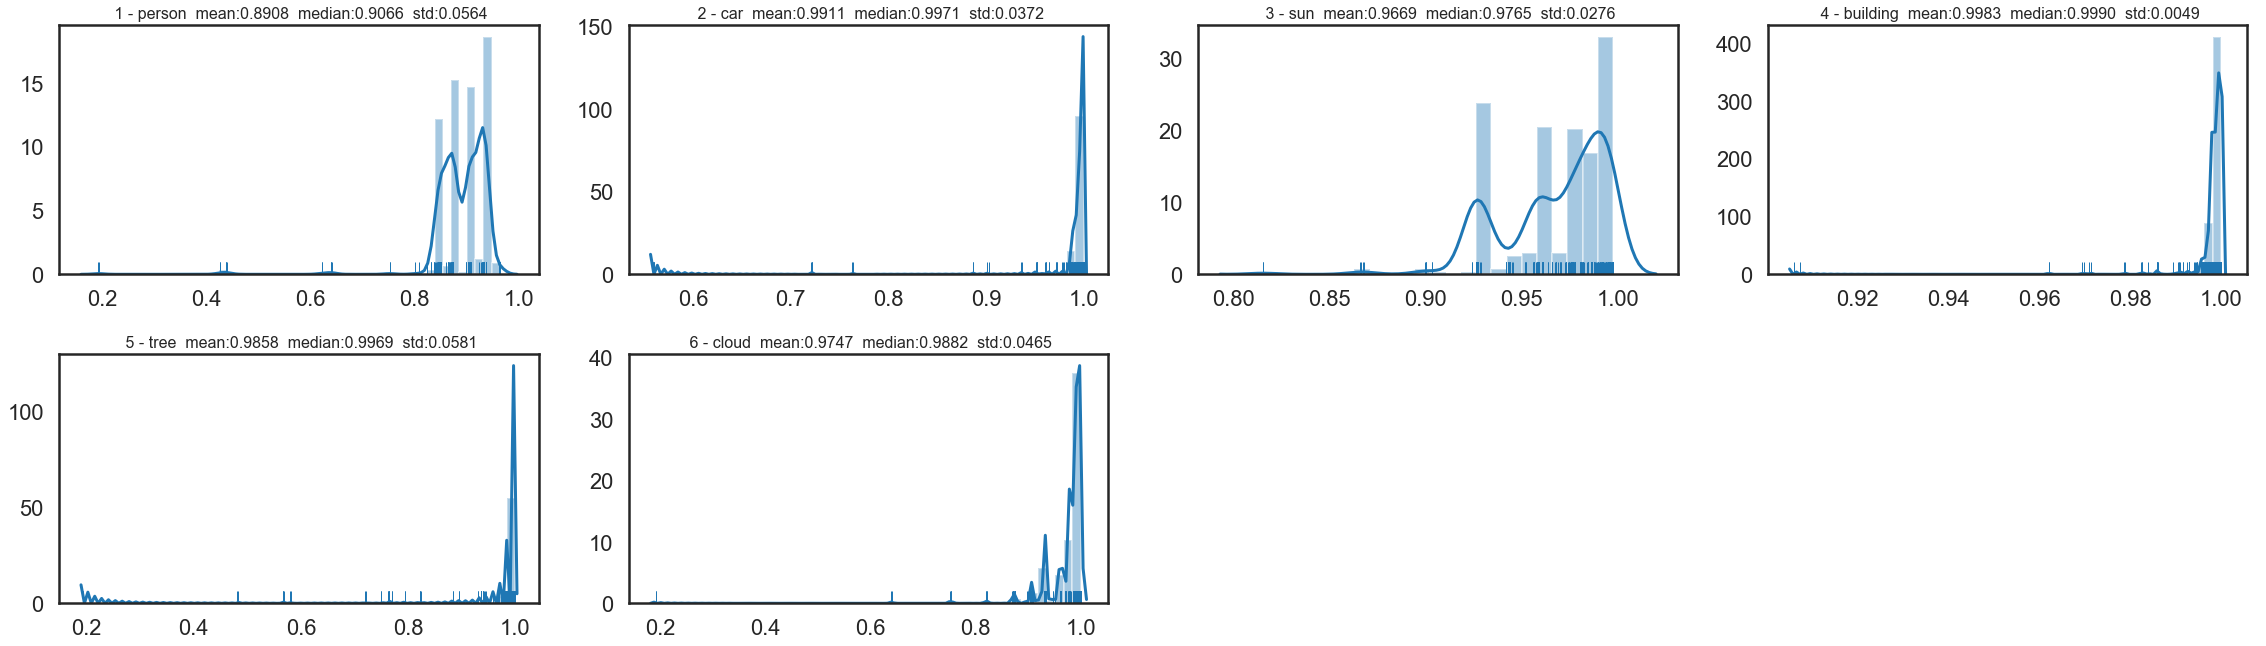

In [41]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_0')

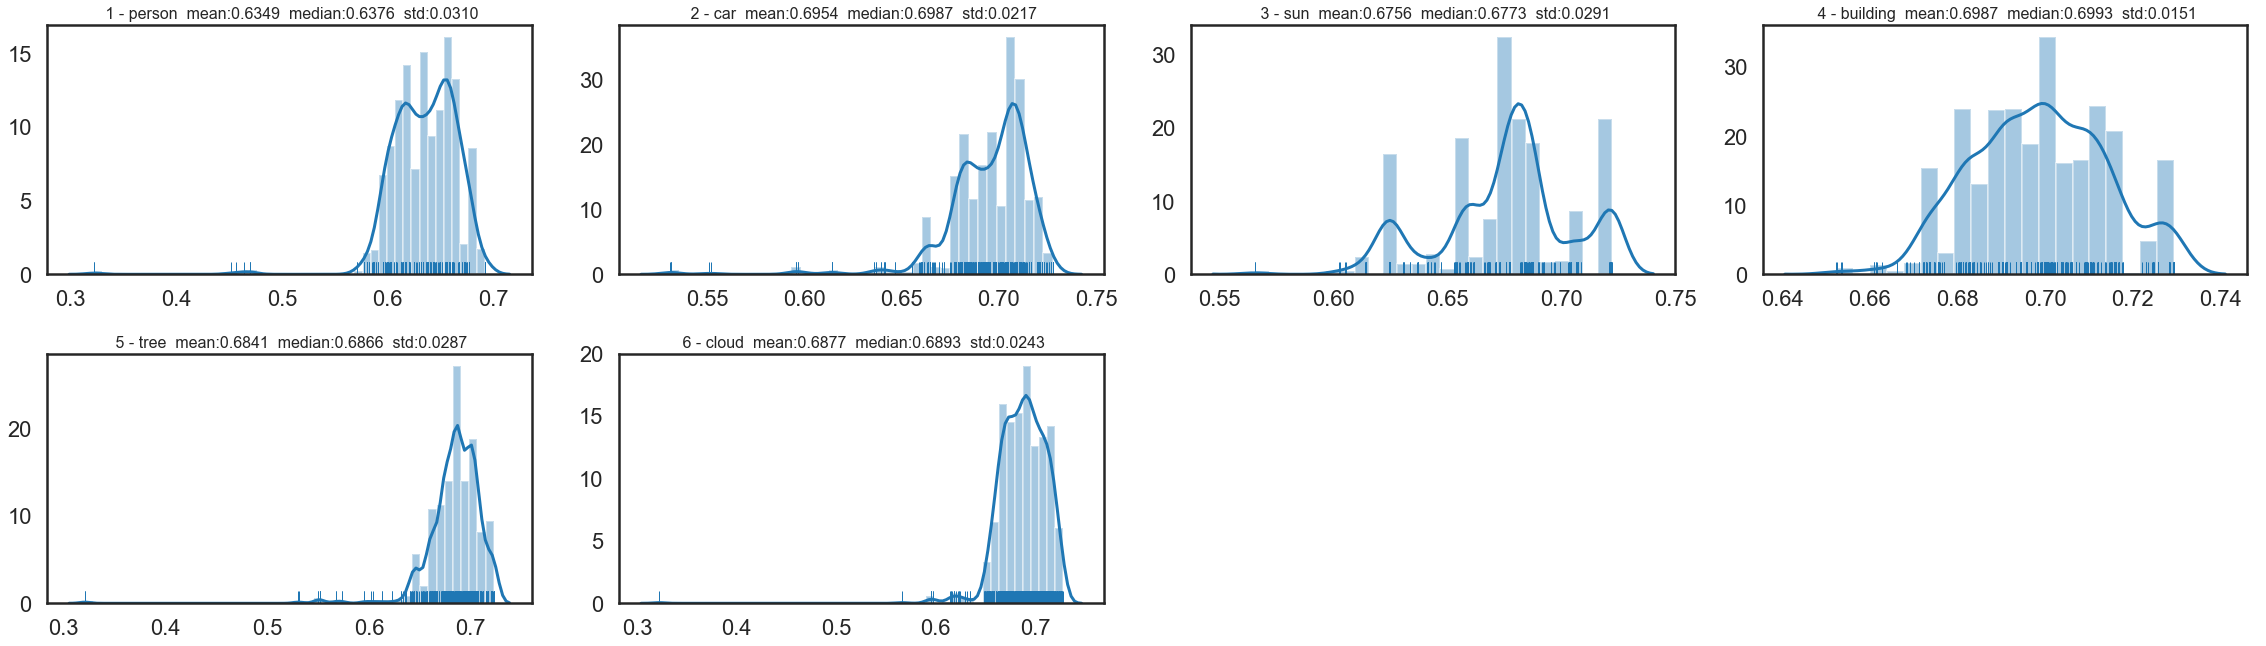

In [42]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_1')

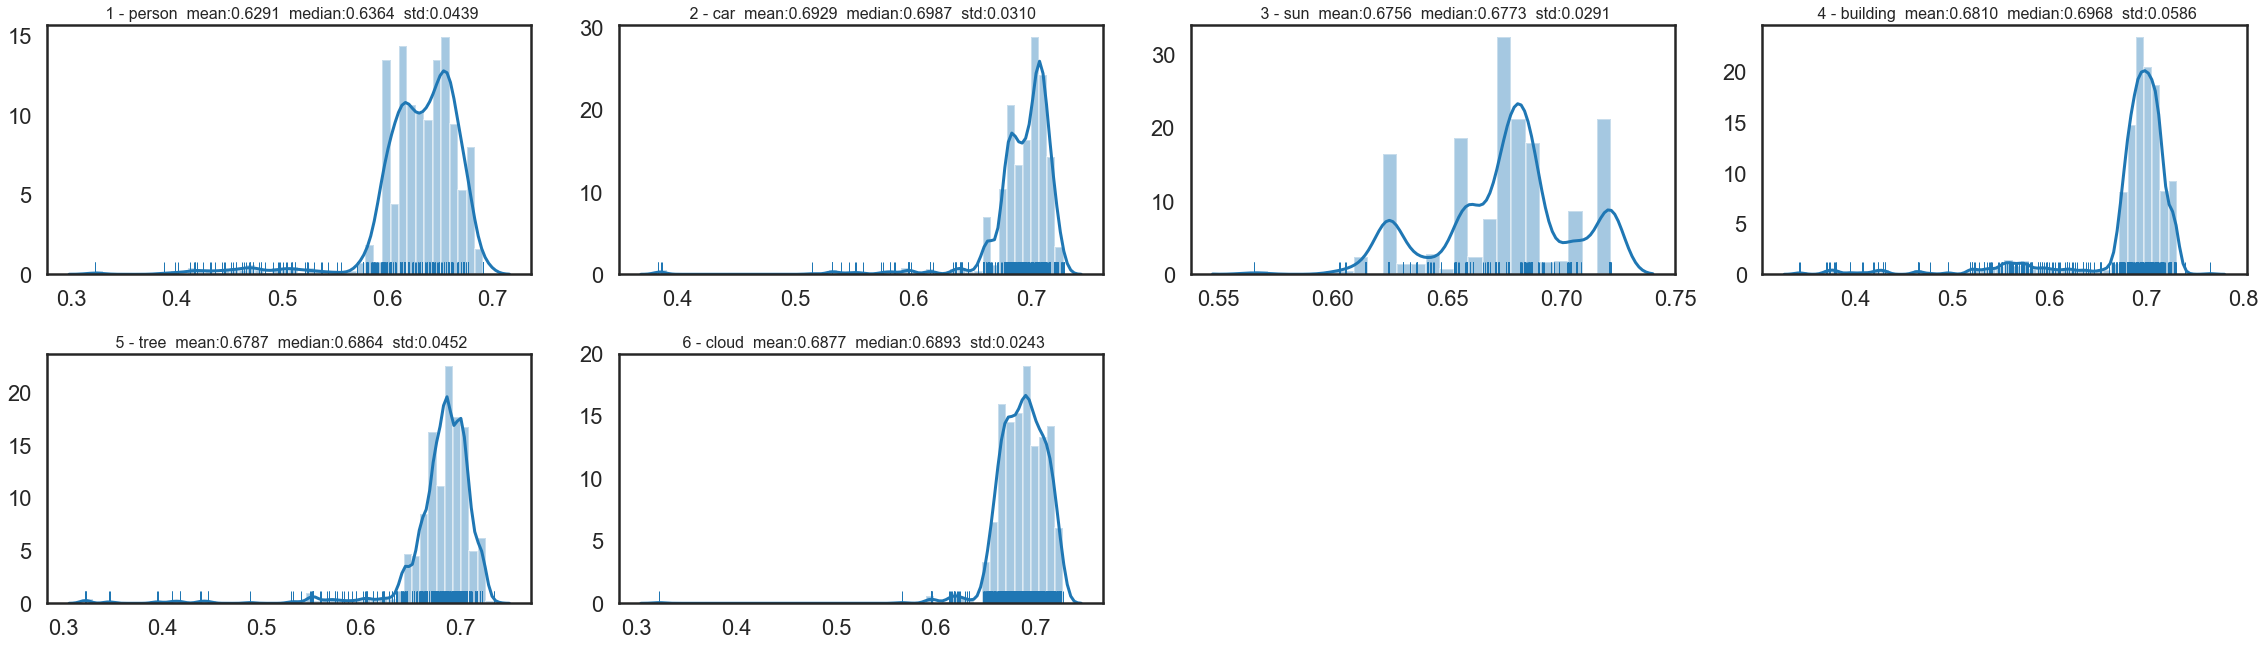

In [43]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_2')

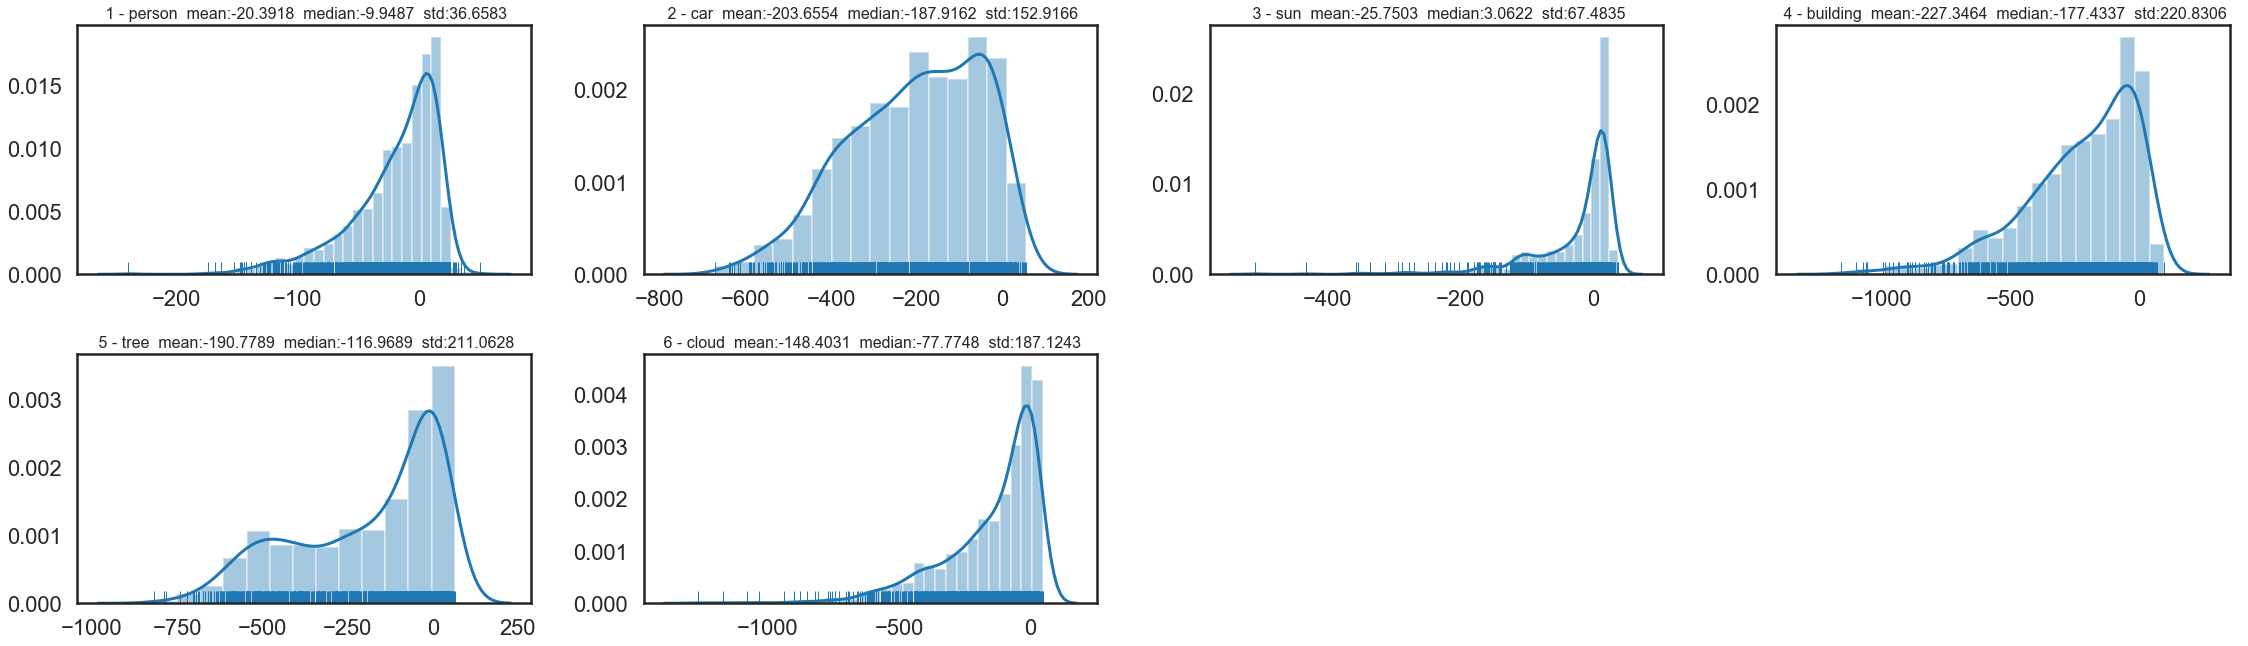

In [44]:
cmap.plot_score_distribution(cls_info, 'fcn_score_0')

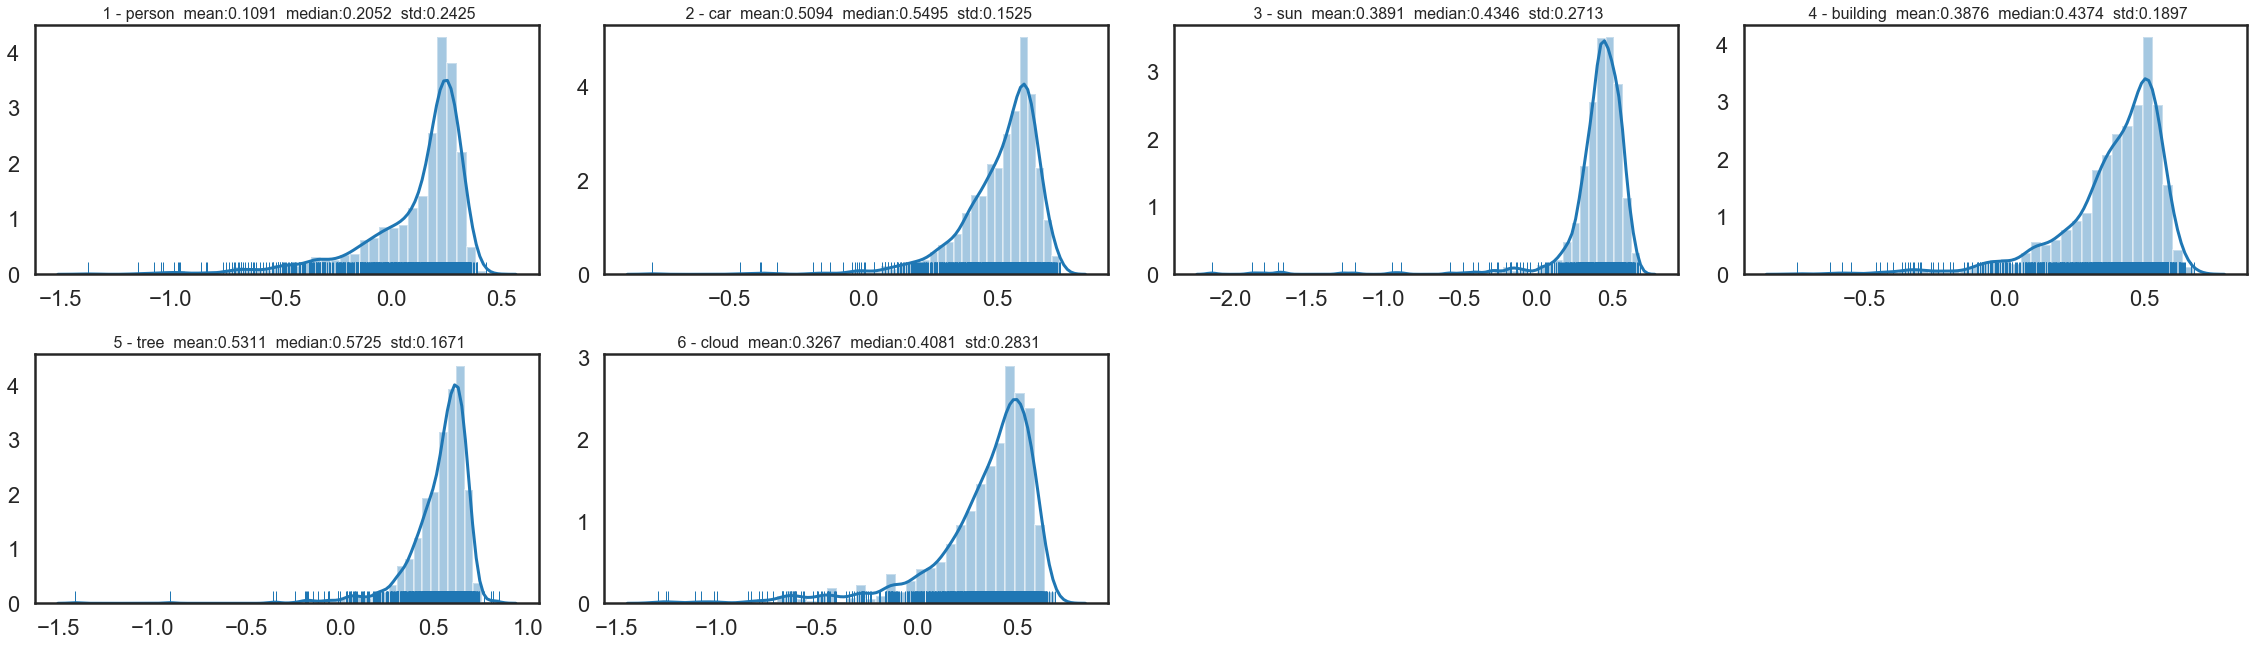

In [46]:
cmap.plot_score_distribution(cls_info, 'fcn_score_1')

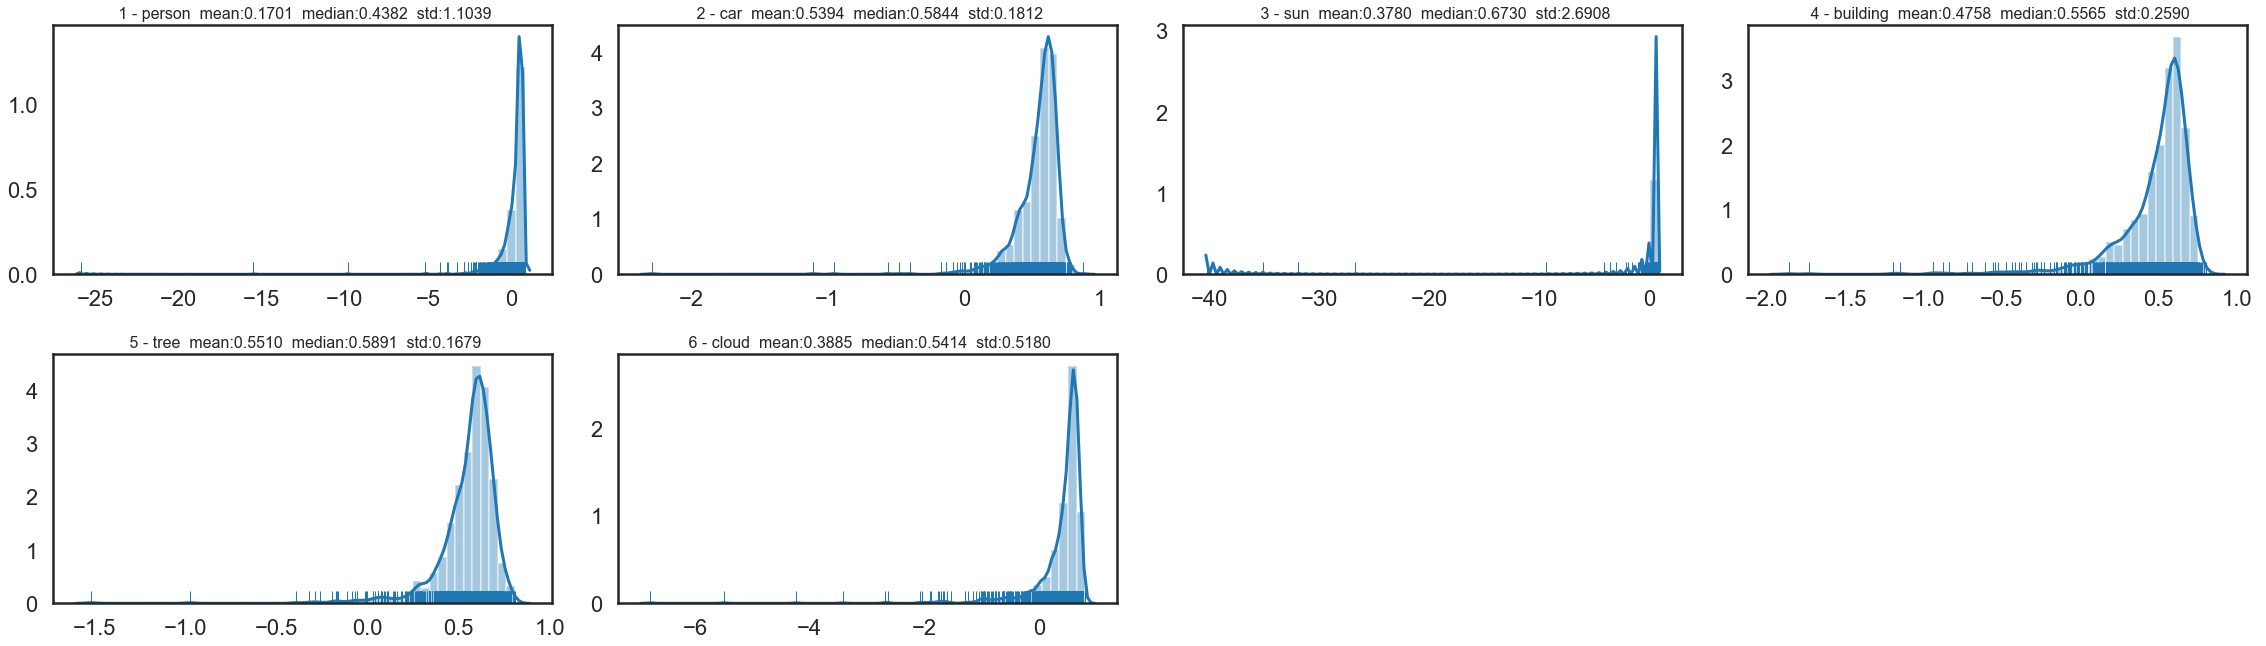

In [47]:
cmap.plot_score_distribution(cls_info, 'fcn_score_2')

## Plot AP vs. IoU Threshold for various scores 

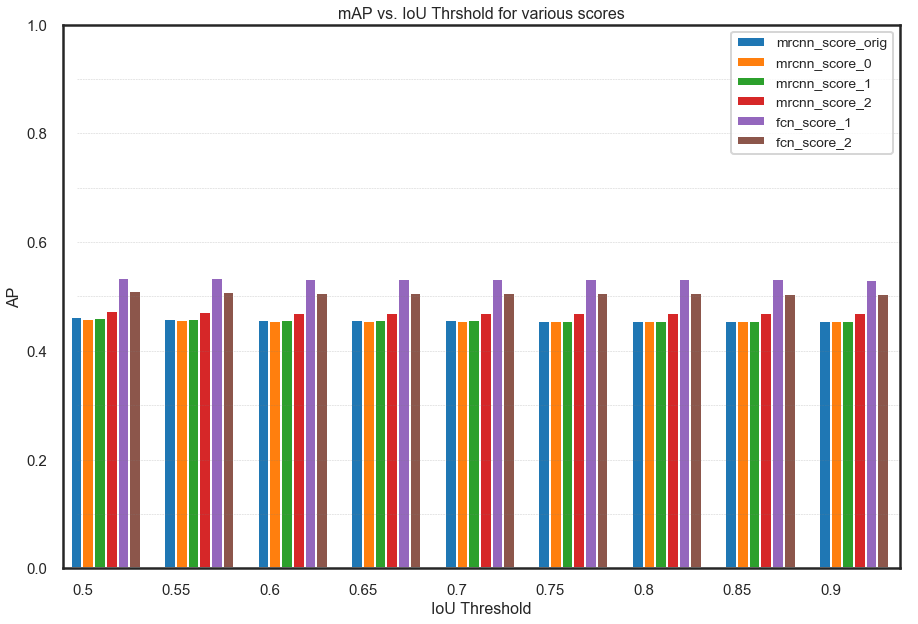


                                                  AP @ IoU Thresholds for computed scores                                                   

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Score -                           0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
mrcnn_score_orig                  0.4628     0.4590     0.4569     0.4564     0.4559     0.4552     0.4552     0.4549     0.4545     %45.68 
mrcnn_score_0                     0.4592     0.4569     0.4557     0.4553     0.4549     0.4546     0.4546     0.4546     0.4546     %45.56 
mrcnn_score_1                     0.4612     0.4581     0.4569     0.4567     0.4560     0.4552     0.4551     0.4551     0.4545     %45.65 
mrcnn_score_2

In [19]:
# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2',  'fcn_score_1', 'fcn_score_2']
disp_ious    = [0.5 , 0.75, 0.9]
cmap.plot_mAP_vs_IoUs(all_data, disp_scores)# , disp_ious)

## Barchart mAP vs. Class for different scores `plot_mAP_vs_class()`

disp_scores:  ['mrcnn_score_orig', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_1', 'fcn_score_2']


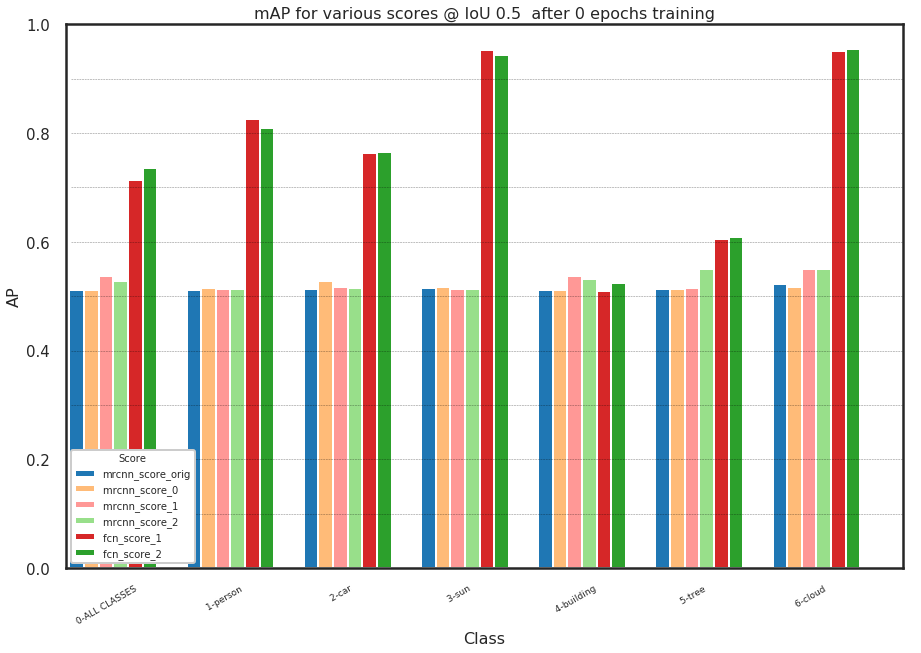


                                         AP @ IoU 0.50 Thresholds for Computed Scores after 0 epochs                                        

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_0     mrcnn_score_1     mrcnn_score_2       fcn_score_1       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        51.09%            51.52%            51.32%            51.28%            82.60%            80.92% 
 2 - car                           51.23%            52.83%            51.62%            51.56%            76.26%            76.53% 
 3 - sun                           51.58%            51.76%            51.40%            51.40%            95.27%            94.41% 
 4 - building                      51.11%   

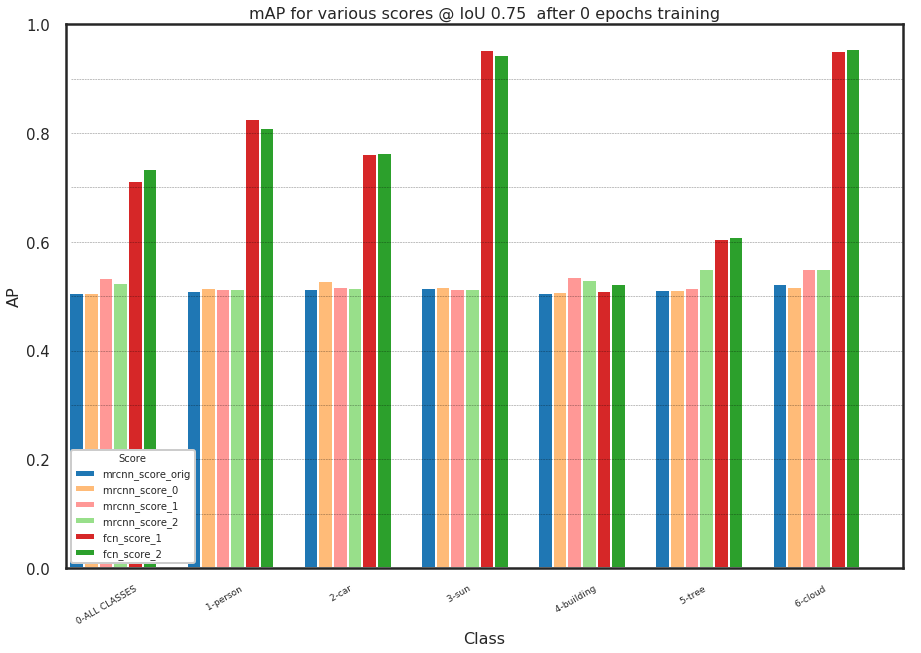


                                         AP @ IoU 0.75 Thresholds for Computed Scores after 0 epochs                                        

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_0     mrcnn_score_1     mrcnn_score_2       fcn_score_1       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        51.00%            51.47%            51.29%            51.28%            82.60%            80.92% 
 2 - car                           51.23%            52.83%            51.62%            51.56%            76.09%            76.38% 
 3 - sun                           51.58%            51.76%            51.40%            51.40%            95.27%            94.41% 
 4 - building                      50.63%   

In [17]:
# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_1', 'fcn_score_2']
disp_ious    = [0.5 , 0.75, 0.9]
cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = class_names, iou = 0.5)# , disp_ious)
cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = class_names, iou = 0.75)# , disp_ious)

disp_scores:  ['mrcnn_score_orig', 'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']


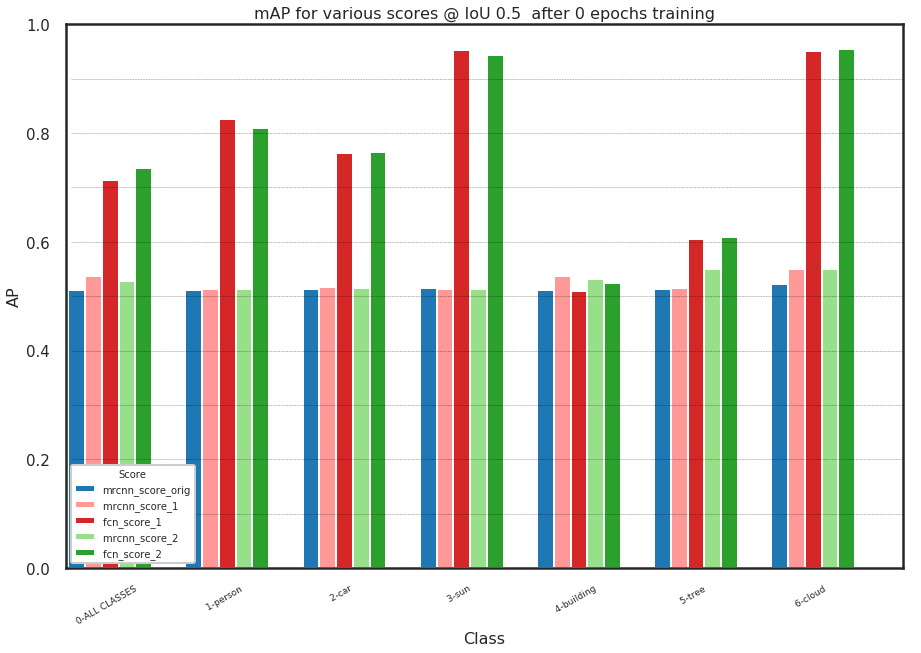


                                         AP @ IoU 0.50 Thresholds for Computed Scores after 0 epochs                                        

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        51.09%            51.32%            82.60%            51.28%            80.92% 
 2 - car                           51.23%            51.62%            76.26%            51.56%            76.53% 
 3 - sun                           51.58%            51.40%            95.27%            51.40%            94.41% 
 4 - building                      51.11%            53.73%            50.95%            53.14%            52.50% 
 

In [19]:
# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
disp_scores  = [ 'mrcnn_score_orig', 'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']
disp_ious    = [0.5 , 0.75, 0.9]
cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = class_names, iou = 0.5)# , disp_ious)

## Plot combined mAP for different IoU thresholds for each score
(one type of score, e.g. 'scores' - all classes combined)

### `mrcnn_score_orig`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                         AP @ IoU Thresholds for Score Computation: mrcnn_score_orig                                        

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.4553     0.4553     0.4545     0.4545     0.4545     0.4545     0.4545     0.4545     0.4545      %45.47 
  2 - car                         0.4545     0.4545     0.4545     0.4545     0.4545     0.4545     0.4545     0.4545     0.4545      %45.45 
  3 - sun                         0.4545     0.4545     0.4545     0.4545     0.454

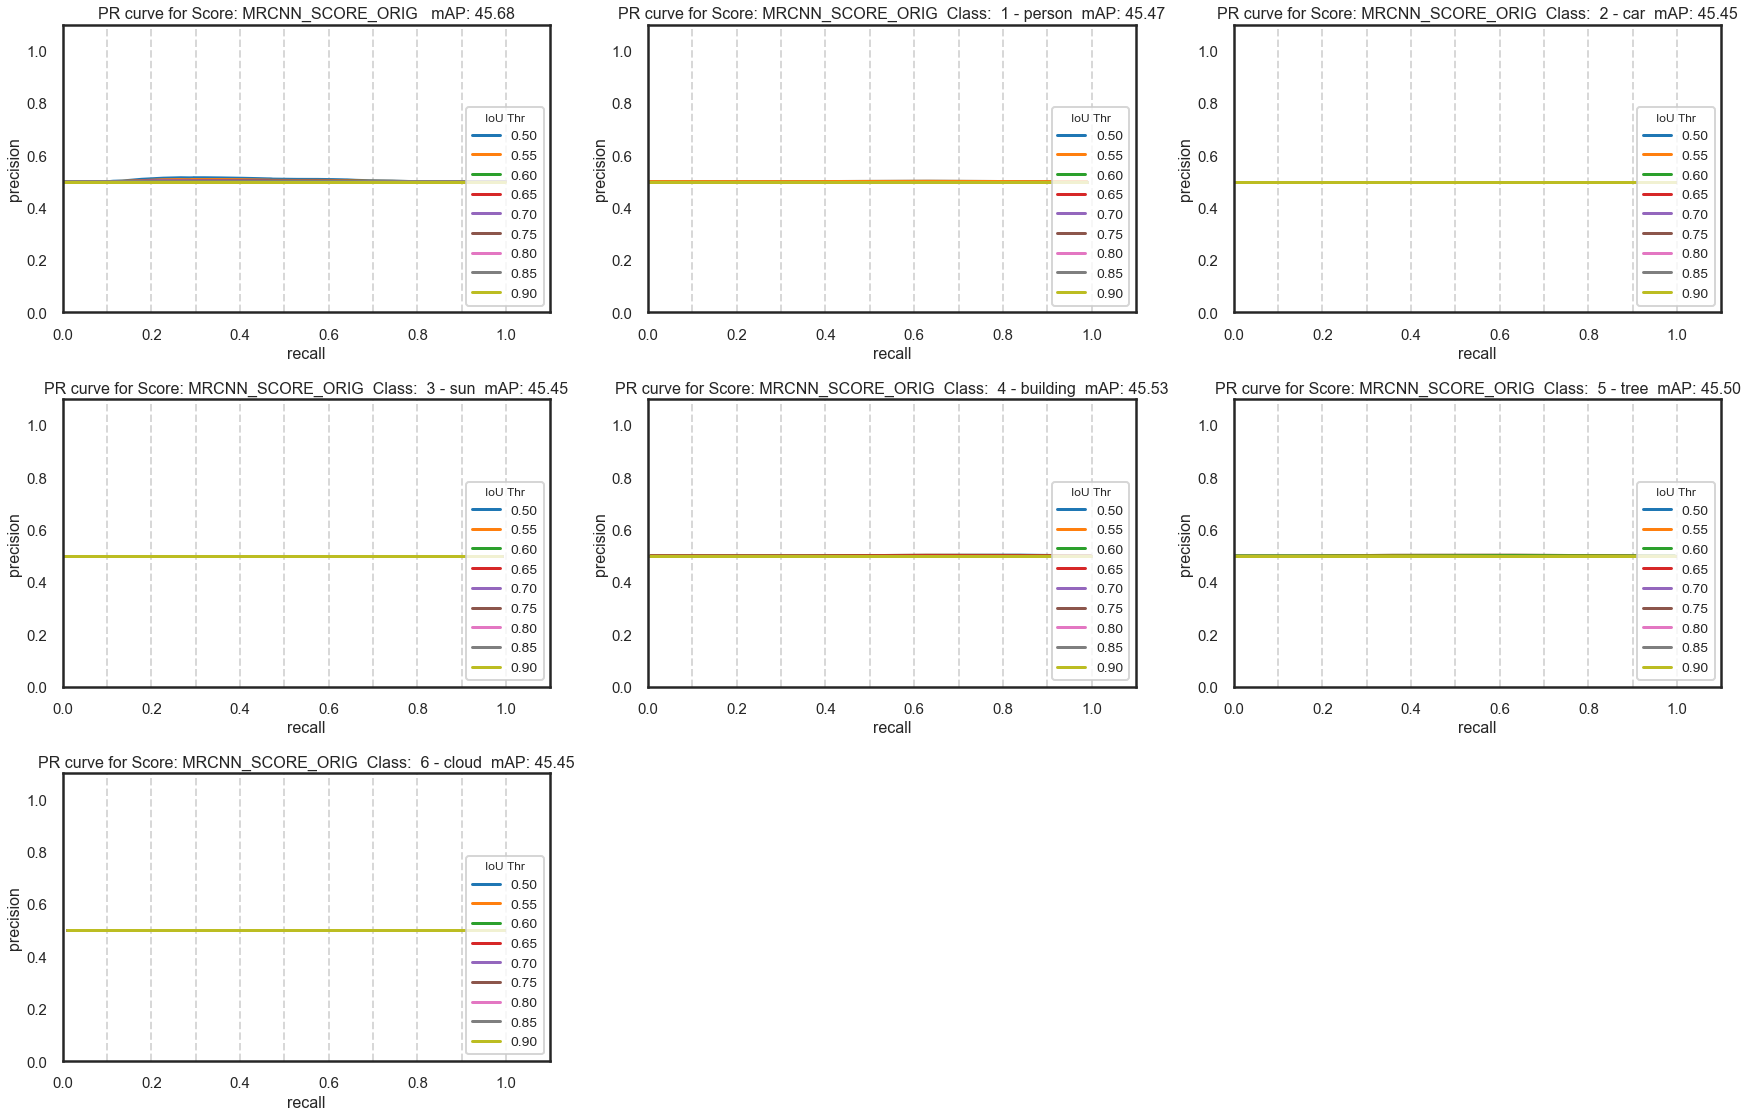

In [20]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_orig'  , class_names = class_names, columns = 3)

### `mrcnn_score_0`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                          AP @ IoU Thresholds for Score Computation: mrcnn_score_0                                          

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  0 - ALL CLASSES                 0.4592     0.4571     0.4559     0.4555     0.4550     0.4548     0.4547     0.4547     0.4546      %45.57 



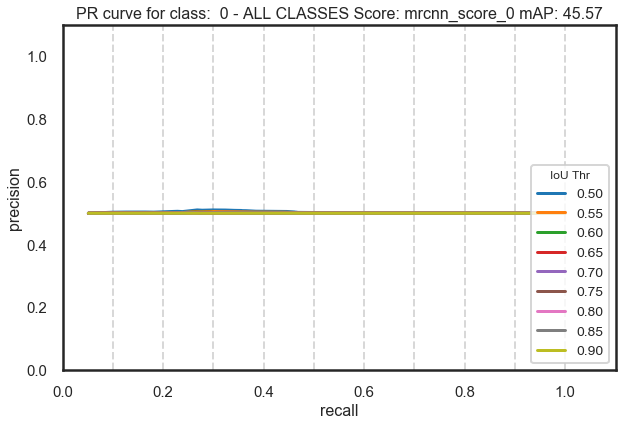

In [19]:
# plot_mAP_by_score(all_data, 'scores' )

cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_0' , class_ids = 0 , class_names = class_names, columns = 3)

### `mrcnn_score_1`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                          AP @ IoU Thresholds for Score Computation: mrcnn_score_1                                          

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  0 - ALL CLASSES                 0.4612     0.4581     0.4569     0.4567     0.4560     0.4552     0.4551     0.4551     0.4545      %45.65 



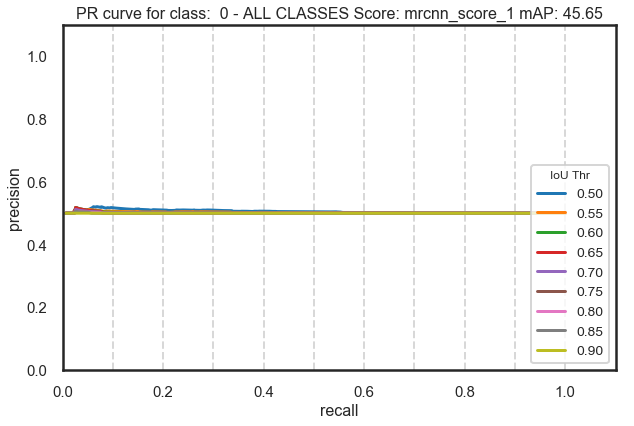

In [20]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_1' , class_ids = 0 ,class_names = class_names, columns = 3)

### `mrcnn_score_2`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                          AP @ IoU Thresholds for Score Computation: mrcnn_score_2                                          

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  0 - ALL CLASSES                 0.4740     0.4714     0.4705     0.4703     0.4701     0.4699     0.4699     0.4699     0.4699      %47.07 



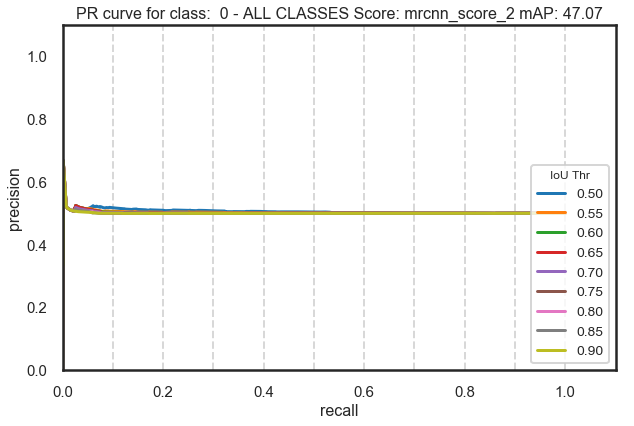

In [21]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_2' , class_ids = 0 ,class_names = class_names, columns = 3)

### `mrcnn_score_norm`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                         AP @ IoU Thresholds for Score Computation: mrcnn_score_norm                                        

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  0 - ALL CLASSES                 0.4572     0.4563     0.4555     0.4552     0.4547     0.4547     0.4547     0.4547     0.4545      %45.53 



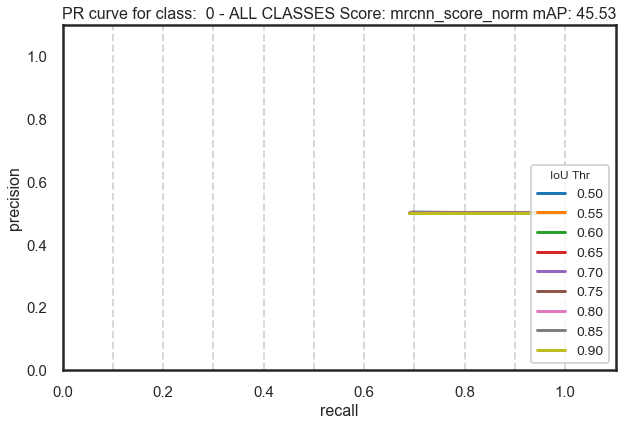

In [22]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_norm' , class_ids = 0 ,class_names = class_names, columns = 3)

### `fcn_score_0`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                           AP @ IoU Thresholds for Score Computation: fcn_score_0                                           

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  0 - ALL CLASSES                 0.4840     0.4835     0.4832     0.4831     0.4829     0.4829     0.4827     0.4827     0.4826      %48.31 



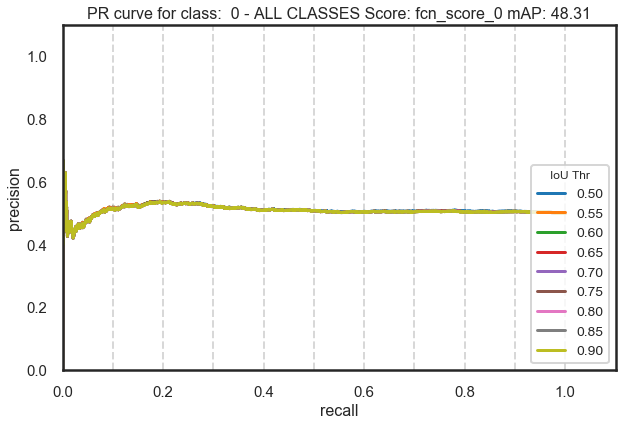

In [23]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_0' , class_ids = 0 , class_names = class_names,columns = 3)

### `fcn_score_1`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                           AP @ IoU Thresholds for Score Computation: fcn_score_1                                           

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  ALL CLASSES                     53.49%     53.35%     53.26%     53.24%     53.17%     53.15%     53.15%     53.13%     53.12%      %53.23 
--------------------------------------------------------------------------------------------------------------------------------------------


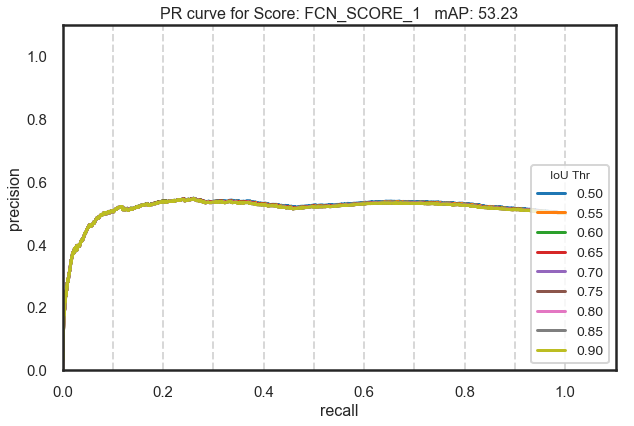

In [22]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_1' , class_ids = 0 , class_names = class_names,columns = 3)

### `fcn_score_2`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                           AP @ IoU Thresholds for Score Computation: fcn_score_2                                           

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  ALL CLASSES                     50.93%     50.78%     50.69%     50.68%     50.58%     50.56%     50.56%     50.53%     50.52%      %50.65 
--------------------------------------------------------------------------------------------------------------------------------------------


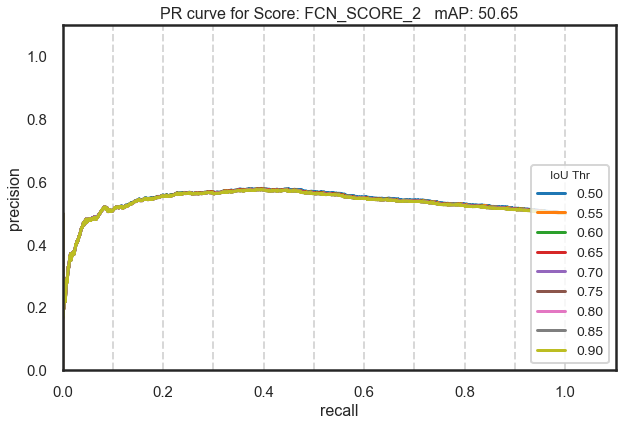

In [21]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_2' , class_ids = 0 , class_names = class_names,columns = 3)

## Plot combined mAP info for different scores (at a given IoU threshold, all classes combined)


                                                               AP @ IoU 0.90 Thresholds for Computed Scores                                                               

--------------------------------------------------------------------------------  scores  --------------------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig  mrcnn_score_norm     mrcnn_score_0     mrcnn_score_1     mrcnn_score_2       fcn_score_0       fcn_score_1       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ALL CLASSES                        45.52%            45.45%            45.71%            46.21%            47.12%            51.07%            51.94%            52.30%
-----------------------------------------------------------------------------------------------------------------------------------------------------

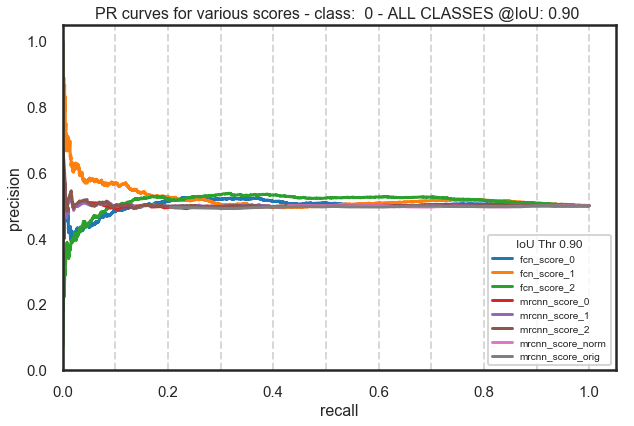

In [26]:
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2' ,'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = [0], class_names = class_names,iou = 0.90)


                                                               AP @ IoU 0.85 Thresholds for Computed Scores                                                               

--------------------------------------------------------------------------------  scores  --------------------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig  mrcnn_score_norm     mrcnn_score_0     mrcnn_score_1       fcn_score_0       fcn_score_1       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ALL CLASSES                        45.49%            45.47%            45.47%            45.51%            48.27%            52.66%            54.24%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


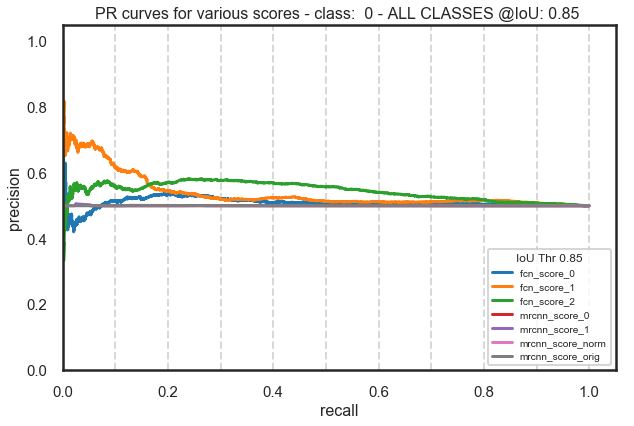

In [182]:
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1',  'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = [0], class_names = class_names, iou = 0.85)


                                                               AP @ IoU 0.50 Thresholds for Computed Scores                                                               

--------------------------------------------------------------------------------  scores  --------------------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig  mrcnn_score_norm     mrcnn_score_0     mrcnn_score_1       fcn_score_0       fcn_score_1       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        0.4553            0.4554            0.4562            0.4562            0.6297            0.7372            0.7241 
 2 - car                           0.4545            0.4545            0.4550            0.4545            0.5873            0.6327            0.6568 
 3 - sun                         

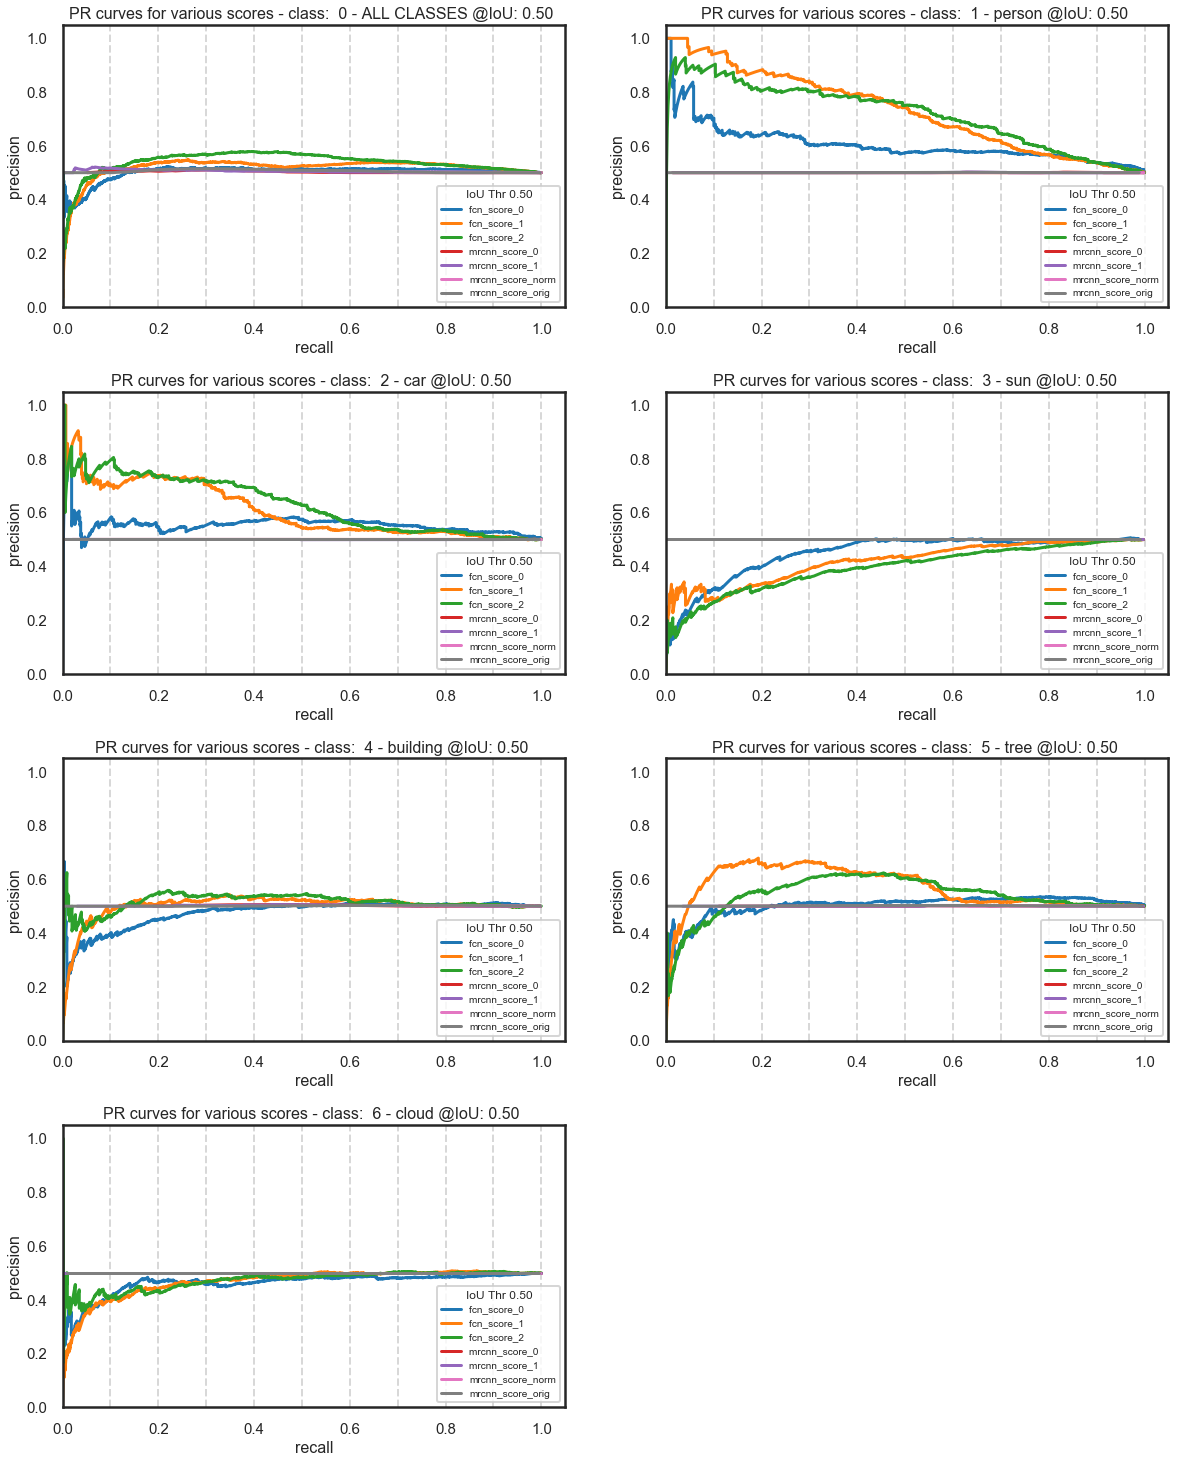

In [23]:
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1',  'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores , class_names = class_names, iou = 0.50)


## Indvidual classes - Plot mAP info for  at different thresholds (one type of score, e.g. 'scores')

### Plot mAP for `mrcnn_score_orig` for different IoU thresholds

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                         AP @ IoU Thresholds for Score Computation: mrcnn_score_orig                                        

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  0 - ALL CLASSES                 0.9054     0.9023     0.8921     0.7962     0.7721     0.6545     0.5047     0.2586     0.0795      %64.06 
  1 - person                      0.8084     0.7965     0.6878     0.5307     0.3618     0.1987     0.0708     0.0283     0.0069      %38.78 
  2 - car                         0.9082     0.9066     0.9024     0.8885     0.785

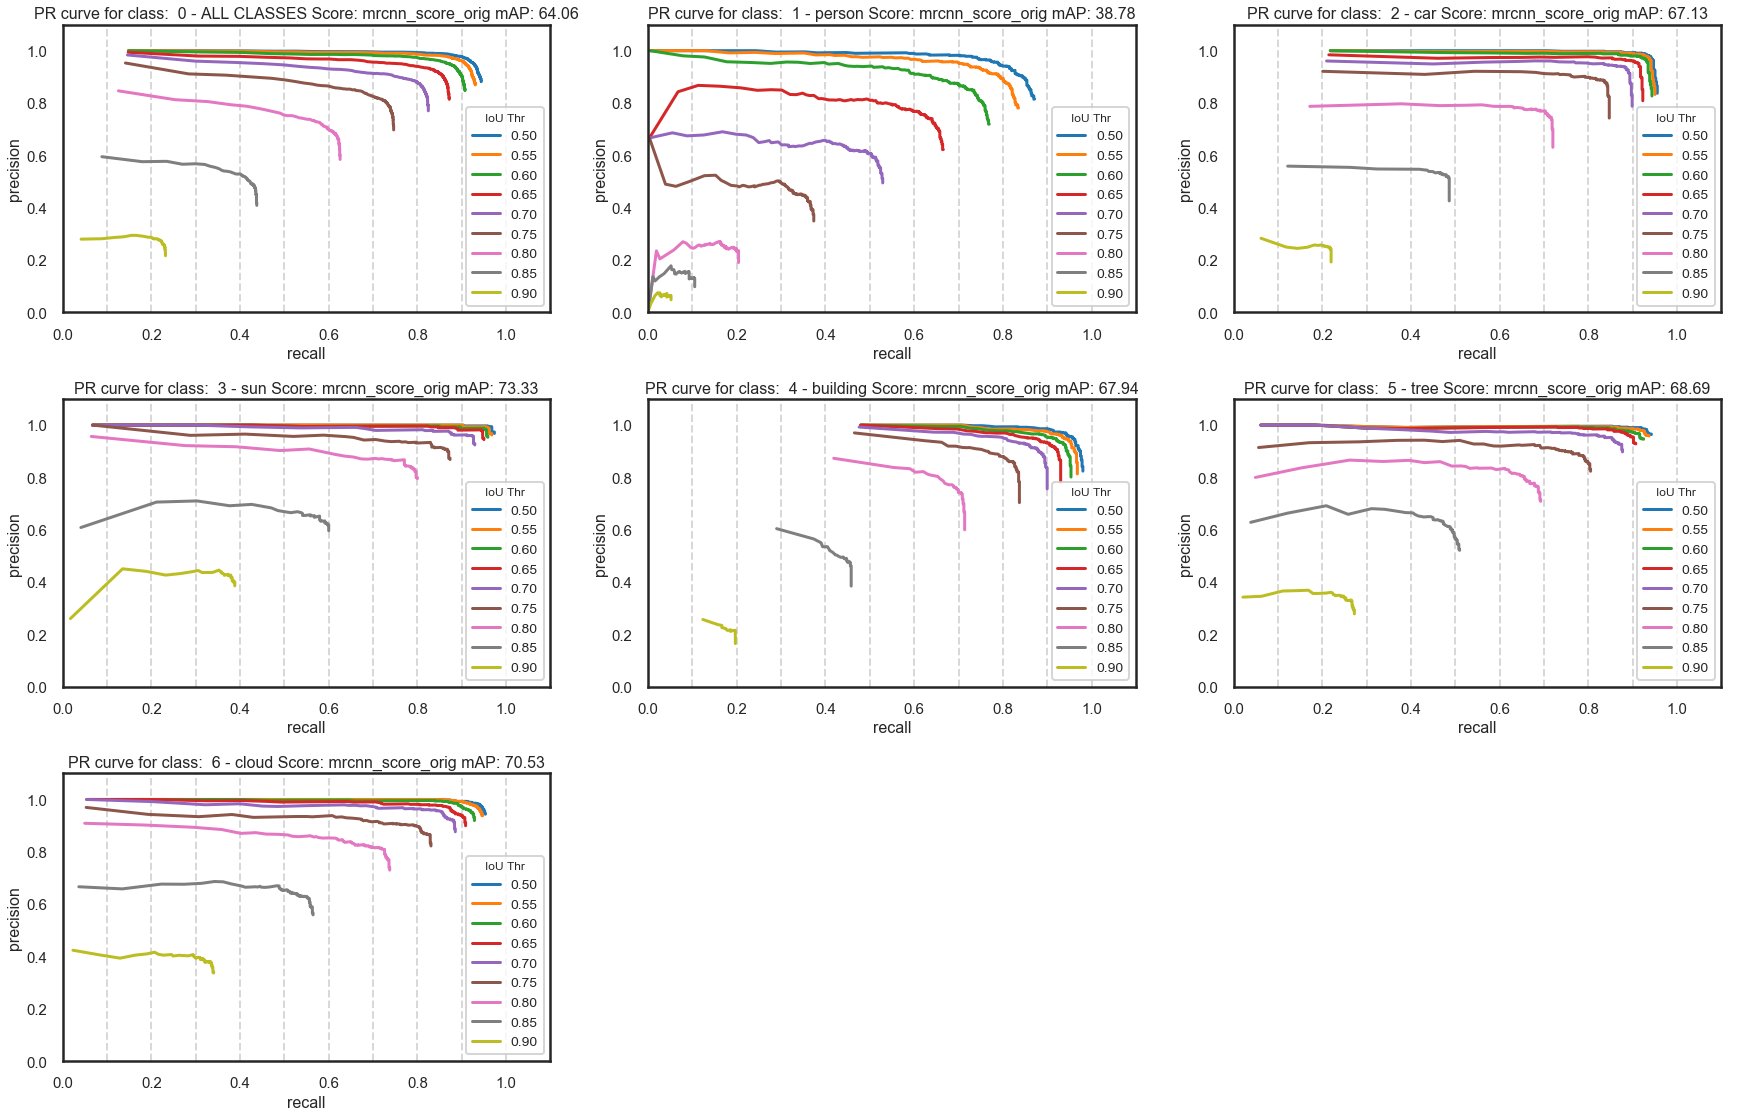

In [199]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_orig', class_names = class_names )

### Plot mAP for `mrcnn_score_norm` for different IoU thresholds


                                         AP @ IoU Thresholds for Score Computation: mrcnn_score_norm                                        

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.7777     0.7569     0.6442     0.4946     0.3545     0.1565     0.0654     0.0264     0.0050      %36.46 
  2 - car                         0.8921     0.8852     0.8817     0.8759     0.7737     0.7111     0.4763     0.2429     0.0719      %64.56 
  3 - sun                         0.9062     0.9062     0.8977     0.8919     0.8634     0.8205     0.5786     0.3862     0.1338      %70.94 
  4 - buil

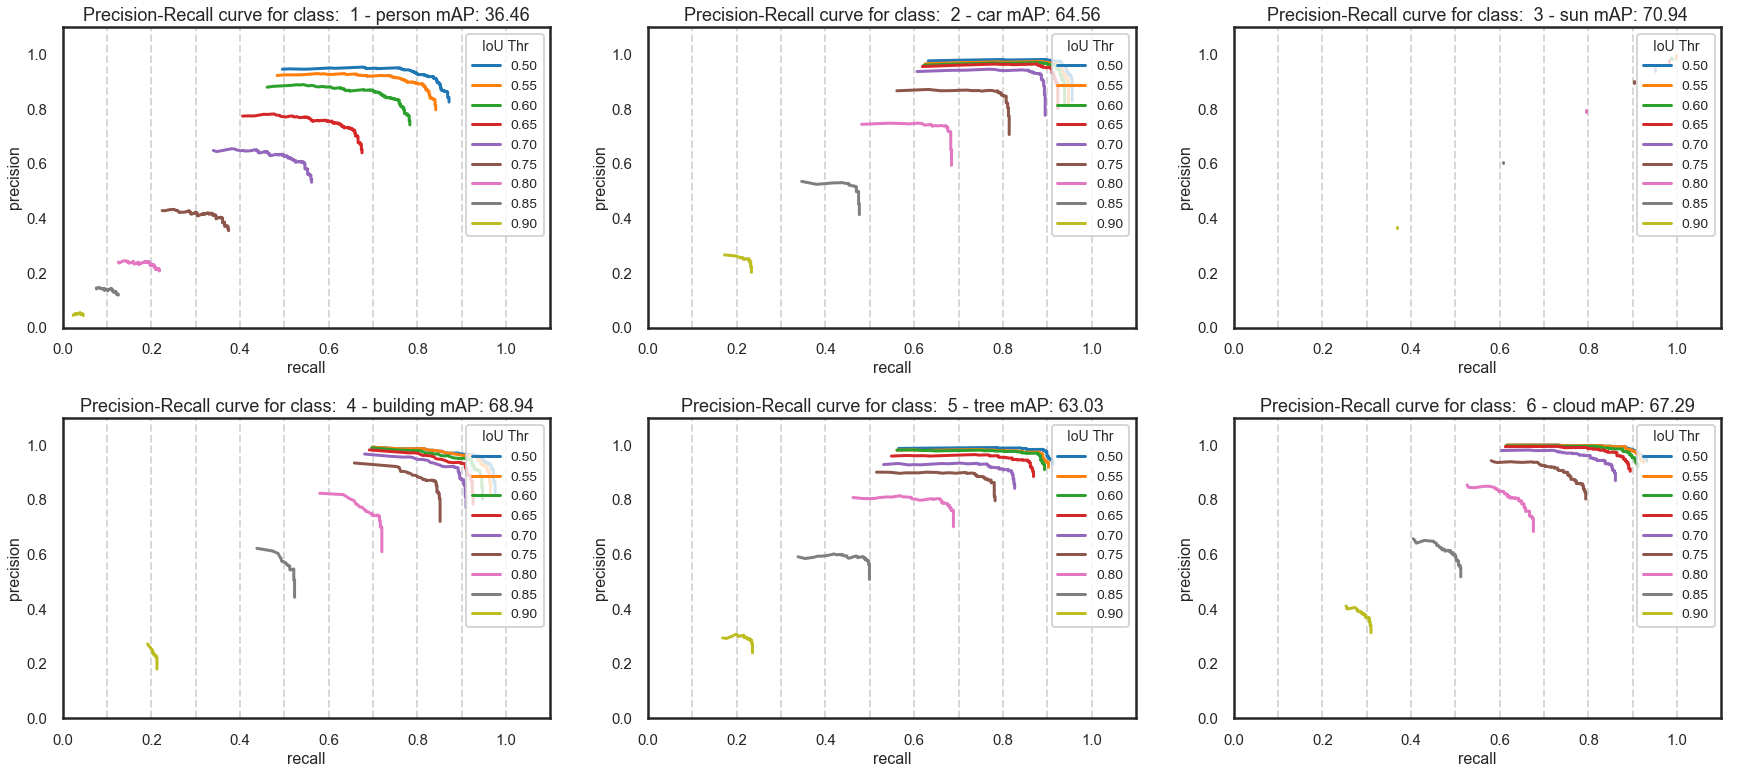

In [163]:
plot_mAP_by_IOU(all_data, 'mrcnn_score_norm')

### Plot mAP for `mrcnn_score_0` for different IoU thresholds

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                          AP @ IoU Thresholds for Score Computation: mrcnn_score_0                                          

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  0 - ALL CLASSES                 0.8912     0.8870     0.8770     0.7862     0.7696     0.6493     0.5006     0.2566     0.0779      %63.28 
  1 - person                      0.7774     0.7507     0.6410     0.5154     0.3580     0.1734     0.0717     0.0244     0.0061      %36.87 
  2 - car                         0.8851     0.8819     0.8780     0.8694     0.766

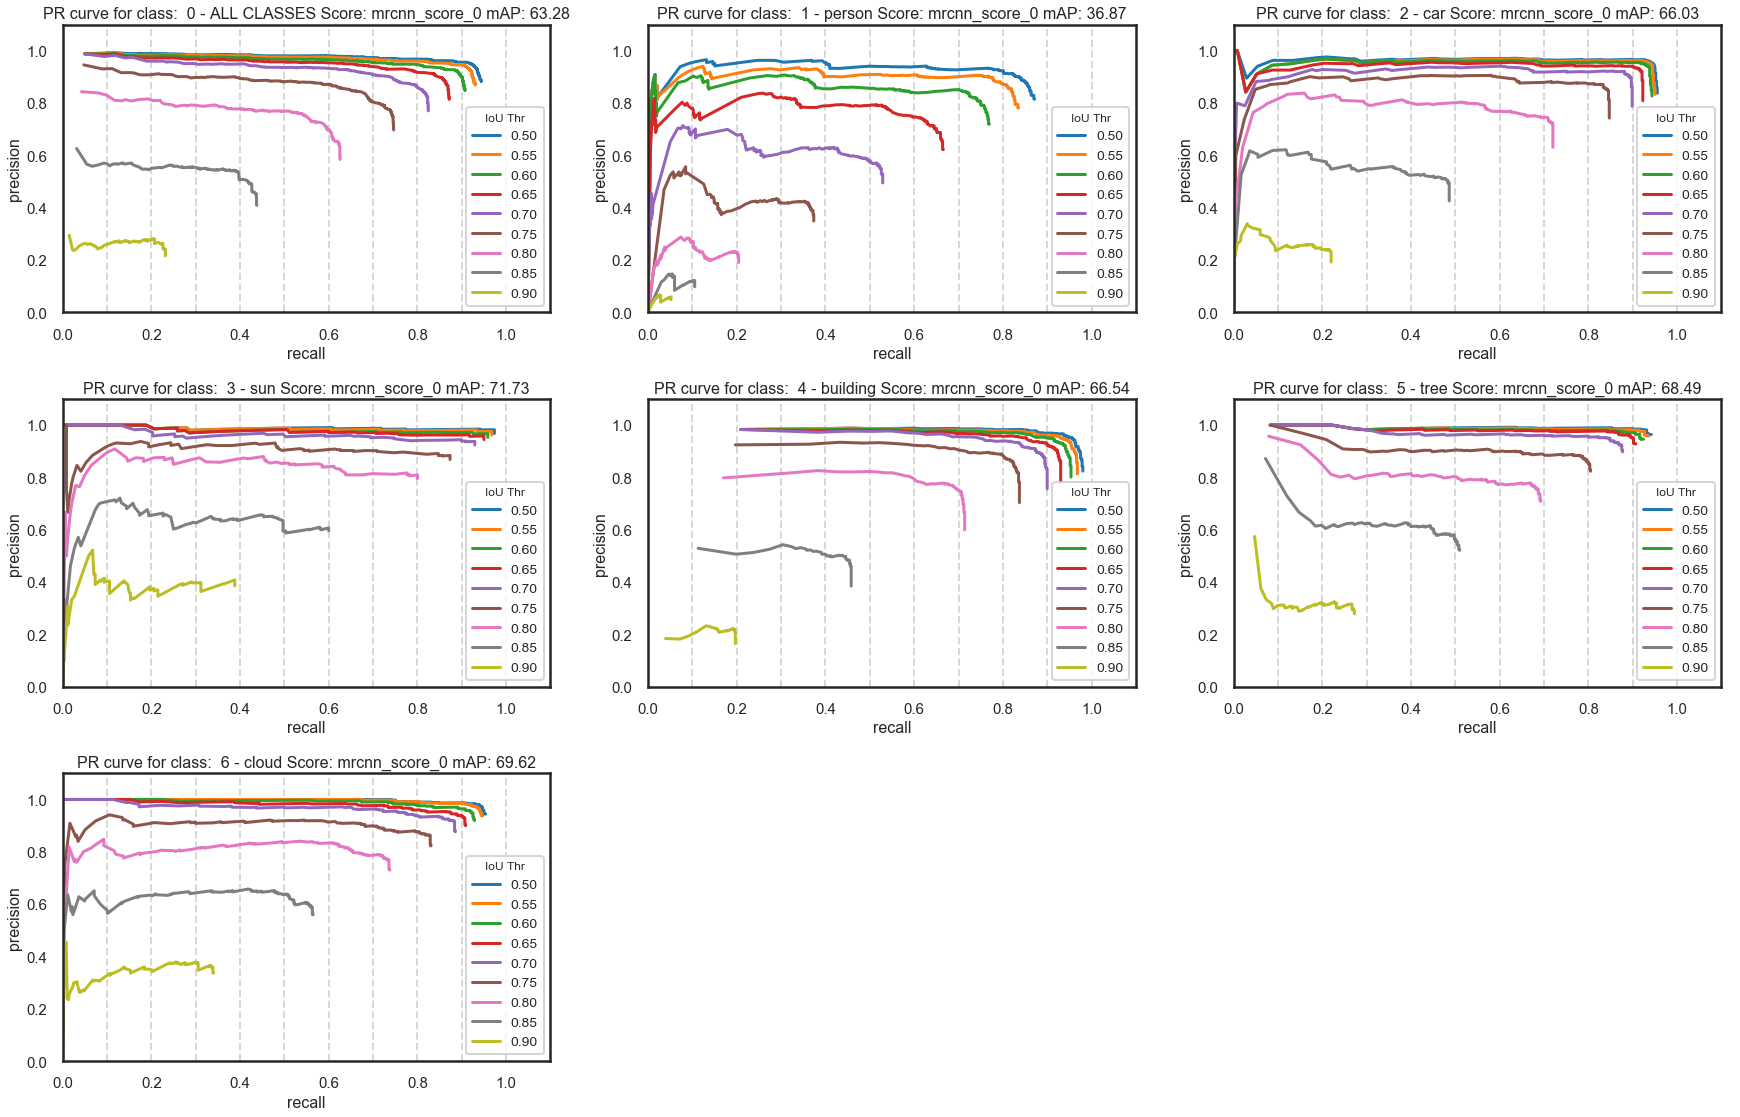

In [201]:
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_0', class_names = class_names )

### Plot mAP for `mrcnn_score_1` for different IoU thresholds

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                          AP @ IoU Thresholds for Score Computation: mrcnn_score_1                                          

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.4563     0.4563     0.4555     0.4545     0.4545     0.4545     0.4545     0.4545     0.4545      %45.50 
  2 - car                         0.4545     0.4545     0.4545     0.4545     0.4545     0.4545     0.4545     0.4545     0.4545      %45.45 
  3 - sun                         0.4545     0.4545     0.4545     0.4545     0.454

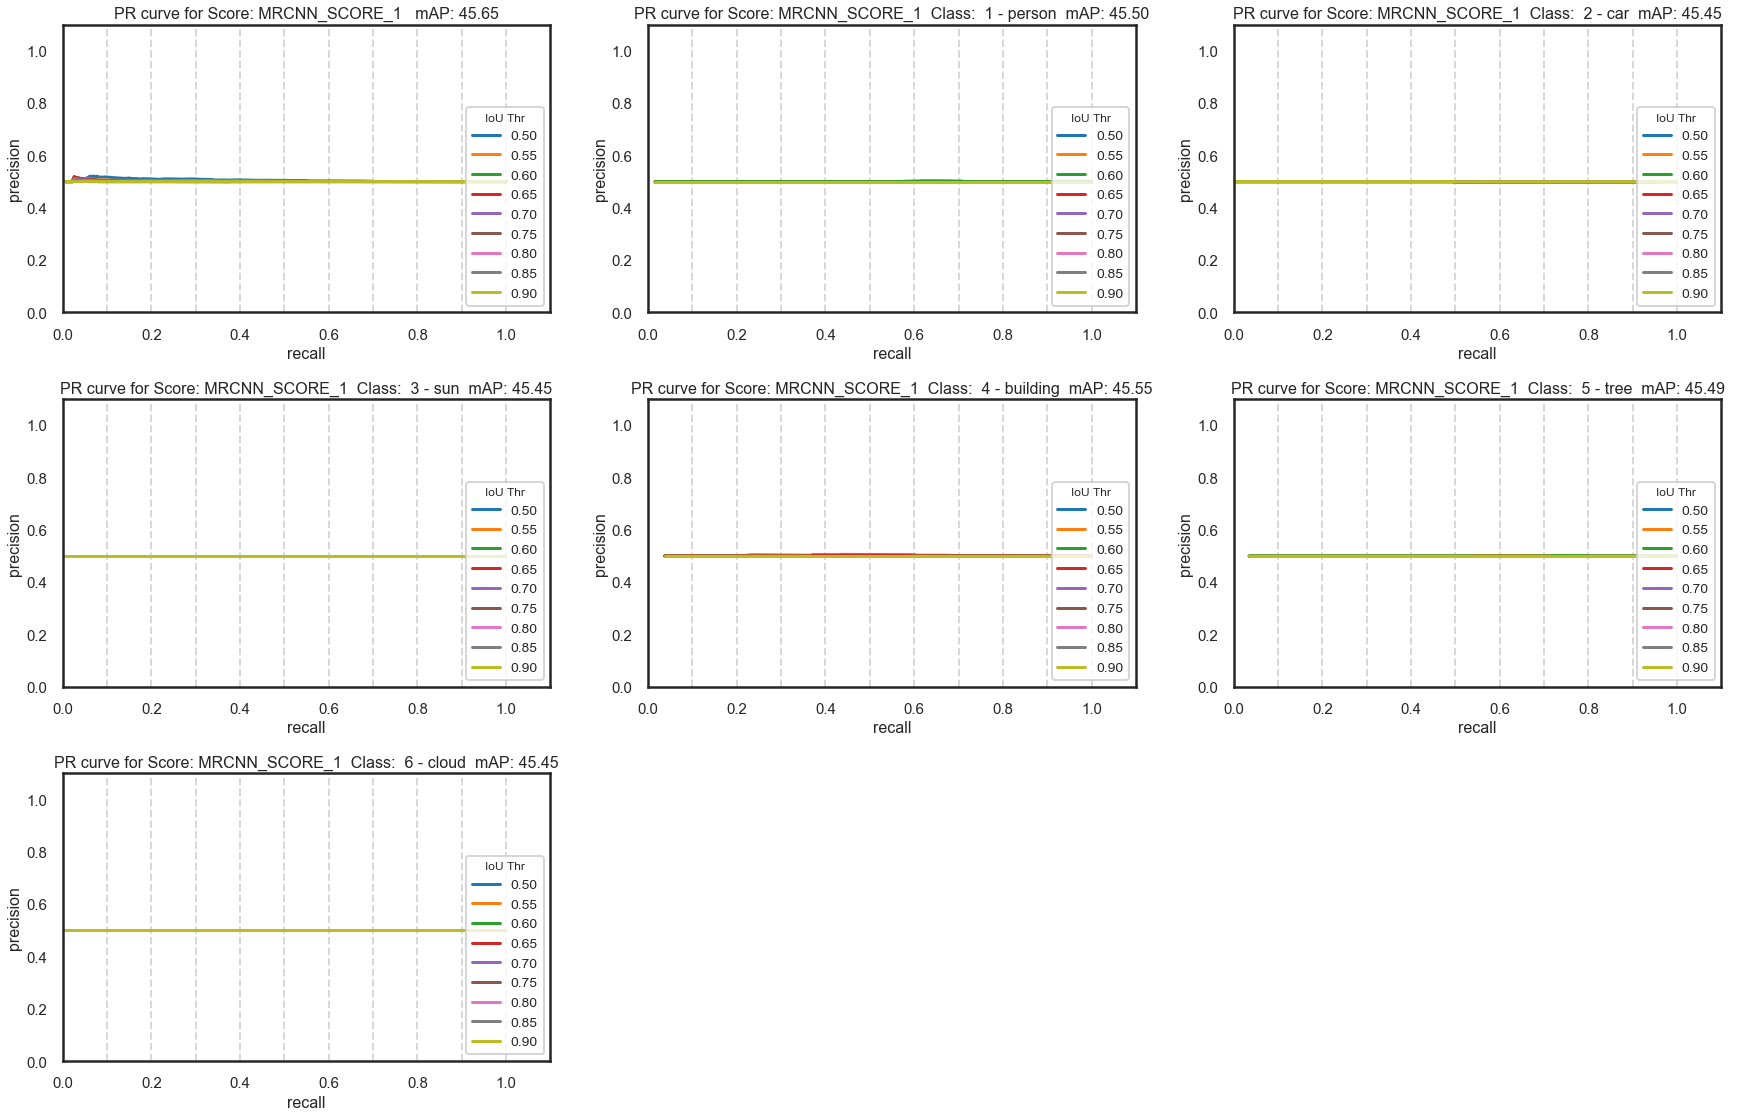

In [145]:
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_1', class_names = class_names )

### Plot mAP for `mrcnn_score_2` for different IoU thresholds

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                          AP @ IoU Thresholds for Score Computation: mrcnn_score_2                                          

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.4560     0.4560     0.4560     0.4560     0.4560     0.4560     0.4560     0.4560     0.4560      %45.60 
  2 - car                         0.4549     0.4549     0.4549     0.4549     0.4549     0.4549     0.4549     0.4549     0.4549      %45.49 
  3 - sun                         0.4545     0.4545     0.4545     0.4545     0.454

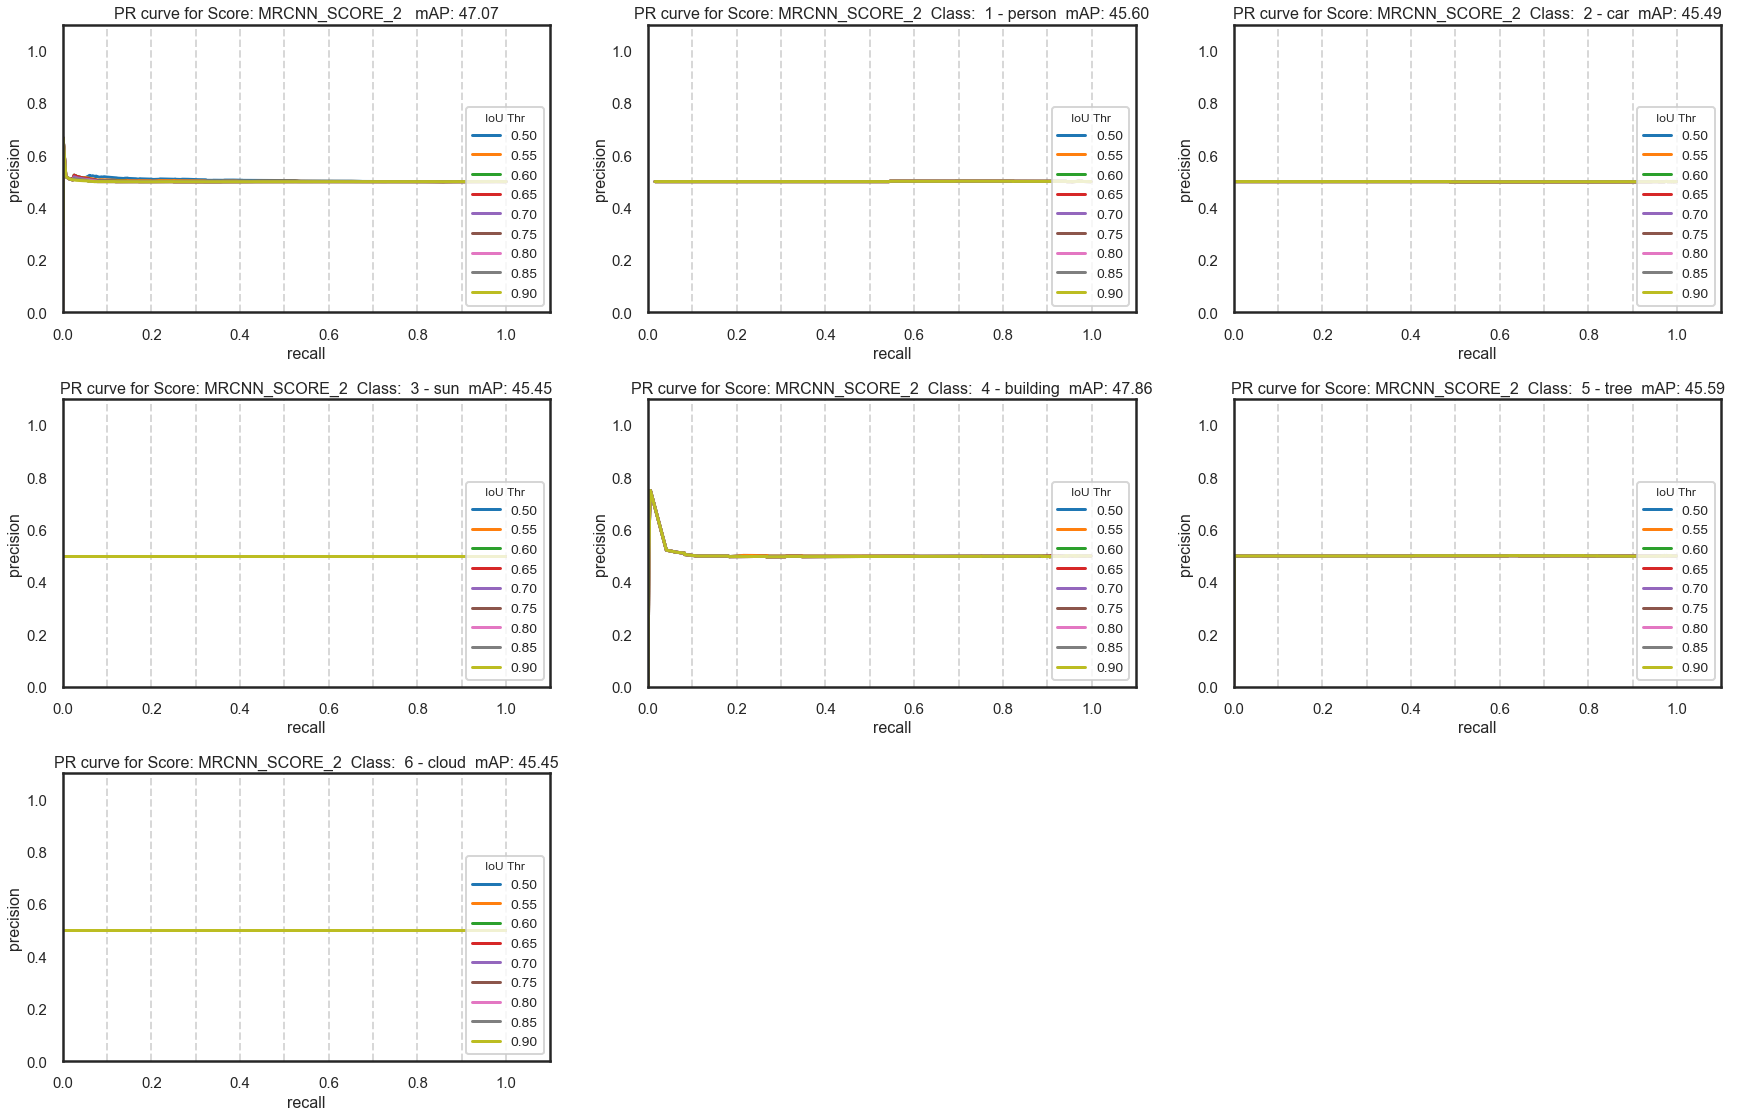

In [146]:
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_2', class_names = class_names )

### Plot mAP for `fcn_score_1` for different IoU thresholds

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                           AP @ IoU Thresholds for Score Computation: fcn_score_1                                           

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.6864     0.6864     0.6856     0.6856     0.6856     0.6856     0.6856     0.6856     0.6856      %68.58 
  2 - car                         0.6158     0.6158     0.6158     0.6158     0.6158     0.6158     0.6158     0.6158     0.6158      %61.58 
  3 - sun                         0.4581     0.4581     0.4581     0.4581     0.458

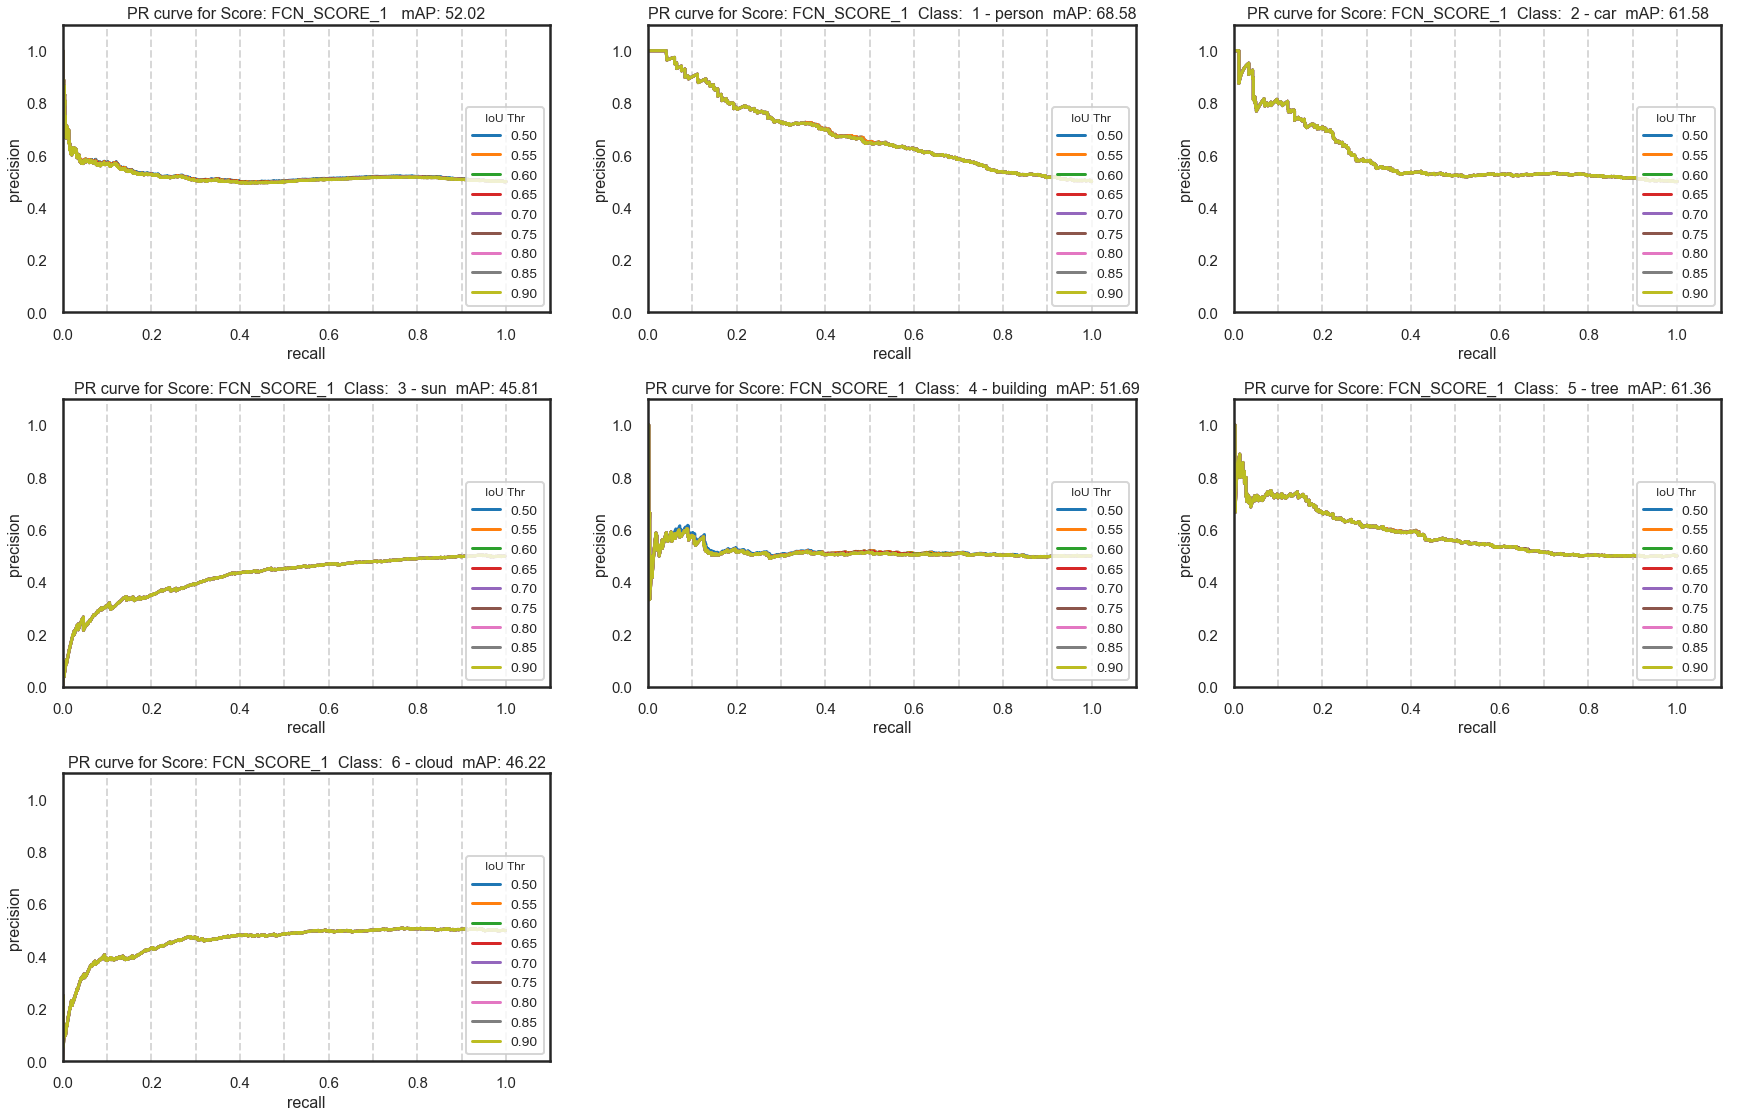

In [30]:
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_1', class_names = class_names )

### Plot mAP for `fcn_score_2` for different IoU thresholds

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                           AP @ IoU Thresholds for Score Computation: fcn_score_2                                           

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.6380     0.6380     0.6360     0.6360     0.6360     0.6360     0.6360     0.6360     0.6360      %63.64 
  2 - car                         0.6155     0.6155     0.6155     0.6155     0.6155     0.6155     0.6155     0.6155     0.6155      %61.55 
  3 - sun                         0.4955     0.4955     0.4955     0.4955     0.495

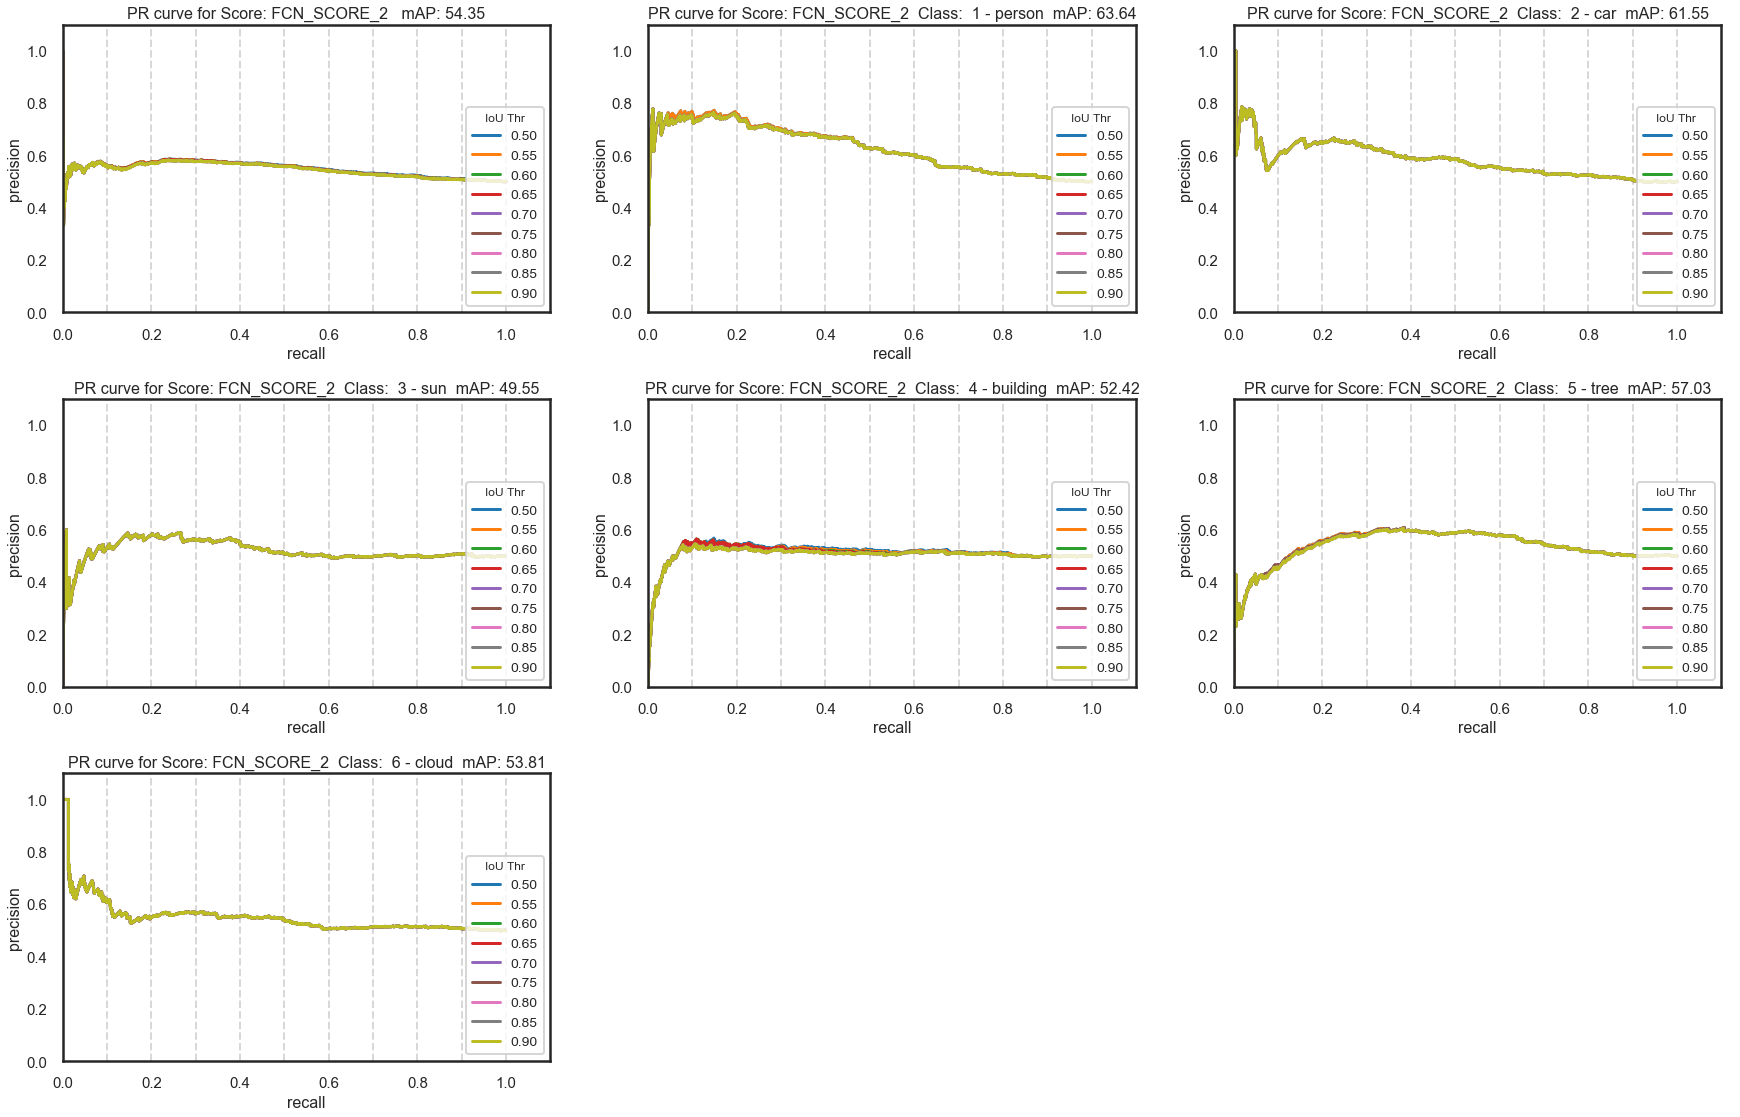

In [142]:
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_2', class_names = class_names )

## Indvidual classes - Plot mAP info for different scores (at a given IoU threshold)

### IoU = 0.5

col/rows:  2 4

                                                     AP @ IoU 0.50 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1
------------------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        51.09%            51.32%            82.60% 
 2 - car                           51.23%            51.62%            76.26% 
 3 - sun                           51.58%            51.40%            95.27% 
 4 - building                      51.11%            53.73%            50.95% 
 5 - tree                          51.39%            51.49%            60.53% 
 6 - cloud                         52.27%            54.9

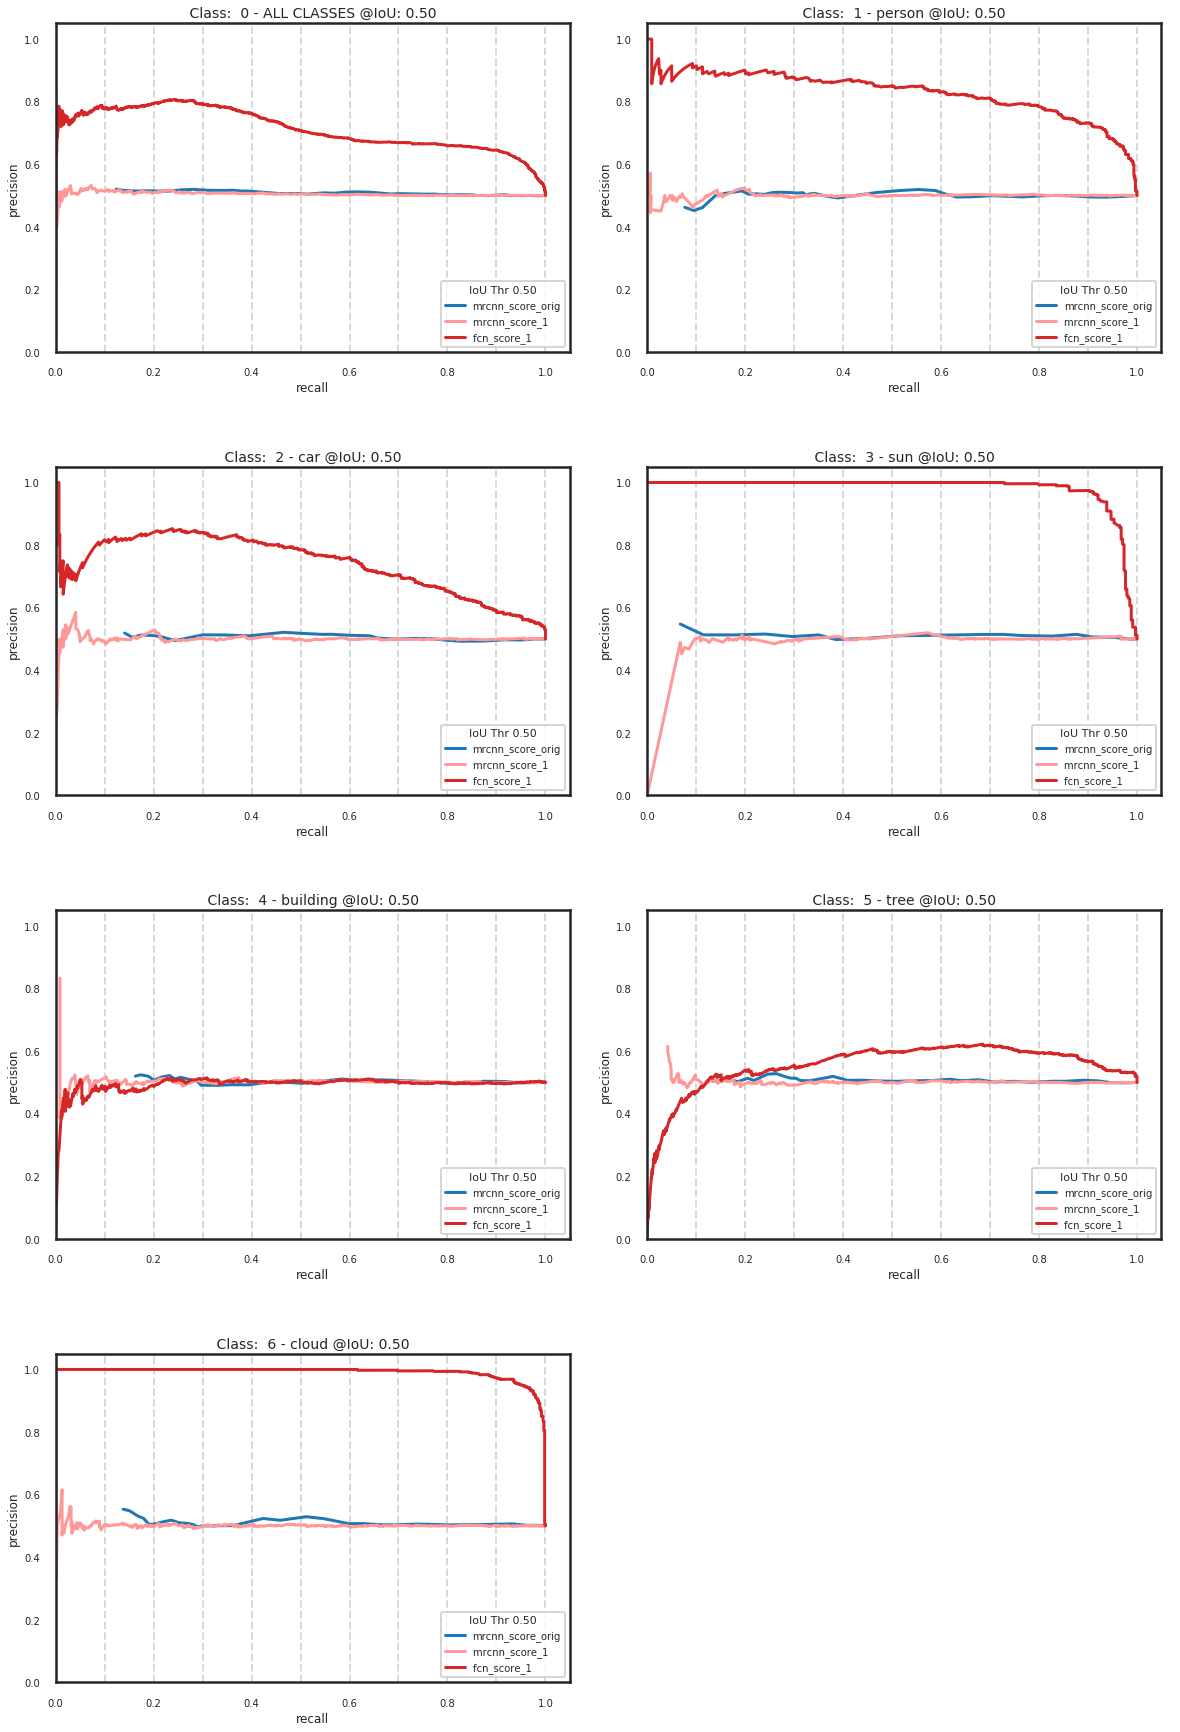

col/rows:  2 4

                                                     AP @ IoU 0.50 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_2       fcn_score_2
------------------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        51.09%            51.28%            80.92% 
 2 - car                           51.23%            51.56%            76.53% 
 3 - sun                           51.58%            51.40%            94.41% 
 4 - building                      51.11%            53.14%            52.50% 
 5 - tree                          51.39%            55.04%            60.90% 
 6 - cloud                         52.27%            54.9

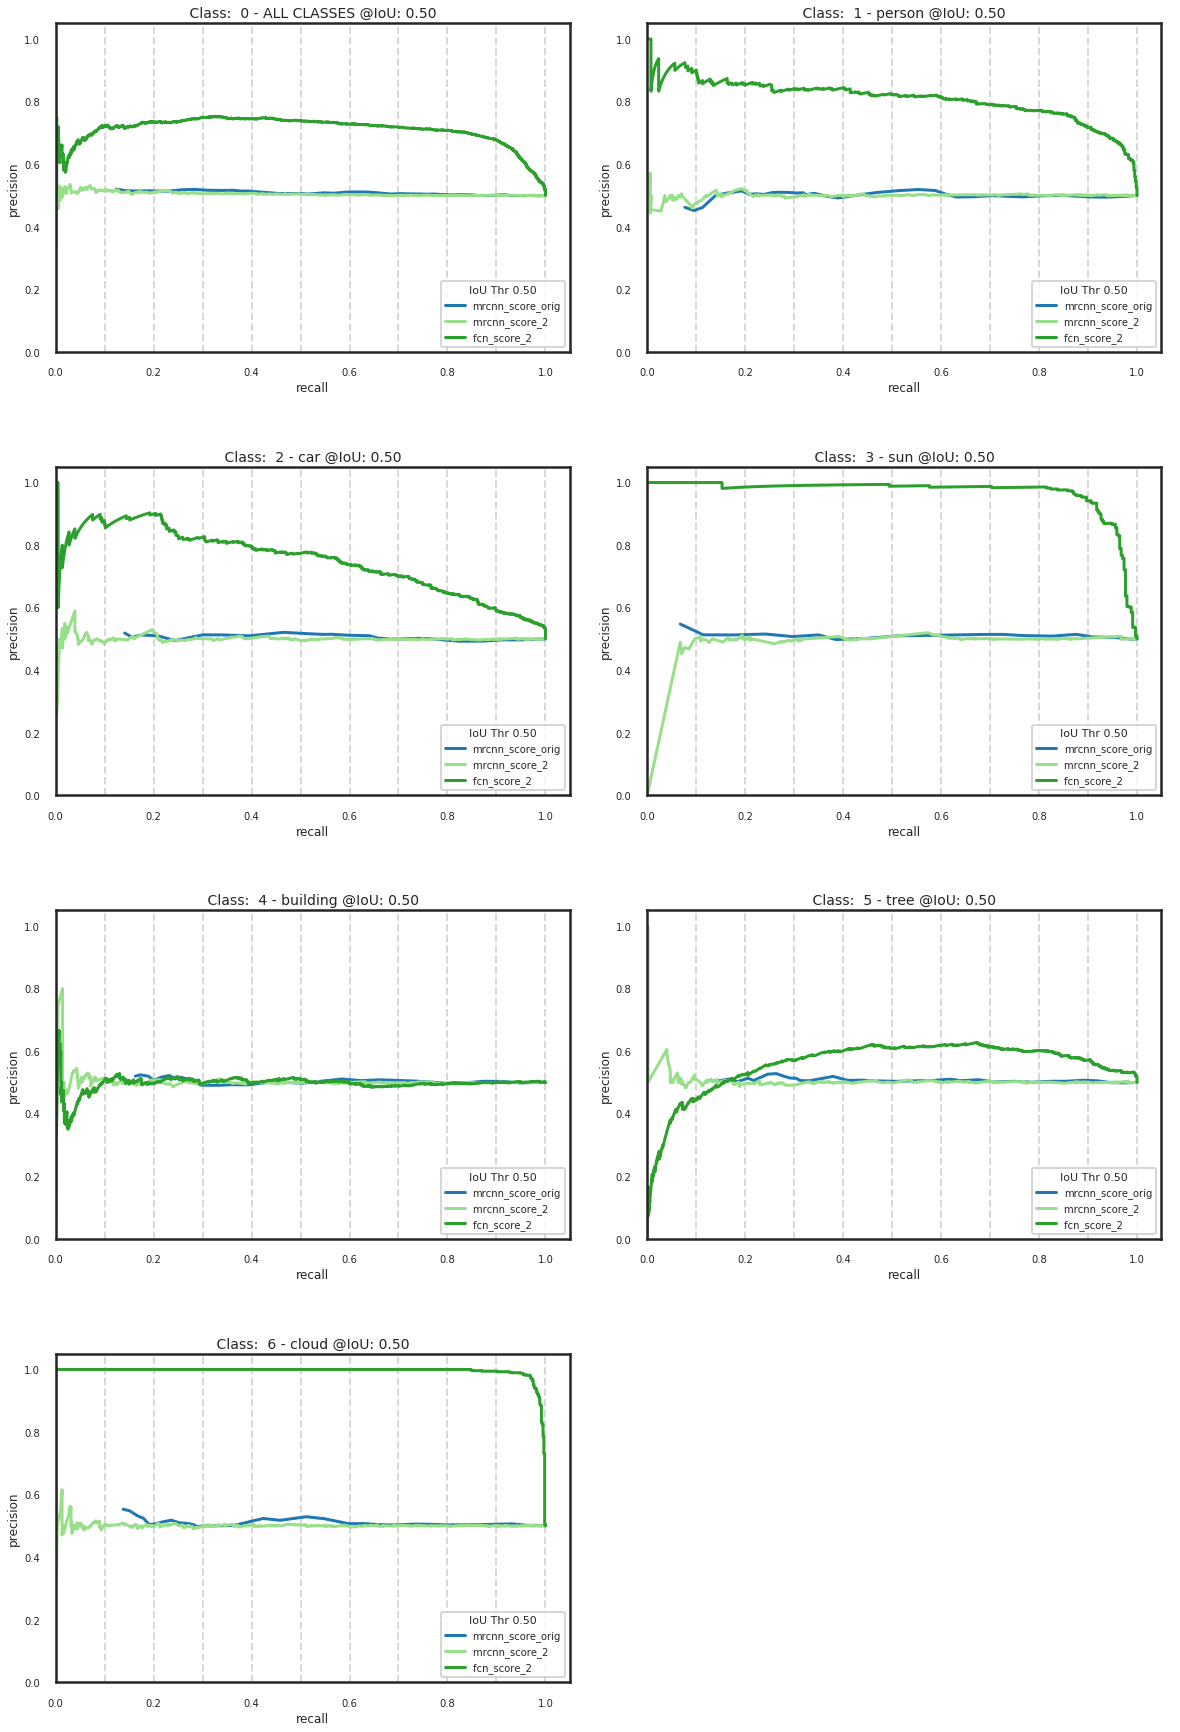

In [21]:
disp_classes = [0,1,2,3,4,5,6]  
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_1', 'fcn_score_1']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = disp_classes, class_names= class_names, iou = 0.5)
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_2', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = disp_classes, class_names= class_names, iou = 0.5)


### IoU = 0.75


                                                               AP @ IoU 0.75 Thresholds for Computed Scores                                                               

--------------------------------------------------------------------------------  scores  --------------------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_0     mrcnn_score_1     mrcnn_score_2       fcn_score_0       fcn_score_1       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        0.4690            0.4737            0.4669            0.4673            0.6167            0.7004            0.6952 
 2 - car                           0.4605            0.5099            0.5091            0.5095            0.5855            0.6421            0.6575 
 3 - sun                         

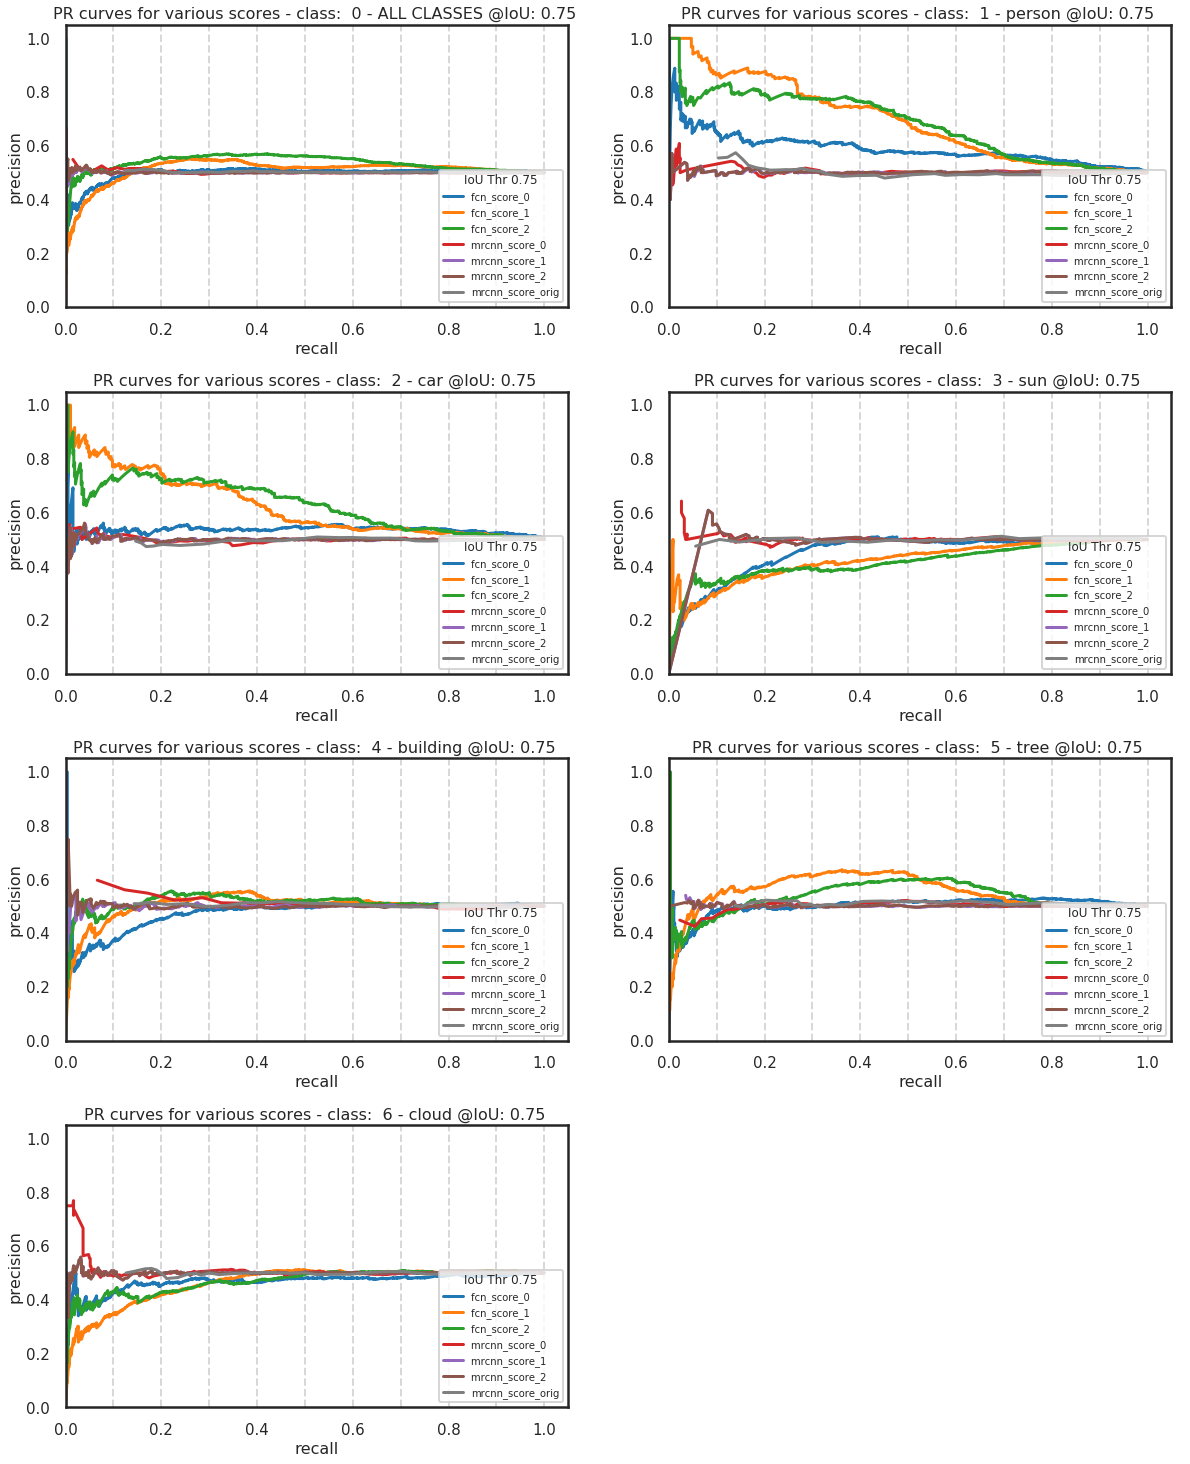

In [12]:
disp_classes = [0,1,2,3,4,5,6]  
disp_scores  = [ 'mrcnn_score_orig' ,  'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = disp_classes, class_names= class_names, iou = 0.75)

In [166]:
objs_by_cls = np.zeros((7))
for img in sorted(gt_boxes.keys()):
#     print(img, gt_boxes[img]['class_ids'], np.bincount(gt_boxes[img]['class_ids'], minlength = 7))
    objs_by_cls += np.bincount(gt_boxes[img]['class_ids'], minlength = 7)
for i in class_ids:    
    print('{:3d} {:20s} {:6d}'.format(i, class_names[i], int(objs_by_cls[i])))    

  1 person                  637
  2 car                     582
  3 sun                     340
  4 building                559
  5 tree                    569
  6 cloud                   602


In [ ]:
for idx, iou_thr in enumerate(np.linspace(0.5, 0.95, 10)):
    print(idx, iou_thr, np.round(iou_thr,2))
for idx, iou_thr in enumerate(np.arange(0.5, 0.95, 0.05)):
    print(idx, iou_thr)    
for idx, iou_thr in enumerate(range(0.5, 0.95,  0.05)):
    print(idx, iou_thr)    

## Run barchart for all weight files

In [ ]:
disp_scores  = [ 'mrcnn_score_orig' ,'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']

for FILE_IDX in range(len(files)):
    epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
    map_info_file = 'test_map_info_epoch' +epochs+'.pkl'
#     cls_info_file = 'test_cls_info_epoch' +epochs+'_500.pkl'
#     pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_500.pkl'
#     gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_500.pkl'

    with open(os.path.join(map_path, map_info_file), 'rb') as infile:
        all_data = pickle.load(infile)             
    print('loaded :', map_info_file)  
#     print('loaded :', cls_info_file)
    # disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
    print('Epch:', epochs)
    cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS, class_names = CLASS_NAMES, iou = 0.5, epochs = epochs)
